<a href="https://colab.research.google.com/github/luiza-blota/Aulas-Python/blob/master/Codigos_Python_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf
import graphviz
import pydotplus
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Leitura dos Dados

In [2]:
clientes = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_customers_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_items_dataset.csv')
pagamentos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_orders_dataset.csv')
produtos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_products_dataset.csv')
prod_catg = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/product_category_name_translation.csv')
vendedores = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_sellers_dataset.csv')
geolocalization = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_geolocation_dataset.csv')

# **Explorando Bases**

## *Base de Clientes*

In [3]:
clientes.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
clientes.info() ## 99.441 linhas de clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
estados_clientes = pd.DataFrame(clientes.customer_state.value_counts()/clientes.shape[0])
#estados_clientes.to_excel('estados_clientes.xlsx')
estados_clientes

customer_state
SP        0.419807
RJ        0.129242
MG        0.117004
RS        0.054967
PR        0.050734
SC        0.036574
BA        0.033990
DF        0.021520
ES        0.020444
GO        0.020314
PE        0.016613
CE        0.013435
PA        0.009805
MT        0.009121
MA        0.007512
MS        0.007190
PB        0.005390
PI        0.004978
RN        0.004877
AL        0.004153
SE        0.003520
TO        0.002816
RO        0.002544
AM        0.001488
AC        0.000815
AP        0.000684
RR        0.000463

## *Base de Pagamentos*

In [6]:
pagamentos.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [7]:
pagamentos.info() ## 103.886 linhas de pagamento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
tb_formas_pagto = pd.DataFrame(pagamentos.payment_type.value_counts()) ## A maioria realiza o pagamento através do Cartão de Crédito
tb_formas_pagto['percentual'] = pagamentos.payment_type.value_counts()/clientes.shape[0]
#tb_formas_pagto.to_excel('tb_formas_pagto.xlsx')
tb_formas_pagto.head()

payment_type  percentual
credit_card         76795    0.772267
boleto              19784    0.198952
voucher              5775    0.058075
debit_card           1529    0.015376
not_defined             3    0.000030

In [9]:
qtde_parcelas = pd.DataFrame (pagamentos.payment_installments.describe()) ## Em média os clientes pagam pelo menos em 2 prestações
#qtde_parcelas.to_excel('qtde_parcelas.xlsx')
pagamentos.payment_installments.describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [10]:
vlr_medio_pedidos = pd.DataFrame(pagamentos.payment_value.describe() )## O valor médio dos pedidos é de R$ 154,00
#vlr_medio_pedidos.to_excel('vlr_medio_pedidos.xlsx')
vlr_medio_pedidos.head()

payment_value
count  103886.000000
mean      154.100380
std       217.494064
min         0.000000
25%        56.790000

In [11]:
pagamentos_pedido = pagamentos.loc[: , ['order_id', 'payment_value']]
pagamentos_pedido = pagamentos_pedido.drop_duplicates()
pagamentos_pedido2 = pagamentos_pedido.groupby(['order_id'] , as_index= False)
pagamentos_pedido3 = pagamentos_pedido2.agg('mean')
pagamentos_pedido3.head() ## (71, 8)

order_id  payment_value
0  00010242fe8c5a6d1ba2dd792cb16214          72.19
1  00018f77f2f0320c557190d7a144bdd3         259.83
2  000229ec398224ef6ca0657da4fc703e         216.87
3  00024acbcdf0a6daa1e931b038114c75          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04

## Base de Itens

In [12]:
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [13]:
items.order_item_id.describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

In [14]:
qtde_itens_pedido = pd.DataFrame(items.order_item_id.value_counts()/items.shape[0])
qtde_itens_pedido.to_excel('qtde_itens_pedido.xlsx')

In [15]:
items.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef" ') ## Pedido com 21 itens

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value  
57297  2017-07-21 18:25:23    1.2           7.89  
57298  2017-07-21 18:25:23    1.2           7.89  
57299  2017-07-21 18:25:23    1.2           7.89  
57300  2017-07-21 18:25:23    1.2           7.89  
57301  2017-07-21 18:25:23    1.2           7.89  
57302  2017-07-21 18:25:23    1.2           7.89  
57303  2017-07-21 18:25:23    1.2           7.89  
57304  2017-07-21 18:25:23    1.2           7.89  
57305  2017-07-21 18:25:23    1.2           7.89  
57306  2017-07-21 18:25:23    1.2           7.89  
57307  2017-07-21 18:25:23    1.2           7.89  
57308  2017-07-21 18:25:23    1.2           7.89  
57309  2017-07-21 18:25:23    1.2           7.89  
57310  2017-07-21 18:25:23    1.2           7.89  
57311  2017-07-21 18:25:23    1.2           7.89  
57312  2017-07-21 18:25:23    1.2           7.89  
57313  2017-07-21 18:25:23    1.2           7.89  
57314  2017-07-21 18:25:23    1.2           7.89  
57315  2017-07-21 18:25:23    1.2           7.89  
57316  2017-07-21 18:25:23    1.2      

In [16]:
base_itens = items.query('order_item_id > 1') ## Pedidos com mais de 1 item
base_itens.shape ## 13.984 itens de pedidos com mais de um item
base_itens.order_item_id.describe() ## Em média, pedidos com mais de 1 item, tem 2 itens.

count    13984.000000
mean         2.593678
std          1.334476
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         21.000000
Name: order_item_id, dtype: float64

In [17]:
preco_itens = pd.DataFrame(items.price.describe()) # O valor médio do preço dos itens é R$120, mas um dos itens chega até a R$6.700
preco_itens.to_excel('preco_itens.xlsx')

In [18]:
preco_frete = pd.DataFrame(items.freight_value.describe()) # Em média, o valor do frete é R$15, mas pode chegar até a R$409
preco_frete.to_excel('preco_frete.xlsx')

In [19]:
items.query('freight_value > 400') ## Frete acima de R$400

order_id  order_item_id  \
73486  a77e1550db865202c56b19ddc6dc4d53              1   

                             product_id                         seller_id  \
73486  ec31d2a17b299511e7c8627be9337b9b  257e61d3251fb5efb9daadddbc2cf7ca   

       shipping_limit_date  price  freight_value  
73486  2018-04-25 06:55:13  979.0         409.68

In [20]:
items.query('order_id == "e481f51cbdc54678b7cc49136f2d6af7" ')

order_id  order_item_id  \
100785  e481f51cbdc54678b7cc49136f2d6af7              1   

                              product_id                         seller_id  \
100785  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

        shipping_limit_date  price  freight_value  
100785  2017-10-06 11:07:15  29.99           8.72

## *Base de Vendedores*

In [21]:
vendedores.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [22]:
estados_vendedores = pd.DataFrame(vendedores.seller_state.value_counts()/vendedores.shape[0])
#estados_vendedores.to_excel('estados_vendedores.xlsx')
estados_vendedores

seller_state
SP      0.597415
PR      0.112763
MG      0.078837
SC      0.061389
RJ      0.055250
RS      0.041680
GO      0.012924
DF      0.009693
ES      0.007431
BA      0.006139
CE      0.004200
PE      0.002908
PB      0.001939
RN      0.001616
MS      0.001616
MT      0.001292
RO      0.000646
SE      0.000646
PI      0.000323
AC      0.000323
MA      0.000323
AM      0.000323
PA      0.000323

In [23]:
cidades_vendedores = pd.DataFrame(vendedores.seller_city.value_counts()/vendedores.shape[0])
#estados_vendedores.to_excel('estados_vendedores.xlsx')
cidades_vendedores

seller_city
sao paulo               0.224233
curitiba                0.041034
rio de janeiro          0.031018
belo horizonte          0.021971
ribeirao preto          0.016801
...                          ...
taruma                  0.000323
s jose do rio preto     0.000323
domingos martins        0.000323
messias targino         0.000323
leme                    0.000323

[611 rows x 1 columns]

## *Base de Produtos*

In [24]:
produtos.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [25]:
df_categoria_produtos = produtos.product_category_name.value_counts()/produtos.shape[0]
#df_categoria_produtos.to_excel('Categoria_Produtos.xlsx')
df_categoria_produtos

cama_mesa_banho                  0.091924
esporte_lazer                    0.087008
moveis_decoracao                 0.080635
beleza_saude                     0.074171
utilidades_domesticas            0.070863
                                   ...   
fashion_roupa_infanto_juvenil    0.000152
casa_conforto_2                  0.000152
pc_gamer                         0.000091
seguros_e_servicos               0.000061
cds_dvds_musicais                0.000030
Name: product_category_name, Length: 73, dtype: float64

In [26]:
produtos.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [27]:
df_categoria_produtos.shape

(73,)

In [28]:
produtos.nlargest(10, 'product_weight_g')

product_id              product_category_name  \
25166  26644690fde745fc4654719c3904e1db                    cama_mesa_banho   
344    d0877f0094337c414d23f5a3c7bad20c                  moveis_escritorio   
509    53f92b0474f91fcb5bd188c6a8075c38              utilidades_domesticas   
955    ceeba7d5636e59173cc5f484e913db3d                                NaN   
1159   f97ad9066c718a6cef93dfcf253d3e0d                   moveis_decoracao   
1469   363a9f5b97bf194da23858be722a7aa5  construcao_ferramentas_construcao   
1514   dcfeedf441c38e5e7e58ffce194af2bb                       beleza_saude   
1701   1c57458e824ca3d974ec1831a1a55e72                           pet_shop   
1714   c04e948c6900ce99ac47d89b3b6d70cd                         cool_stuff   
1738   0a859d8dc68f6a746b4709217110c439                      esporte_lazer   

       product_name_lenght  product_description_lenght  product_photos_qty  \
25166                 59.0                       534.0                 1.0   
344                   48.0                       489.0                 2.0   
509                   54.0                      2952.0                 3.0   
955                    NaN                         NaN                 NaN   
1159                  63.0                       886.0                 5.0   
1469                  44.0                      1455.0                 6.0   
1514                  50.0                       193.0                 1.0   
1701                  57.0                       794.0                 3.0   
1714                  33.0                      1401.0                 2.0   
1738                  50.0                      2871.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
25166           40425.0               13.0               65.0   
344             30000.0               50.0               50.0   
509             30000.0               76.0               51.0   
955             30000.0               65.0               65.0   
1159            30000.0               61.0               70.0   
1469            30000.0              100.0               50.0   
1514            30000.0               67.0               64.0   
1701            30000.0               79.0                2.0   
1714            30000.0               70.0               37.0   
1738            30000.0               90.0               50.0   

       product_width_cm  
25166              28.0  
344                30.0  
509                51.0  
955                65.0  
1159               65.0  
1469               50.0  
1514               61.0  
1701               63.0  
1714               70.0  
1738               50.0

In [29]:
produtos.product_name_lenght.describe()

count    32341.000000
mean        48.476949
std         10.245741
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

In [30]:
produtos.product_description_lenght.describe()

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

In [31]:
qtde_fotos = pd.DataFrame(produtos.product_photos_qty.describe()) ## Em média, os anúncios tem 2 fotos / Mas existe algum produto que tem 20 fotos
#qtde_fotos.to_excel('qtde_fotos.xlsx')
qtde_fotos

product_photos_qty
count        32341.000000
mean             2.188986
std              1.736766
min              1.000000
25%              1.000000
50%              1.000000
75%              3.000000
max             20.000000

In [32]:
peso_produtos = pd.DataFrame(produtos.product_weight_g.describe()) ## Os produtos pesam em média 2 kg
#peso_produtos.to_excel('peso_produtos.xlsx')
peso_produtos

product_weight_g
count      32949.000000
mean        2276.472488
std         4282.038731
min            0.000000
25%          300.000000
50%          700.000000
75%         1900.000000
max        40425.000000

## *Base Pedidos*

In [33]:
pedidos.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [34]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [35]:
pedidos.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [36]:
status_pedidos = pd.DataFrame(pedidos.order_status.value_counts()/pedidos.shape[0])
#status_pedidos.to_excel('status_pedidos.xlsx')
status_pedidos

order_status
delivered        0.970203
shipped          0.011132
canceled         0.006285
unavailable      0.006124
invoiced         0.003158
processing       0.003027
created          0.000050
approved         0.000020

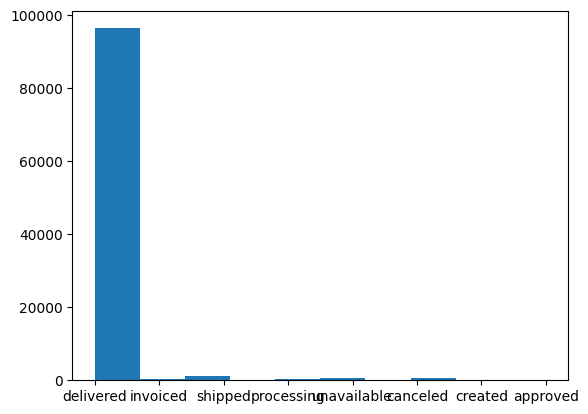

In [37]:
plt.hist(pedidos.order_status, rwidth=2)
plt.show()

### Transformação de Datas e Criando a Variável: Pedido Atrasado

In [38]:
## Tranformando em data a Data de Chegada
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])

In [39]:
## Transformando em data a Data Prevista
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

In [40]:
## Criando uma coluna para ver a Diferença entre as duas datas acima
pedidos['diferenca_tempoentrega'] = pedidos['order_delivered_customer_date'] - pedidos['order_estimated_delivery_date']
pedidos.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date diferenca_tempoentrega  
0                    2017-10-18      -8 days +21:25:13  
1                    2018-08-13      -6 days +15:27:45  
2                    2018-09-04     -18 days +18:06:29  
3                    2017-12-15     -13 days +00:28:42  
4                    2018-02-26     -10 days +18:17:02

In [41]:
pedidos['diferenca_tempoentrega_num'] = pd.to_numeric(pedidos['diferenca_tempoentrega'])
pedidos['Flag_Atrasado'] = np.where(pedidos['diferenca_tempoentrega_num'] <= 0, 'Adiantado', 'Atrasado')
pedidos.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date diferenca_tempoentrega  \
0                    2017-10-18      -8 days +21:25:13   
1                    2018-08-13      -6 days +15:27:45   
2                    2018-09-04     -18 days +18:06:29   
3                    2017-12-15     -13 days +00:28:42   
4                    2018-02-26     -10 days +18:17:02   

   diferenca_tempoentrega_num Flag_Atrasado  
0            -614087000000000     Adiantado  
1            -462735000000000     Adiantado  
2           -1490011000000000     Adiantado  
3           -1121478000000000     Adiantado  
4            -798178000000000     Adiantado

In [42]:
## Criando variável Atrasado
Flag_Atrasado =pd.DataFrame(pedidos.Flag_Atrasado.value_counts()/clientes.shape[0]  ) # 7% dos pedidos chegaram atrasados
#Flag_Atrasado.to_excel('Flag_Atrasado.xlsx')
Flag_Atrasado

Flag_Atrasado
Adiantado        0.92129
Atrasado         0.07871

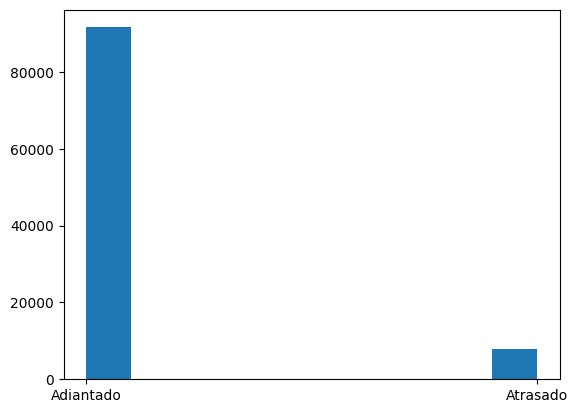

In [43]:
plt.hist(pedidos.Flag_Atrasado, rwidth=2)
plt.show()

## *Base Reviews*

In [44]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [45]:
reviews.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef" ') ## Pedido com 21 itens

review_id                          order_id  \
14999  e8236fe7b6e1bdd513a500de361e2b87  8272b63d03f5f79c56e9e4120aec44ef   

       review_score review_comment_title  \
14999             1                  NaN   

                                  review_comment_message review_creation_date  \
14999  Eu estou tentando cancelar faz tempo devido o ...  2017-07-30 00:00:00   

      review_answer_timestamp  
14999     2017-07-30 14:19:07

In [46]:
tb_review_score = pd.DataFrame(reviews.review_score.value_counts()/reviews.shape[0])
#tb_review_score.to_excel('tb_review_score.xlsx')
tb_review_score

review_score
5      0.577763
4      0.192917
1      0.115133
3      0.082430
2      0.031756

### Criando Variável Resposta: avaliações

In [47]:
reviews['Target'] = np.where(reviews['review_score'] == 5, 0, 1)
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  Target  
0     2018-01-18 21:46:59       1  
1     2018-03-11 03:05:13       0  
2     2018-02-18 14:36:24       0  
3     2017-04-21 22:02:06       0  
4     2018-03-02 10:26:53       0

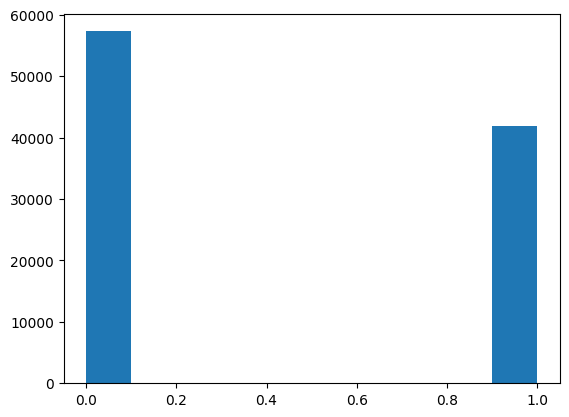

In [48]:
plt.hist(reviews.Target, rwidth=2)
plt.show()

In [49]:
tb_resposta = pd.DataFrame( reviews.Target.value_counts()/reviews.shape[0] ) ## Variável resposta balanceada :)
tb_resposta

Target
0  0.577763
1  0.422237

In [50]:
tb_target = reviews.loc[: , ['order_id', 'Target']]
tb_target.shape

(99224, 2)

# **Primeira Visão de Pedidos**

In [51]:
database = clientes.merge(right = pedidos, how = 'left', on = 'customer_id')
database = database.merge(right = pagamentos, on = 'order_id')
database = database.merge(right = items, on = 'order_id')
database = database.merge(right = produtos, on = 'product_id')
database = database.merge(right = reviews, on = 'order_id')
database = database.merge(right = prod_catg, on = 'product_category_name')
database = database.merge(right = vendedores, on = 'seller_id')
database = database.drop_duplicates()
database.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ... review_score  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...            4   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...            1   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...            1   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...            3   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...            4   

  review_comment_title                             review_comment_message  \
0                  NaN                                                NaN   
1                  NaN  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...   
2                  NaN  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...   
3                  NaN  Produto compatível com seu valor, muito bonito...   
4                  NaN                            Entregou antes do prazo   

   review_creation_date review_answer_timestamp  Target  \
0   2017-05-26 00:00:00     2017-05-30 22:34:40       1   
1   2017-11-29 00:00:00     2017-12-01 19:41:59       1   
2   2017-11-29 00:00:00     2017-12-01 19:41:59       1   
3   2017-05-27 00:00:00     2017-05-28 02:43:16       1   
4   2018-03-01 00:00:00     2018-03-02 11:11:24       1   

  product_category_name_english  seller_zip_code_prefix      seller_city  \
0              office_furniture                    8577  itaquaquecetuba   
1              office_furniture                    8577  itaquaquecetuba   
2              office_furniture                    8577  itaquaquecetuba   
3              office_furniture                    8577  itaquaquecetuba   
4              office_furniture                    8577  itaquaquecetuba   

   seller_state  
0            SP  
1            SP  
2            SP  
3            SP  
4            SP  

[5 rows x 44 columns]

In [52]:
##Quantidade de Linhas e de Colunas da base
database.shape

(115609, 44)

In [53]:
database.describe()

customer_zip_code_prefix        diferenca_tempoentrega  \
count             115609.000000                        113209   
mean               35061.537597  -12 days +14:30:34.043583108   
std                29841.671732    10 days 02:14:24.693627420   
min                 1003.000000           -147 days +23:36:47   
25%                11310.000000            -17 days +16:13:21   
50%                24241.000000            -13 days +22:21:25   
75%                58745.000000             -7 days +10:48:57   
max                99980.000000             188 days 23:24:07   

       diferenca_tempoentrega_num  payment_sequential  payment_installments  \
count                1.156090e+05       115609.000000         115609.000000   
mean                -1.924379e+17            1.093747              2.946233   
std                  1.314921e+18            0.729849              2.781087   
min                 -9.223372e+18            1.000000              0.000000   
25%                 -1.475218e+15            1.000000              1.000000   
50%                 -1.050481e+15            1.000000              2.000000   
75%                 -6.058940e+14            1.000000              4.000000   
max                  1.632745e+16           29.000000             24.000000   

       payment_value  order_item_id          price  freight_value  \
count  115609.000000  115609.000000  115609.000000  115609.000000   
mean      172.387379       1.194535     120.619850      20.056880   
std       265.873969       0.685926     182.653476      15.836184   
min         0.000000       1.000000       0.850000       0.000000   
25%        60.870000       1.000000      39.900000      13.080000   
50%       108.050000       1.000000      74.900000      16.320000   
75%       189.480000       1.000000     134.900000      21.210000   
max     13664.080000      21.000000    6735.000000     409.680000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count        115609.000000               115609.000000       115609.000000   
mean             48.766541                  785.808198            2.205373   
std              10.034187                  652.418619            1.717771   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  346.000000            1.000000   
50%              52.000000                  600.000000            1.000000   
75%              57.000000                  983.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count     115608.000000      115608.000000      115608.000000   
mean        2113.907697          30.307903          16.638477   
std         3781.754895          16.211108          13.473570   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm   review_score         Target  seller_zip_code_prefix  
count     115608.000000  115609.000000  115609.000000           115609.000000  
mean          23.113167       4.034409       0.434525            24515.713958  
std           11.755083       1.385584       0.495697            27636.640968  
min            6.000000       1.000000       0.000000             1001.000000  
25%           15.000000       4.000000       0.000000             6429.000000  
50%           20.000000       5.000000       0.000000            13660.000000  
75%           30.000000       5.000000       1.000000            28605.000000  
max          118.000000       5.000000       1.000000            99730.000000

In [54]:
## Tipo de Dados das colunas da base
dtypes = database.dtypes
colunas_base = pd.DataFrame(data= dtypes)
print(colunas_base)
#colunas_base.to_excel('colunas_base.xlsx')

                                             0
customer_id                             object
customer_unique_id                      object
customer_zip_code_prefix                 int64
customer_city                           object
customer_state                          object
order_id                                object
order_status                            object
order_purchase_timestamp                object
order_approved_at                       object
order_delivered_carrier_date            object
order_delivered_customer_date   datetime64[ns]
order_estimated_delivery_date   datetime64[ns]
diferenca_tempoentrega         timedelta64[ns]
diferenca_tempoentrega_num               int64
Flag_Atrasado                           object
payment_sequential                       int64
payment_type                            object
payment_installments                     int64
payment_value                          float64
order_item_id                            int64
product_id   

## Union entre Clientes e Vendedores

In [55]:
clientes_e_vendedores = database.loc[: , ['customer_unique_id', 'customer_state', 'order_id','seller_id','seller_state']]
clientes_e_vendedores.head()

customer_unique_id customer_state  \
0  861eff4711a542e4b93843c6dd7febb0             SP   
1  9eae34bbd3a474ec5d07949ca7de67c0             PA   
2  9eae34bbd3a474ec5d07949ca7de67c0             PA   
3  3c799d181c34d51f6d44bbbc563024db             RS   
4  23397e992b09769faf5e66f9e171a241             RJ   

                           order_id                         seller_id  \
0  00e7ee1b050b8499577073aeb2a297a1  7c67e1448b00f6e969d365cea6b010ab   
1  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
2  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
3  b1a5d5365d330d10485e0203d54ab9e8  7c67e1448b00f6e969d365cea6b010ab   
4  2e604b3614664aa66867856dba7e61b7  7c67e1448b00f6e969d365cea6b010ab   

  seller_state  
0           SP  
1           SP  
2           SP  
3           SP  
4           SP

## Visualização Gráfica dos MAPAS

In [56]:
customer = clientes_e_vendedores.loc[: , ['customer_unique_id', 'customer_state']]
customer = customer.drop_duplicates()
seller = clientes_e_vendedores.loc[: , ['seller_id', 'seller_state']]
seller = seller.drop_duplicates()

In [57]:
geolocalization.head()
geolocalization2 = geolocalization.loc[: , ['geolocation_state', 'geolocation_lat', 'geolocation_lng']]
geolocalization2.head()

geolocation_state  geolocation_lat  geolocation_lng
0                SP       -23.545621       -46.639292
1                SP       -23.546081       -46.644820
2                SP       -23.546129       -46.642951
3                SP       -23.544392       -46.639499
4                SP       -23.541578       -46.641607

In [58]:
geolocalization3 = geolocalization2.groupby(['geolocation_state'] , as_index= False)
geolocalization4 = geolocalization3.agg('mean')
geolocalization4.head() #(27, 3)

geolocation_state  geolocation_lat  geolocation_lng
0                AC        -9.702555       -68.451852
1                AL        -9.599729       -36.052017
2                AM        -3.349336       -60.537430
3                AP         0.086025       -51.234304
4                BA       -13.049361       -39.560649

In [59]:
# Localização dos Clientes

cliente_localizacao = pd.merge(customer, geolocalization4, how = 'left', left_on = ['customer_state'], right_on = ['geolocation_state'] )
cliente_localizacao.head()

customer_unique_id customer_state geolocation_state  \
0  861eff4711a542e4b93843c6dd7febb0             SP                SP   
1  9eae34bbd3a474ec5d07949ca7de67c0             PA                PA   
2  3c799d181c34d51f6d44bbbc563024db             RS                RS   
3  23397e992b09769faf5e66f9e171a241             RJ                RJ   
4  567ab47ca4deb92d46dbf54dce07d0a7             SC                SC   

   geolocation_lat  geolocation_lng  
0       -23.155308       -47.084074  
1        -2.631213       -49.485862  
2       -29.679191       -52.032652  
3       -22.743477       -43.155540  
4       -27.222486       -49.617937

In [60]:
cliente_localizacao2 = cliente_localizacao.groupby(['customer_state', 'geolocation_lat', 'geolocation_lng'] , as_index= False)
cliente_localizacao3 = cliente_localizacao2.agg('count')
cliente_localizacao3 = cliente_localizacao3.loc[: , ['customer_state', 'geolocation_lat', 'geolocation_lng', 'customer_unique_id']]
cliente_localizacao4 = cliente_localizacao3.rename(columns = {'customer_unique_id' : 'qtde_clientes'})

In [61]:
fig_clientes = px.scatter_mapbox(cliente_localizacao4, lon = cliente_localizacao4['geolocation_lng'],
                                                       lat = cliente_localizacao4['geolocation_lat'],
                                                       zoom = 3, size = cliente_localizacao4['qtde_clientes'],
                                                       width = 1200,
                                                       height = 900,
                                                       title = 'Localização dos Clientes')

fig_clientes.update_layout(mapbox_style = "open-street-map")
fig_clientes.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig_clientes

In [62]:
#Localização dos Vendedores

vendedor_localizacao = pd.merge(seller, geolocalization4, how = 'left', left_on = ['seller_state'], right_on = ['geolocation_state'] )
vendedor_localizacao.head()

seller_id seller_state geolocation_state  \
0  7c67e1448b00f6e969d365cea6b010ab           SP                SP   
1  5058e8c1e82653974541e83690655b4a           SP                SP   
2  a7f13822ceb966b076af67121f87b063           SP                SP   
3  17a053fcb14bd219540cbde0df490be0           SP                SP   
4  6861de0f40cacb0602e473c51639f980           PR                PR   

   geolocation_lat  geolocation_lng  
0       -23.155308       -47.084074  
1       -23.155308       -47.084074  
2       -23.155308       -47.084074  
3       -23.155308       -47.084074  
4       -24.793607       -50.879662

In [63]:
vendedor_localizacao2 = vendedor_localizacao.groupby(['seller_state', 'geolocation_lat', 'geolocation_lng'] , as_index= False)
vendedor_localizacao3 = vendedor_localizacao2.agg('count')
vendedor_localizacao3 = vendedor_localizacao3.loc[: , ['seller_state', 'geolocation_lat', 'geolocation_lng', 'seller_id']]
vendedor_localizacao4 = vendedor_localizacao3.rename(columns = {'seller_id' : 'qtde_vendedores'})

In [64]:
fig_vendedores = px.scatter_mapbox(vendedor_localizacao4, lon = vendedor_localizacao4['geolocation_lng'],
                                                       lat = vendedor_localizacao4['geolocation_lat'],
                                                       zoom = 3, size = vendedor_localizacao4['qtde_vendedores'],
                                                       width = 1200,
                                                       height = 900,
                                                       title = 'Localização dos Vendedores')

fig_vendedores.update_layout(mapbox_style = "open-street-map")
fig_vendedores.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig_vendedores

*Criando variavel que identifica se o cliente e vendedor são do mesmo estado*

In [65]:
clientes_e_vendedores['status_estado'] = np.where(clientes_e_vendedores['customer_state'] == clientes_e_vendedores['seller_state'], 'mesmo estado', 'estados diferentes')
clientes_e_vendedores.head()

customer_unique_id customer_state  \
0  861eff4711a542e4b93843c6dd7febb0             SP   
1  9eae34bbd3a474ec5d07949ca7de67c0             PA   
2  9eae34bbd3a474ec5d07949ca7de67c0             PA   
3  3c799d181c34d51f6d44bbbc563024db             RS   
4  23397e992b09769faf5e66f9e171a241             RJ   

                           order_id                         seller_id  \
0  00e7ee1b050b8499577073aeb2a297a1  7c67e1448b00f6e969d365cea6b010ab   
1  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
2  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
3  b1a5d5365d330d10485e0203d54ab9e8  7c67e1448b00f6e969d365cea6b010ab   
4  2e604b3614664aa66867856dba7e61b7  7c67e1448b00f6e969d365cea6b010ab   

  seller_state       status_estado  
0           SP        mesmo estado  
1           SP  estados diferentes  
2           SP  estados diferentes  
3           SP  estados diferentes  
4           SP  estados diferentes

In [66]:
clientes_e_vendedores.status_estado.value_counts()/reviews.shape[0] # 74% dos pedidos são de estados diferentes

estados diferentes    0.744356
mesmo estado          0.420775
Name: status_estado, dtype: float64

In [67]:
clientes_e_vendedores['vendedor_estado_dif'] = np.where(clientes_e_vendedores['status_estado'] == "estados diferentes", 1, 0)
clientes_e_vendedores.head()

customer_unique_id customer_state  \
0  861eff4711a542e4b93843c6dd7febb0             SP   
1  9eae34bbd3a474ec5d07949ca7de67c0             PA   
2  9eae34bbd3a474ec5d07949ca7de67c0             PA   
3  3c799d181c34d51f6d44bbbc563024db             RS   
4  23397e992b09769faf5e66f9e171a241             RJ   

                           order_id                         seller_id  \
0  00e7ee1b050b8499577073aeb2a297a1  7c67e1448b00f6e969d365cea6b010ab   
1  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
2  c1d2b34febe9cd269e378117d6681172  7c67e1448b00f6e969d365cea6b010ab   
3  b1a5d5365d330d10485e0203d54ab9e8  7c67e1448b00f6e969d365cea6b010ab   
4  2e604b3614664aa66867856dba7e61b7  7c67e1448b00f6e969d365cea6b010ab   

  seller_state       status_estado  vendedor_estado_dif  
0           SP        mesmo estado                    0  
1           SP  estados diferentes                    1  
2           SP  estados diferentes                    1  
3           SP  estados diferentes                    1  
4           SP  estados diferentes                    1

In [68]:
# e6ce16cb79ec1d90b1da9085a6118aeb
tb_exemplo_estados = clientes_e_vendedores.query('order_id == "a98012aa8c697f2bcff9f8c2183e0f2b" ')

In [69]:
clientes_e_vendedores2 = clientes_e_vendedores.loc[: , ['order_id', 'vendedor_estado_dif']]
clientes_e_vendedores3 = clientes_e_vendedores2.groupby(['order_id'] , as_index= False)
clientes_e_vendedores4 = clientes_e_vendedores3.agg('max')
clientes_e_vendedores4.head() ## (96.516, 2)

order_id  vendedor_estado_dif
0  00010242fe8c5a6d1ba2dd792cb16214                    1
1  00018f77f2f0320c557190d7a144bdd3                    0
2  000229ec398224ef6ca0657da4fc703e                    0
3  00024acbcdf0a6daa1e931b038114c75                    0
4  00042b26cf59d7ce69dfabb4e55b4fd9                    1

## Unindo base de Itens com Produtos

In [70]:
tb_produtos = database.loc[: , ['product_id', 'product_category_name','price','freight_value','product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

tb_produtos.head()

product_id product_category_name   price  \
0  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  124.99   
1  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  112.99   
2  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  112.99   
3  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  124.99   
4  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  106.99   

   freight_value  product_name_lenght  product_description_lenght  \
0          21.88                 41.0                      1141.0   
1          24.90                 41.0                      1141.0   
2          24.90                 41.0                      1141.0   
3          15.62                 41.0                      1141.0   
4          30.59                 41.0                      1141.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0            8683.0               54.0               64.0   
1                 1.0            8683.0               54.0               64.0   
2                 1.0            8683.0               54.0               64.0   
3                 1.0            8683.0               54.0               64.0   
4                 1.0            8683.0               54.0               64.0   

   product_width_cm  
0              31.0  
1              31.0  
2              31.0  
3              31.0  
4              31.0

In [71]:
tb_produtos = tb_produtos.drop_duplicates()
tb_produtos.shape

(72830, 11)

In [72]:
database.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ... review_score  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...            4   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...            1   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...            1   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...            3   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...            4   

  review_comment_title                             review_comment_message  \
0                  NaN                                                NaN   
1                  NaN  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...   
2                  NaN  GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...   
3                  NaN  Produto compatível com seu valor, muito bonito...   
4                  NaN                            Entregou antes do prazo   

   review_creation_date review_answer_timestamp  Target  \
0   2017-05-26 00:00:00     2017-05-30 22:34:40       1   
1   2017-11-29 00:00:00     2017-12-01 19:41:59       1   
2   2017-11-29 00:00:00     2017-12-01 19:41:59       1   
3   2017-05-27 00:00:00     2017-05-28 02:43:16       1   
4   2018-03-01 00:00:00     2018-03-02 11:11:24       1   

  product_category_name_english  seller_zip_code_prefix      seller_city  \
0              office_furniture                    8577  itaquaquecetuba   
1              office_furniture                    8577  itaquaquecetuba   
2              office_furniture                    8577  itaquaquecetuba   
3              office_furniture                    8577  itaquaquecetuba   
4              office_furniture                    8577  itaquaquecetuba   

   seller_state  
0            SP  
1            SP  
2            SP  
3            SP  
4            SP  

[5 rows x 44 columns]

In [73]:
tb_produtos.head()

product_id product_category_name   price  \
0  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  124.99   
1  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  112.99   
3  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  124.99   
4  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  106.99   
5  a9516a079e37a9c9c36b9b78b10169e8     moveis_escritorio  126.99   

   freight_value  product_name_lenght  product_description_lenght  \
0          21.88                 41.0                      1141.0   
1          24.90                 41.0                      1141.0   
3          15.62                 41.0                      1141.0   
4          30.59                 41.0                      1141.0   
5          15.06                 41.0                      1141.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0            8683.0               54.0               64.0   
1                 1.0            8683.0               54.0               64.0   
3                 1.0            8683.0               54.0               64.0   
4                 1.0            8683.0               54.0               64.0   
5                 1.0            8683.0               54.0               64.0   

   product_width_cm  
0              31.0  
1              31.0  
3              31.0  
4              31.0  
5              31.0

In [74]:
tb_produtos2 = tb_produtos.groupby(['product_id', 'product_category_name'] , as_index= False)

In [75]:
tb_produtos2 = tb_produtos2.agg('mean')

In [76]:
tb_produtos2.head() ## (32171, 11)

product_id  product_category_name   price  \
0  00066f42aeeb9f3007548bb9d3f33c38             perfumaria  101.65   
1  00088930e925c41fd95ebfe695fd2655             automotivo  129.90   
2  0009406fd7479715e4bef61dd91f2462        cama_mesa_banho  229.00   
3  000b8f95fcb9e0096488278317764d19  utilidades_domesticas   58.90   
4  000d9be29b5207b54e86aa1b1ac54872     relogios_presentes  199.00   

   freight_value  product_name_lenght  product_description_lenght  \
0          18.59                 53.0                       596.0   
1          13.93                 56.0                       752.0   
2          13.10                 50.0                       266.0   
3          19.60                 25.0                       364.0   
4          19.27                 48.0                       613.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 6.0             300.0               20.0               16.0   
1                 4.0            1225.0               55.0               10.0   
2                 2.0             300.0               45.0               15.0   
3                 3.0             550.0               19.0               24.0   
4                 4.0             250.0               22.0               11.0   

   product_width_cm  
0              16.0  
1              26.0  
2              35.0  
3              12.0  
4              15.0

In [77]:
#tb_produtos.query('product_id == "a9516a079e37a9c9c36b9b78b10169e8" ')

In [78]:
#tb_produtos2.query('product_id == "a9516a079e37a9c9c36b9b78b10169e8" ') # filtrando um exemplo para ver a sumarização

Produtos, Preços e Valor do Frete

In [79]:
pedidos_vlr_frete = database.loc[: , ['order_id', 'price','freight_value']]
pedidos_vlr_frete = pedidos_vlr_frete.drop_duplicates()
pedidos_vlr_frete.head() ## (99.333, 3)

order_id   price  freight_value
0  00e7ee1b050b8499577073aeb2a297a1  124.99          21.88
1  c1d2b34febe9cd269e378117d6681172  112.99          24.90
3  b1a5d5365d330d10485e0203d54ab9e8  124.99          15.62
4  2e604b3614664aa66867856dba7e61b7  106.99          30.59
5  574fe1739f65af76badd0999db300b4f  126.99          15.06

In [80]:
pedidos_vlr_frete2 = pedidos_vlr_frete.groupby(['order_id'] , as_index= False)
pedidos_vlr_frete3 = pedidos_vlr_frete2.agg('mean')
pedidos_vlr_frete3.head()

order_id   price  freight_value
0  00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29
1  00018f77f2f0320c557190d7a144bdd3  239.90          19.93
2  000229ec398224ef6ca0657da4fc703e  199.00          17.87
3  00024acbcdf0a6daa1e931b038114c75   12.99          12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14

Pedido e Dimensões dos Produtos

In [81]:
pedidos_dim_produ = database.loc[: , ['order_id', 'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
pedidos_dim_produ2 = pedidos_dim_produ.drop_duplicates()
pedidos_dim_produ2.head() ## (99.333, 3)

order_id  product_name_lenght  \
0  00e7ee1b050b8499577073aeb2a297a1                 41.0   
1  c1d2b34febe9cd269e378117d6681172                 41.0   
3  b1a5d5365d330d10485e0203d54ab9e8                 41.0   
4  2e604b3614664aa66867856dba7e61b7                 41.0   
5  574fe1739f65af76badd0999db300b4f                 41.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                      1141.0                 1.0            8683.0   
1                      1141.0                 1.0            8683.0   
3                      1141.0                 1.0            8683.0   
4                      1141.0                 1.0            8683.0   
5                      1141.0                 1.0            8683.0   

   product_length_cm  product_height_cm  product_width_cm  
0               54.0               64.0              31.0  
1               54.0               64.0              31.0  
3               54.0               64.0              31.0  
4               54.0               64.0              31.0  
5               54.0               64.0              31.0

## K-MEANS para agrupar os produtos em categorias

In [82]:
from sklearn.cluster import KMeans

In [83]:
tb_produtos_k = tb_produtos.loc[: , ['product_category_name', 'product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

tb_produtos_k.head() ## (72830, 8)

product_category_name  product_name_lenght  product_description_lenght  \
0     moveis_escritorio                 41.0                      1141.0   
1     moveis_escritorio                 41.0                      1141.0   
3     moveis_escritorio                 41.0                      1141.0   
4     moveis_escritorio                 41.0                      1141.0   
5     moveis_escritorio                 41.0                      1141.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0            8683.0               54.0               64.0   
1                 1.0            8683.0               54.0               64.0   
3                 1.0            8683.0               54.0               64.0   
4                 1.0            8683.0               54.0               64.0   
5                 1.0            8683.0               54.0               64.0   

   product_width_cm  
0              31.0  
1              31.0  
3              31.0  
4              31.0  
5              31.0

In [84]:
tb_produtos_k.drop_duplicates()
tb_produtos_k.head() ## (72830, 8)

product_category_name  product_name_lenght  product_description_lenght  \
0     moveis_escritorio                 41.0                      1141.0   
1     moveis_escritorio                 41.0                      1141.0   
3     moveis_escritorio                 41.0                      1141.0   
4     moveis_escritorio                 41.0                      1141.0   
5     moveis_escritorio                 41.0                      1141.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0            8683.0               54.0               64.0   
1                 1.0            8683.0               54.0               64.0   
3                 1.0            8683.0               54.0               64.0   
4                 1.0            8683.0               54.0               64.0   
5                 1.0            8683.0               54.0               64.0   

   product_width_cm  
0              31.0  
1              31.0  
3              31.0  
4              31.0  
5              31.0

In [85]:
tb_produtos_k1 = tb_produtos_k.groupby(['product_category_name'] , as_index= False)
tb_produtos_k2 = tb_produtos_k1.agg('mean')
tb_produtos_k2.head() ## (71, 8)

product_category_name  product_name_lenght  product_description_lenght  \
0  agro_industria_e_comercio            46.791411                  896.355828   
1                  alimentos            46.922131                 1230.913934   
2          alimentos_bebidas            43.940860                 1180.666667   
3                      artes            47.827068                  890.496241   
4         artes_e_artesanato            46.409091                  755.500000   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0            2.282209       4141.288344          30.828221          25.717791   
1            1.815574        791.045082          20.176230          14.233607   
2            2.016129       1180.376344          22.403226          15.865591   
3            2.112782       1544.939850          44.533835           8.789474   
4            3.545455       1353.500000          30.772727          10.636364   

   product_width_cm  
0         21.920245  
1         16.745902  
2         17.112903  
3         32.195489  
4         21.590909

In [86]:
tb_produtos_k2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       71 non-null     object 
 1   product_name_lenght         71 non-null     float64
 2   product_description_lenght  71 non-null     float64
 3   product_photos_qty          71 non-null     float64
 4   product_weight_g            71 non-null     float64
 5   product_length_cm           71 non-null     float64
 6   product_height_cm           71 non-null     float64
 7   product_width_cm            71 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.6+ KB


In [87]:
# Excluindo os labels de Produto e deixando apenas as medidas
tb_produtos_k3 = tb_produtos_k2.loc[: , ['product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
tb_produtos_k3.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0            46.791411                  896.355828            2.282209   
1            46.922131                 1230.913934            1.815574   
2            43.940860                 1180.666667            2.016129   
3            47.827068                  890.496241            2.112782   
4            46.409091                  755.500000            3.545455   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0       4141.288344          30.828221          25.717791         21.920245  
1        791.045082          20.176230          14.233607         16.745902  
2       1180.376344          22.403226          15.865591         17.112903  
3       1544.939850          44.533835           8.789474         32.195489  
4       1353.500000          30.772727          10.636364         21.590909

In [88]:
tb_produtos_k3.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count            71.000000                   71.000000           71.000000   
mean             48.058979                  810.222069            2.316147   
std               3.535050                  358.259962            0.683166   
min              40.214286                  117.000000            1.076923   
25%              45.759524                  592.380768            1.868442   
50%              48.035897                  809.744703            2.326866   
75%              50.706886                  940.051053            2.631628   
max              55.735849                 2635.826087            5.205761   

       product_weight_g  product_length_cm  product_height_cm  \
count         71.000000          71.000000          71.000000   
mean        2633.509665          31.488368          18.058908   
std         2655.054913          10.778182           8.946710   
min          243.407326          18.245974           3.312500   
25%          801.772541          23.850499          12.632353   
50%         1821.739130          30.078947          15.895238   
75%         3454.208774          35.152632          21.522468   
max        11469.608696          70.750000          52.147368   

       product_width_cm  
count         71.000000  
mean          24.066689  
std            8.053881  
min           13.000000  
25%           18.355346  
50%           21.920245  
75%           27.427336  
max           58.320000

In [89]:
# Tratando os NAs
tb_produtos_k3 = tb_produtos_k3.fillna(0)
tb_produtos_k3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_name_lenght         71 non-null     float64
 1   product_description_lenght  71 non-null     float64
 2   product_photos_qty          71 non-null     float64
 3   product_weight_g            71 non-null     float64
 4   product_length_cm           71 non-null     float64
 5   product_height_cm           71 non-null     float64
 6   product_width_cm            71 non-null     float64
dtypes: float64(7)
memory usage: 4.0 KB


In [90]:
# Transformando em um Array
tb_produtos_k4 = np.array(tb_produtos_k3)

### K-Means: 5 grupos

In [91]:
kmeans = KMeans(n_clusters= 5, random_state= 0)
kmeans.fit(tb_produtos_k4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=0)

In [92]:
tb_produtos_k2['K-Classes5'] = kmeans.labels_
tb_produtos_k2.head()

product_category_name  product_name_lenght  product_description_lenght  \
0  agro_industria_e_comercio            46.791411                  896.355828   
1                  alimentos            46.922131                 1230.913934   
2          alimentos_bebidas            43.940860                 1180.666667   
3                      artes            47.827068                  890.496241   
4         artes_e_artesanato            46.409091                  755.500000   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0            2.282209       4141.288344          30.828221          25.717791   
1            1.815574        791.045082          20.176230          14.233607   
2            2.016129       1180.376344          22.403226          15.865591   
3            2.112782       1544.939850          44.533835           8.789474   
4            3.545455       1353.500000          30.772727          10.636364   

   product_width_cm  K-Classes5  
0         21.920245           3  
1         16.745902           0  
2         17.112903           0  
3         32.195489           2  
4         21.590909           0

### K-means: 3 grupos


In [93]:
kmeans3 = KMeans(n_clusters= 3, random_state= 0)
kmeans3.fit(tb_produtos_k4)
tb_produtos_k2['K_Classes_3'] = kmeans3.labels_
produtos_kmeans_3 = tb_produtos_k2.loc[: , ['product_category_name', 'K_Classes_3']]
produtos_kmeans_3.to_excel('Produtos_KMeans_3gp.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [94]:
produtos_kmeans_3.head()

product_category_name  K_Classes_3
0  agro_industria_e_comercio            2
1                  alimentos            0
2          alimentos_bebidas            0
3                      artes            0
4         artes_e_artesanato            0

# **BASE PARA MODELAGEM: Visão Pedido**

In [95]:
# Base de Partida -> PEDIDOS
pedidos2 = pedidos.loc[: , ['order_id', 'order_status', 'Flag_Atrasado']]
pedidos2.head()

order_id order_status Flag_Atrasado
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado

In [96]:
pedidos2.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [97]:
#Filtrando pedidos ENTREGUES
pedidos3 = pedidos2.query('order_status == "delivered"')
pedidos3 = pedidos3.drop_duplicates()
pedidos3.head() ## 96478 pedidos no total

order_id order_status Flag_Atrasado
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado

In [98]:
pagamentos.head()
pagamentos_pedido3.head

<bound method NDFrame.head of                                order_id  payment_value
0      00010242fe8c5a6d1ba2dd792cb16214          72.19
1      00018f77f2f0320c557190d7a144bdd3         259.83
2      000229ec398224ef6ca0657da4fc703e         216.87
3      00024acbcdf0a6daa1e931b038114c75          25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9         218.04
...                                 ...            ...
99435  fffc94f6ce00a00581880bf54a75a037         343.40
99436  fffcd46ef2263f404302a634eb57f7eb         386.53
99437  fffce4705a9662cd70adb13d4a31832d         116.85
99438  fffe18544ffabc95dfada21779c9644f          64.71
99439  fffe41c64501cc87c801fd61db3f6244          55.79

[99440 rows x 2 columns]>

In [99]:
# Criando Variável PAGAMENTO
pagamentos['Pagto_Credito']  = np.where(pagamentos['payment_type'] == 'credit_card', 1, 0)
pagamentos.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  Pagto_Credito  
0                     8          99.33              1  
1                     1          24.39              1  
2                     1          65.71              1  
3                     8         107.78              1  
4                     2         128.45              1

In [100]:
pagamentos.query('order_id == "f0a5b7c94819c69d12a1c0458ec74756" ') ## Pedido com 2 formas de pagamento

order_id  payment_sequential payment_type  \
38254   f0a5b7c94819c69d12a1c0458ec74756                   1  credit_card   
103732  f0a5b7c94819c69d12a1c0458ec74756                   2      voucher   

        payment_installments  payment_value  Pagto_Credito  
38254                      1           2.28              1  
103732                     1          80.40              0

In [101]:
# Valor Total dos Pedidos
pagamentos_pedido3.head()

order_id  payment_value
0  00010242fe8c5a6d1ba2dd792cb16214          72.19
1  00018f77f2f0320c557190d7a144bdd3         259.83
2  000229ec398224ef6ca0657da4fc703e         216.87
3  00024acbcdf0a6daa1e931b038114c75          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04

In [102]:
pagamento_credito = pagamentos.loc[: , ['order_id', 'payment_installments', 'Pagto_Credito']]
pagamento_credito2 = pagamento_credito.groupby(['order_id'] , as_index= False)
pagamento_credito2 = pagamento_credito2.agg('max')
pagamento_credito2 = pagamento_credito2.drop_duplicates()
pagamento_credito2.head()

order_id  payment_installments  Pagto_Credito
0  00010242fe8c5a6d1ba2dd792cb16214                     2              1
1  00018f77f2f0320c557190d7a144bdd3                     3              1
2  000229ec398224ef6ca0657da4fc703e                     5              1
3  00024acbcdf0a6daa1e931b038114c75                     2              1
4  00042b26cf59d7ce69dfabb4e55b4fd9                     3              1

In [103]:
# Criando Base Oficial -> Flag Atrasado / Valor Total Pedido / Qtde Itens / Pagto Crédito
tb_oficial_pedidos = pedidos3 .merge(right = pagamentos_pedido3, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pagamento_credito2, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'payment_value' : 'valor_total_pedido'})
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'payment_installments' : 'qtde_itens'})

tb_oficial_pedidos.head() ## (96.477, 6)

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  
0           12.903333           1              1  
1          141.460000           1              0  
2          179.120000           3              1  
3           72.200000           1              1  
4           28.620000           1              1

In [104]:
# Base com a Variável Resposta
reviews2 = reviews.loc[: , ['order_id', 'Target']]
reviews2.head()

order_id  Target
0  73fc7af87114b39712e6da79b0a377eb       1
1  a548910a1c6147796b98fdf73dbeba33       0
2  f9e4b658b201a9f2ecdecbb34bed034b       0
3  658677c97b385a9be170737859d3511b       0
4  8e6bfb81e283fa7e4f11123a3fb894f1       0

In [105]:
# Sumarizando a variável Target por Pedido
reviews2 = reviews2.drop_duplicates()
reviews2.sort_values('order_id')
reviews3 = reviews2.groupby(['order_id'] , as_index= False)
reviews3 = reviews3.agg('max')
reviews3.head()

order_id  Target
0  00010242fe8c5a6d1ba2dd792cb16214       0
1  00018f77f2f0320c557190d7a144bdd3       1
2  000229ec398224ef6ca0657da4fc703e       0
3  00024acbcdf0a6daa1e931b038114c75       1
4  00042b26cf59d7ce69dfabb4e55b4fd9       0

In [106]:
# Agregando na Tabela Oficial a variável TARGET
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = reviews3, on = 'order_id')
tb_oficial_pedidos.head()  ## (95831, 7)

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  
0           12.903333           1              1       1  
1          141.460000           1              0       1  
2          179.120000           3              1       0  
3           72.200000           1              1       0  
4           28.620000           1              1       0

In [107]:
# Sumarizando a variável de ESTADOS DIFERENTES entre o cliente e o vendedor
clientes_e_vendedores4.head() ## (96516, 2)

order_id  vendedor_estado_dif
0  00010242fe8c5a6d1ba2dd792cb16214                    1
1  00018f77f2f0320c557190d7a144bdd3                    0
2  000229ec398224ef6ca0657da4fc703e                    0
3  00024acbcdf0a6daa1e931b038114c75                    0
4  00042b26cf59d7ce69dfabb4e55b4fd9                    1

In [108]:
tb_estados_dif = pd.DataFrame(clientes_e_vendedores4.vendedor_estado_dif.value_counts()/clientes_e_vendedores4.shape[0])
#tb_estados_dif.to_excel('tb_estados_dif.xlsx')
tb_estados_dif.head()

vendedor_estado_dif
1             0.641645
0             0.358355

In [109]:
# Agregando na Tabela Oficial a variável ESTADOS DIFERENTES
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = clientes_e_vendedores4, on = 'order_id')
tb_oficial_pedidos.head()  ## (94.488, 8)

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  
0           12.903333           1              1       1                    0  
1          141.460000           1              0       1                    1  
2          179.120000           3              1       0                    1  
3           72.200000           1              1       0                    1  
4           28.620000           1              1       0                    0

In [110]:
# Base de Itens e Produtos - visão pedido
base_itens_pedido = database.loc[: , ['order_id','product_id']]
base_itens_pedido = base_itens_pedido.drop_duplicates()
base_itens_pedido.head()

order_id                        product_id
0  00e7ee1b050b8499577073aeb2a297a1  a9516a079e37a9c9c36b9b78b10169e8
1  c1d2b34febe9cd269e378117d6681172  a9516a079e37a9c9c36b9b78b10169e8
3  b1a5d5365d330d10485e0203d54ab9e8  a9516a079e37a9c9c36b9b78b10169e8
4  2e604b3614664aa66867856dba7e61b7  a9516a079e37a9c9c36b9b78b10169e8
5  574fe1739f65af76badd0999db300b4f  a9516a079e37a9c9c36b9b78b10169e8

In [111]:
#Criando variável QTDE ITENS por Pedido
qtde_itens = base_itens_pedido.loc[: , ['order_id','product_id']]
qtde_itens2 = qtde_itens.groupby(['order_id'] , as_index= False)
qtde_itens3 = qtde_itens2.agg('count')
qtde_itens3.head() ## (96.516, 2)

order_id  product_id
0  00010242fe8c5a6d1ba2dd792cb16214           1
1  00018f77f2f0320c557190d7a144bdd3           1
2  000229ec398224ef6ca0657da4fc703e           1
3  00024acbcdf0a6daa1e931b038114c75           1
4  00042b26cf59d7ce69dfabb4e55b4fd9           1

In [112]:
qtde_itens3.product_id.value_counts()/qtde_itens3.shape[0] # 86% dos pedidos tem 1 item apenas

1    0.967477
2    0.028658
3    0.002953
4    0.000684
6    0.000104
5    0.000083
7    0.000031
8    0.000010
Name: product_id, dtype: float64

In [113]:
qtde_itens3.query("order_id == 'c1d2b34febe9cd269e378117d6681172'")

order_id  product_id
73050  c1d2b34febe9cd269e378117d6681172           1

In [114]:
qtde_itens3.query("product_id == 8")

order_id  product_id
76234  ca3625898fbd48669d50701aba51cd5f           8

In [115]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = qtde_itens3, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'product_id' : 'qtde_produtos'})
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos  
0              1  
1              1  
2              1  
3              1  
4              1

In [116]:
# Criando variável de Valor Total do Pedido e Valor Total do Frete
pedido_valores = pedidos_vlr_frete.loc[: , ['order_id','price','freight_value']]
pedido_valores2 = pedido_valores.groupby(['order_id'] , as_index= False)
pedido_valores3 = pedido_valores2.agg('sum')
pedido_valores3.head()  # (96516, 3)

order_id   price  freight_value
0  00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29
1  00018f77f2f0320c557190d7a144bdd3  239.90          19.93
2  000229ec398224ef6ca0657da4fc703e  199.00          17.87
3  00024acbcdf0a6daa1e931b038114c75   12.99          12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14

In [117]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedido_valores3, on = 'order_id')
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos   price  freight_value  
0              1   29.99           8.72  
1              1  118.70          22.76  
2              1  159.90          19.22  
3              1   45.00          27.20  
4              1   19.90           8.72

In [118]:
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'price' : 'Valor_Itens'})
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'freight_value' : 'Valor_Total_Frete'})
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos  Valor_Itens  Valor_Total_Frete  
0              1        29.99               8.72  
1              1       118.70              22.76  
2              1       159.90              19.22  
3              1        45.00              27.20  
4              1        19.90               8.72

In [119]:
# Investigando caso onde valores não batem -> Valor Total Pago = 12,90 -> Soma dos Itens + Frete = 38,71
pagamentos.query('order_id == "e481f51cbdc54678b7cc49136f2d6af7" ')

order_id  payment_sequential payment_type  \
10770  e481f51cbdc54678b7cc49136f2d6af7                   1  credit_card   
44246  e481f51cbdc54678b7cc49136f2d6af7                   3      voucher   
91130  e481f51cbdc54678b7cc49136f2d6af7                   2      voucher   

       payment_installments  payment_value  Pagto_Credito  
10770                     1          18.12              1  
44246                     1           2.00              0  
91130                     1          18.59              0

In [120]:
# Criando variável de MEDIDAS MÉDIAS dos produtos
pedidos_dim_produ3 = pedidos_dim_produ2.groupby(['order_id'] , as_index= False)
pedidos_dim_produ4 = pedidos_dim_produ3.agg('mean')
pedidos_dim_produ4.head()

order_id  product_name_lenght  \
0  00010242fe8c5a6d1ba2dd792cb16214                 58.0   
1  00018f77f2f0320c557190d7a144bdd3                 56.0   
2  000229ec398224ef6ca0657da4fc703e                 59.0   
3  00024acbcdf0a6daa1e931b038114c75                 42.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9                 59.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       598.0                 4.0             650.0   
1                       239.0                 2.0           30000.0   
2                       695.0                 2.0            3050.0   
3                       480.0                 1.0             200.0   
4                       409.0                 1.0            3750.0   

   product_length_cm  product_height_cm  product_width_cm  
0               28.0                9.0              14.0  
1               50.0               30.0              40.0  
2               33.0               13.0              33.0  
3               16.0               10.0              15.0  
4               35.0               40.0              30.0

In [121]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedidos_dim_produ4, on = 'order_id')
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos  Valor_Itens  Valor_Total_Frete  product_name_lenght  \
0              1        29.99               8.72                 40.0   
1              1       118.70              22.76                 29.0   
2              1       159.90              19.22                 46.0   
3              1        45.00              27.20                 59.0   
4              1        19.90               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  
0               19.0                8.0              13.0  
1               19.0               13.0              19.0  
2               24.0               19.0              21.0  
3               30.0               10.0              20.0  
4               51.0               15.0              15.0

In [122]:
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos  Valor_Itens  Valor_Total_Frete  product_name_lenght  \
0              1        29.99               8.72                 40.0   
1              1       118.70              22.76                 29.0   
2              1       159.90              19.22                 46.0   
3              1        45.00              27.20                 59.0   
4              1        19.90               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  
0               19.0                8.0              13.0  
1               19.0               13.0              19.0  
2               24.0               19.0              21.0  
3               30.0               10.0              20.0  
4               51.0               15.0              15.0

In [123]:
tb_oficial_pedidos['Flag_Atrasado2']  = np.where(tb_oficial_pedidos['Flag_Atrasado'] == 'Adiantado', 0, 1)
tb_oficial_pedidos.head()

order_id order_status Flag_Atrasado  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered     Adiantado   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered     Adiantado   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered     Adiantado   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered     Adiantado   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered     Adiantado   

   valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0           12.903333           1              1       1                    0   
1          141.460000           1              0       1                    1   
2          179.120000           3              1       0                    1   
3           72.200000           1              1       0                    1   
4           28.620000           1              1       0                    0   

   qtde_produtos  Valor_Itens  Valor_Total_Frete  product_name_lenght  \
0              1        29.99               8.72                 40.0   
1              1       118.70              22.76                 29.0   
2              1       159.90              19.22                 46.0   
3              1        45.00              27.20                 59.0   
4              1        19.90               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado2  
0               19.0                8.0              13.0               0  
1               19.0               13.0              19.0               0  
2               24.0               19.0              21.0               0  
3               30.0               10.0              20.0               0  
4               51.0               15.0              15.0               0

In [124]:
# Excluir variáveis: order_status, Valor_Itens, Flag_Atrasado
tb_oficial_pedidos = tb_oficial_pedidos.drop(columns=['order_status','Flag_Atrasado'])
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns= {'Flag_Atrasado2': 'Flag_Atrasado'})
tb_oficial_pedidos.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  Valor_Itens  \
0              1       1                    0              1        29.99   
1              0       1                    1              1       118.70   
2              1       0                    1              1       159.90   
3              1       0                    1              1        45.00   
4              1       0                    0              1        19.90   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  
0              13.0              0  
1              19.0              0  
2              21.0              0  
3              20.0              0  
4              15.0              0

In [125]:
# Tamanho da base do KMEANS
produtos_kmeans_3.shape

(71, 2)

In [126]:
produtos_categ = produtos.loc[: , [ 'product_id', 'product_category_name']]
base_itens_pedido2 = base_itens_pedido.merge(right = produtos_categ, on = 'product_id')
base_itens_pedido2.head()

order_id                        product_id  \
0  00e7ee1b050b8499577073aeb2a297a1  a9516a079e37a9c9c36b9b78b10169e8   
1  c1d2b34febe9cd269e378117d6681172  a9516a079e37a9c9c36b9b78b10169e8   
2  b1a5d5365d330d10485e0203d54ab9e8  a9516a079e37a9c9c36b9b78b10169e8   
3  2e604b3614664aa66867856dba7e61b7  a9516a079e37a9c9c36b9b78b10169e8   
4  574fe1739f65af76badd0999db300b4f  a9516a079e37a9c9c36b9b78b10169e8   

  product_category_name  
0     moveis_escritorio  
1     moveis_escritorio  
2     moveis_escritorio  
3     moveis_escritorio  
4     moveis_escritorio

In [127]:
produtos_kmeans = base_itens_pedido2.merge(right = produtos_kmeans_3, on = 'product_category_name')
produtos_kmeans2 = produtos_kmeans.loc[: , [ 'order_id','product_id', 'product_category_name', 'K_Classes_3']]
produtos_kmeans3 = produtos_kmeans2.drop_duplicates()
produtos_kmeans3.head()

order_id                        product_id  \
0  00e7ee1b050b8499577073aeb2a297a1  a9516a079e37a9c9c36b9b78b10169e8   
1  c1d2b34febe9cd269e378117d6681172  a9516a079e37a9c9c36b9b78b10169e8   
2  b1a5d5365d330d10485e0203d54ab9e8  a9516a079e37a9c9c36b9b78b10169e8   
3  2e604b3614664aa66867856dba7e61b7  a9516a079e37a9c9c36b9b78b10169e8   
4  574fe1739f65af76badd0999db300b4f  a9516a079e37a9c9c36b9b78b10169e8   

  product_category_name  K_Classes_3  
0     moveis_escritorio            1  
1     moveis_escritorio            1  
2     moveis_escritorio            1  
3     moveis_escritorio            1  
4     moveis_escritorio            1

In [128]:
produtos_kmeans3['alimentos_lazer'] = np.where(produtos_kmeans3['K_Classes_3'] == 0, 1, 0) # Cluster 0
produtos_kmeans3['moveis_eletrodomesticos'] = np.where(produtos_kmeans3['K_Classes_3'] == 1, 1, 0) # Cluster 1
produtos_kmeans3['eletroportateis_decor'] = np.where(produtos_kmeans3['K_Classes_3'] == 2, 1, 0) # Cluster 2
produtos_kmeans3.head()

order_id                        product_id  \
0  00e7ee1b050b8499577073aeb2a297a1  a9516a079e37a9c9c36b9b78b10169e8   
1  c1d2b34febe9cd269e378117d6681172  a9516a079e37a9c9c36b9b78b10169e8   
2  b1a5d5365d330d10485e0203d54ab9e8  a9516a079e37a9c9c36b9b78b10169e8   
3  2e604b3614664aa66867856dba7e61b7  a9516a079e37a9c9c36b9b78b10169e8   
4  574fe1739f65af76badd0999db300b4f  a9516a079e37a9c9c36b9b78b10169e8   

  product_category_name  K_Classes_3  alimentos_lazer  \
0     moveis_escritorio            1                0   
1     moveis_escritorio            1                0   
2     moveis_escritorio            1                0   
3     moveis_escritorio            1                0   
4     moveis_escritorio            1                0   

   moveis_eletrodomesticos  eletroportateis_decor  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0

In [129]:
# Sumarizando as variáveis dos CLUSTERS
pedidos_clusters = produtos_kmeans3.loc[: , ['order_id', 'alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor']]
pedidos_clusters2 = pedidos_clusters.groupby(['order_id'] , as_index= False)
pedidos_clusters3 = pedidos_clusters2.agg('max')
pedidos_clusters3.head()

order_id  alimentos_lazer  moveis_eletrodomesticos  \
0  00010242fe8c5a6d1ba2dd792cb16214                0                        0   
1  00018f77f2f0320c557190d7a144bdd3                0                        0   
2  000229ec398224ef6ca0657da4fc703e                0                        0   
3  00024acbcdf0a6daa1e931b038114c75                1                        0   
4  00042b26cf59d7ce69dfabb4e55b4fd9                0                        0   

   eletroportateis_decor  
0                      1  
1                      1  
2                      1  
3                      0  
4                      1

## Base final PRONTA!

In [130]:
# Agregando na Tabela Oficial a variável das CATEGORIAS DE PRODUTOS (clusters)
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedidos_clusters3, on = 'order_id')
tb_oficial_pedidos.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  Valor_Itens  \
0              1       1                    0              1        29.99   
1              0       1                    1              1       118.70   
2              1       0                    1              1       159.90   
3              1       0                    1              1        45.00   
4              1       0                    0              1        19.90   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1

In [131]:
tb_oficial_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94488 entries, 0 to 94487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94488 non-null  object 
 1   valor_total_pedido          94488 non-null  float64
 2   qtde_itens                  94488 non-null  int64  
 3   Pagto_Credito               94488 non-null  int64  
 4   Target                      94488 non-null  int64  
 5   vendedor_estado_dif         94488 non-null  int64  
 6   qtde_produtos               94488 non-null  int64  
 7   Valor_Itens                 94488 non-null  float64
 8   Valor_Total_Frete           94488 non-null  float64
 9   product_name_lenght         94488 non-null  float64
 10  product_description_lenght  94488 non-null  float64
 11  product_photos_qty          94488 non-null  float64
 12  product_weight_g            94487 non-null  float64
 13  product_length_cm           944

In [132]:
variaveis_finais = tb_oficial_pedidos.info()
variaveis_finais = pd.DataFrame(variaveis_finais)
variaveis_finais.to_excel('variaveis_finais.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94488 entries, 0 to 94487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94488 non-null  object 
 1   valor_total_pedido          94488 non-null  float64
 2   qtde_itens                  94488 non-null  int64  
 3   Pagto_Credito               94488 non-null  int64  
 4   Target                      94488 non-null  int64  
 5   vendedor_estado_dif         94488 non-null  int64  
 6   qtde_produtos               94488 non-null  int64  
 7   Valor_Itens                 94488 non-null  float64
 8   Valor_Total_Frete           94488 non-null  float64
 9   product_name_lenght         94488 non-null  float64
 10  product_description_lenght  94488 non-null  float64
 11  product_photos_qty          94488 non-null  float64
 12  product_weight_g            94487 non-null  float64
 13  product_length_cm           944

In [133]:
# Salvando Base Full no Excel
#tb_oficial_pedidos.to_excel('tb_oficial_pedidos.xlsx')

In [134]:
tb_oficial_pedidos.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94488.000000  94488.000000   94488.000000  94488.000000   
mean           157.168082      2.930330       0.770151      0.407914   
std            214.898231      2.714878       0.420738      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            103.030000      2.000000       1.000000      0.000000   
75%            174.732500      4.000000       1.000000      1.000000   
max          13664.080000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos   Valor_Itens  Valor_Total_Frete  \
count          94488.00000   94488.000000  94488.000000       94488.000000   
mean               0.64151       1.038132    127.824428          20.722076   
std                0.47956       0.226645    190.242572          16.505976   
min                0.00000       1.000000      0.850000           0.000000   
25%                0.00000       1.000000     43.000000          13.440000   
50%                1.00000       1.000000     79.900000          16.610000   
75%                1.00000       1.000000    142.000000          22.030000   
max                1.00000       8.000000   6735.000000         497.420000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94488.000000                94488.000000        94488.000000   
mean             48.875268                  793.479904            2.251341   
std               9.937576                  651.930310            1.741007   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        2101.188434          30.130187          16.465343   
std         3743.839920          16.070495          13.258656   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94488.000000     94488.000000   
mean          23.048300       0.079830         0.517621   
std           11.691941       0.271032         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max          118.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94488.000000           94488.000000  
mean                  0.027993               0.457106  
std                   0.164953               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [135]:
tb_oficial_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94488 entries, 0 to 94487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94488 non-null  object 
 1   valor_total_pedido          94488 non-null  float64
 2   qtde_itens                  94488 non-null  int64  
 3   Pagto_Credito               94488 non-null  int64  
 4   Target                      94488 non-null  int64  
 5   vendedor_estado_dif         94488 non-null  int64  
 6   qtde_produtos               94488 non-null  int64  
 7   Valor_Itens                 94488 non-null  float64
 8   Valor_Total_Frete           94488 non-null  float64
 9   product_name_lenght         94488 non-null  float64
 10  product_description_lenght  94488 non-null  float64
 11  product_photos_qty          94488 non-null  float64
 12  product_weight_g            94487 non-null  float64
 13  product_length_cm           944

# **Análise Descritiva Inicial**

In [136]:
# Removendo NA (missing values)
filtro = tb_oficial_pedidos['order_id'] != "85f8ad45e067abd694b627859fa57453"
tb_oficial_pedidos = tb_oficial_pedidos[filtro]

In [137]:
tb_oficial_pedidos.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94487.000000  94487.000000   94487.000000  94487.000000   
mean           157.148991      2.930255       0.770148      0.407919   
std            214.819228      2.714795       0.420740      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            103.020000      2.000000       1.000000      0.000000   
75%            174.730000      4.000000       1.000000      1.000000   
max          13664.080000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos   Valor_Itens  Valor_Total_Frete  \
count         94487.000000   94487.000000  94487.000000       94487.000000   
mean              0.641506       1.038132    127.805312          20.722010   
std               0.479561       0.226646    190.152813          16.506051   
min               0.000000       1.000000      0.850000           0.000000   
25%               0.000000       1.000000     43.000000          13.440000   
50%               1.000000       1.000000     79.900000          16.610000   
75%               1.000000       1.000000    142.000000          22.030000   
max               1.000000       8.000000   6735.000000         497.420000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94487.000000                94487.000000        94487.000000   
mean             48.875150                  793.479147            2.251333   
std               9.937562                  651.933718            1.741014   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        2101.188434          30.130187          16.465343   
std         3743.839920          16.070495          13.258656   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94487.000000     94487.000000   
mean          23.048300       0.079831         0.517627   
std           11.691941       0.271033         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max          118.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [138]:
df_variaveis = pd.DataFrame(tb_oficial_pedidos.info())
df_variaveis.to_excel('df_variaveis.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94487 non-null  object 
 1   valor_total_pedido          94487 non-null  float64
 2   qtde_itens                  94487 non-null  int64  
 3   Pagto_Credito               94487 non-null  int64  
 4   Target                      94487 non-null  int64  
 5   vendedor_estado_dif         94487 non-null  int64  
 6   qtde_produtos               94487 non-null  int64  
 7   Valor_Itens                 94487 non-null  float64
 8   Valor_Total_Frete           94487 non-null  float64
 9   product_name_lenght         94487 non-null  float64
 10  product_description_lenght  94487 non-null  float64
 11  product_photos_qty          94487 non-null  float64
 12  product_weight_g            94487 non-null  float64
 13  product_length_cm           944

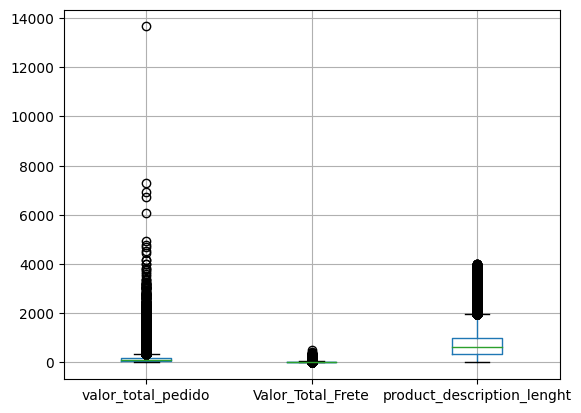

In [139]:
tb_oficial_pedidos.boxplot(column= ['valor_total_pedido', 'Valor_Total_Frete', 'product_description_lenght'],
                          meanline = True )
plt.show()

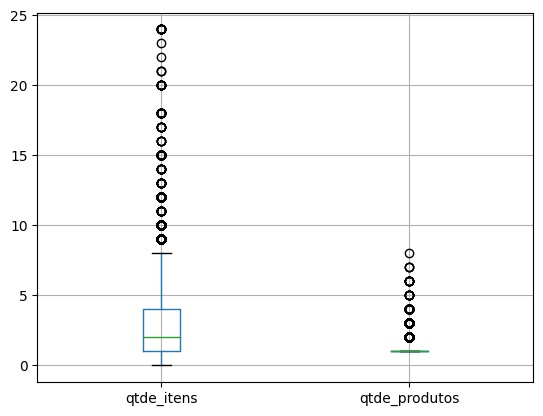

In [140]:
tb_oficial_pedidos.boxplot(column= [ 'qtde_itens','qtde_produtos'],
                          meanline = True )
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef568a26b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef568911660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef568912920>],
 'medians': [<matplotlib.lines.Line2D at 0x7ef568913430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ef5689136d0>],
 'means': []}

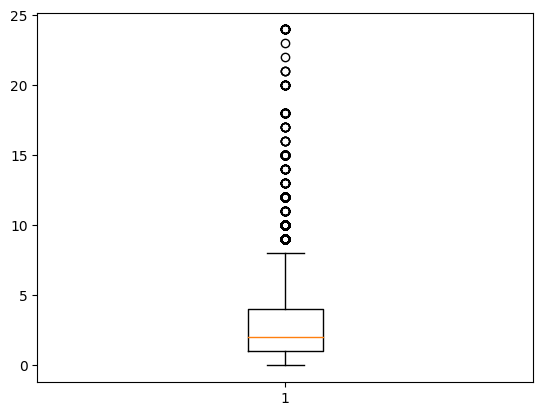

In [141]:
plt.boxplot(tb_oficial_pedidos['qtde_itens'])

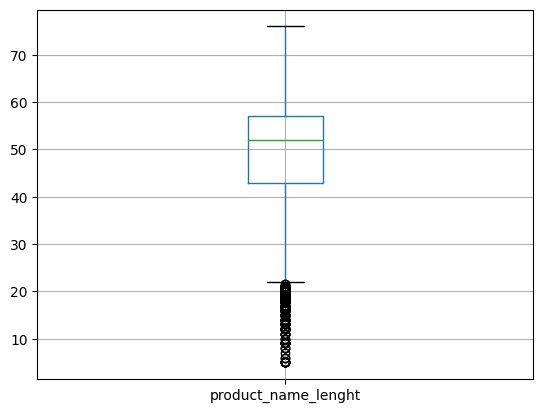

In [142]:
tb_oficial_pedidos.boxplot(column= 'product_name_lenght')
plt.show()

In [143]:
#carregar variaveis para plot
variaveis_numericas = []
for i in tb_oficial_pedidos.columns[0:23].tolist():
        if tb_oficial_pedidos.dtypes[i] == 'int64' or tb_oficial_pedidos.dtypes[i] == 'float64':
            print(i, ':' , tb_oficial_pedidos.dtypes[i])
            variaveis_numericas.append(i)

valor_total_pedido : float64
qtde_itens : int64
Pagto_Credito : int64
Target : int64
vendedor_estado_dif : int64
qtde_produtos : int64
Valor_Itens : float64
Valor_Total_Frete : float64
product_name_lenght : float64
product_description_lenght : float64
product_photos_qty : float64
product_weight_g : float64
product_length_cm : float64
product_height_cm : float64
product_width_cm : float64
Flag_Atrasado : int64
alimentos_lazer : int64
moveis_eletrodomesticos : int64
eletroportateis_decor : int64


In [144]:
variaveis_numericas.remove('Target')
variaveis_numericas.remove('Pagto_Credito')
variaveis_numericas.remove('vendedor_estado_dif')
variaveis_numericas.remove('alimentos_lazer')
variaveis_numericas.remove('moveis_eletrodomesticos')
variaveis_numericas.remove('eletroportateis_decor')
variaveis_numericas.remove('Flag_Atrasado')
variaveis_numericas.remove('qtde_produtos')
variaveis_numericas.remove('qtde_itens')

In [145]:
variaveis_numericas

['valor_total_pedido',
 'Valor_Itens',
 'Valor_Total_Frete',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

### Boxplots das Variáveis

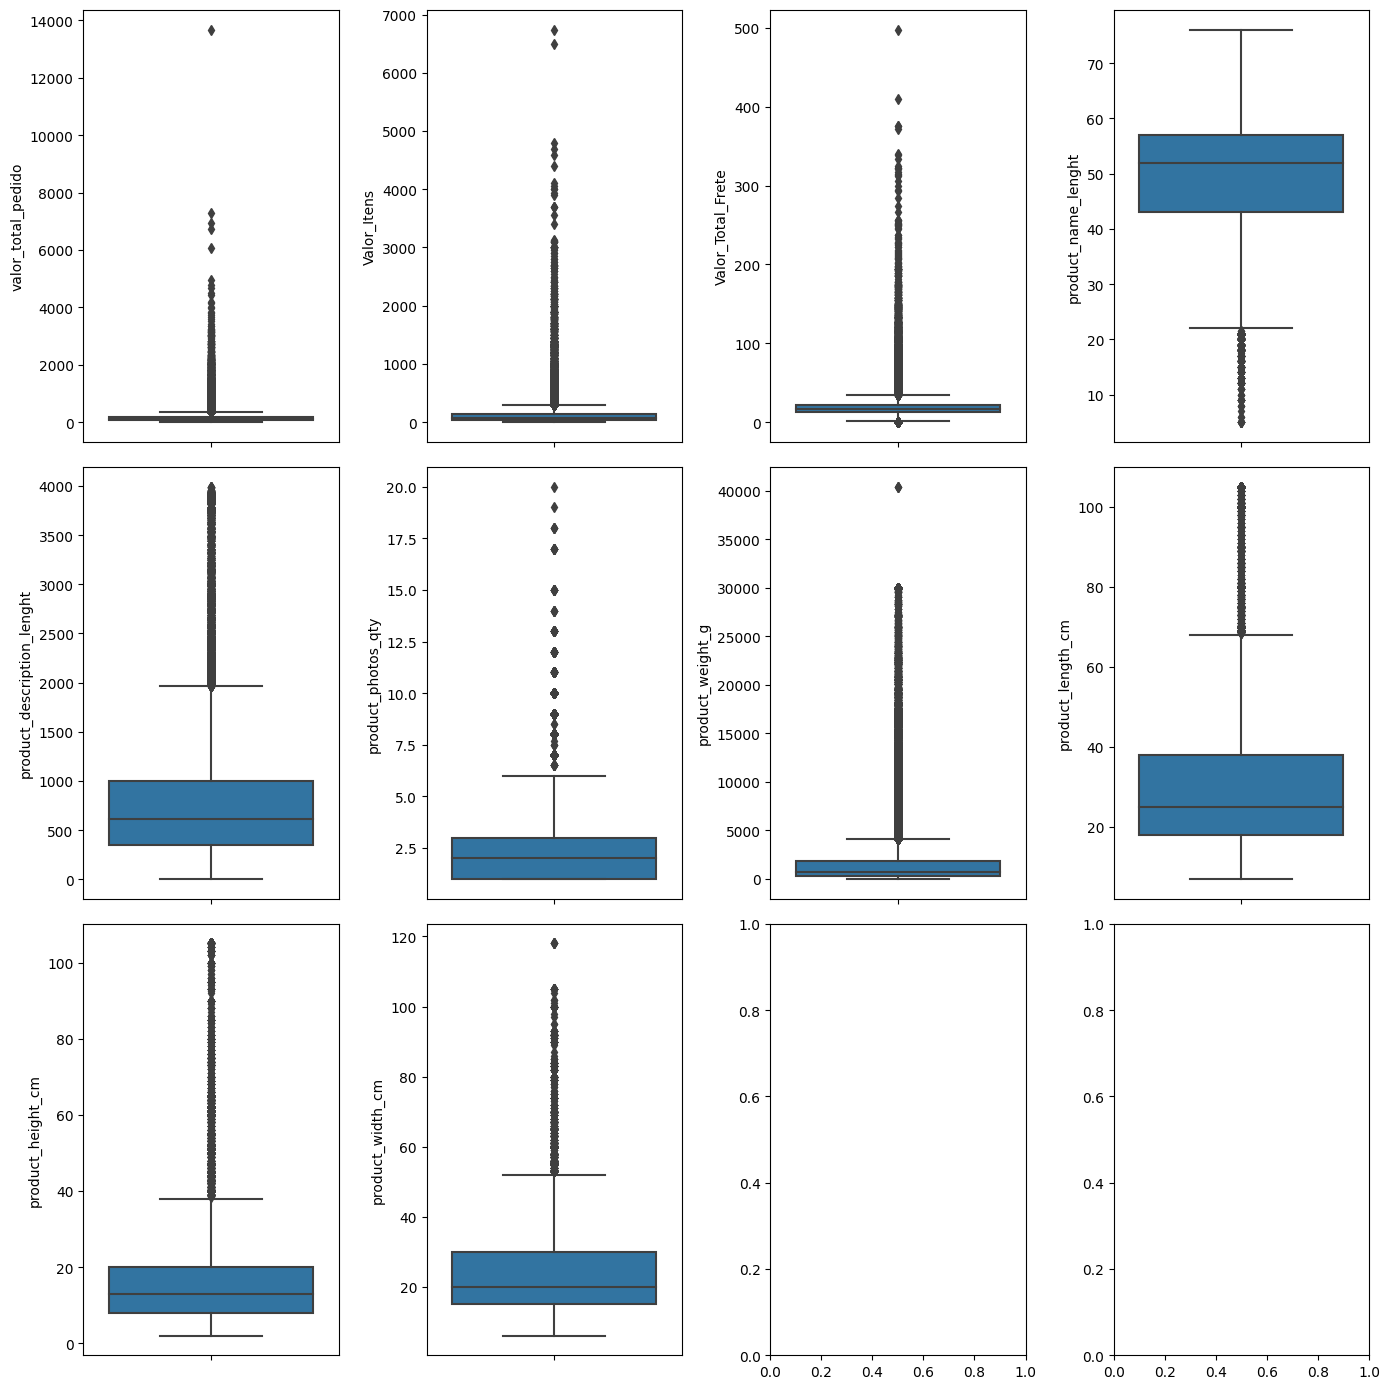

In [146]:
# # Criando os BOXPLOTs
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3,4) #3 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = tb_oficial_pedidos, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

#plt.show()

In [147]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(tb_pedidos_num, figsize = (15,15))

### Histograma das Variáveis

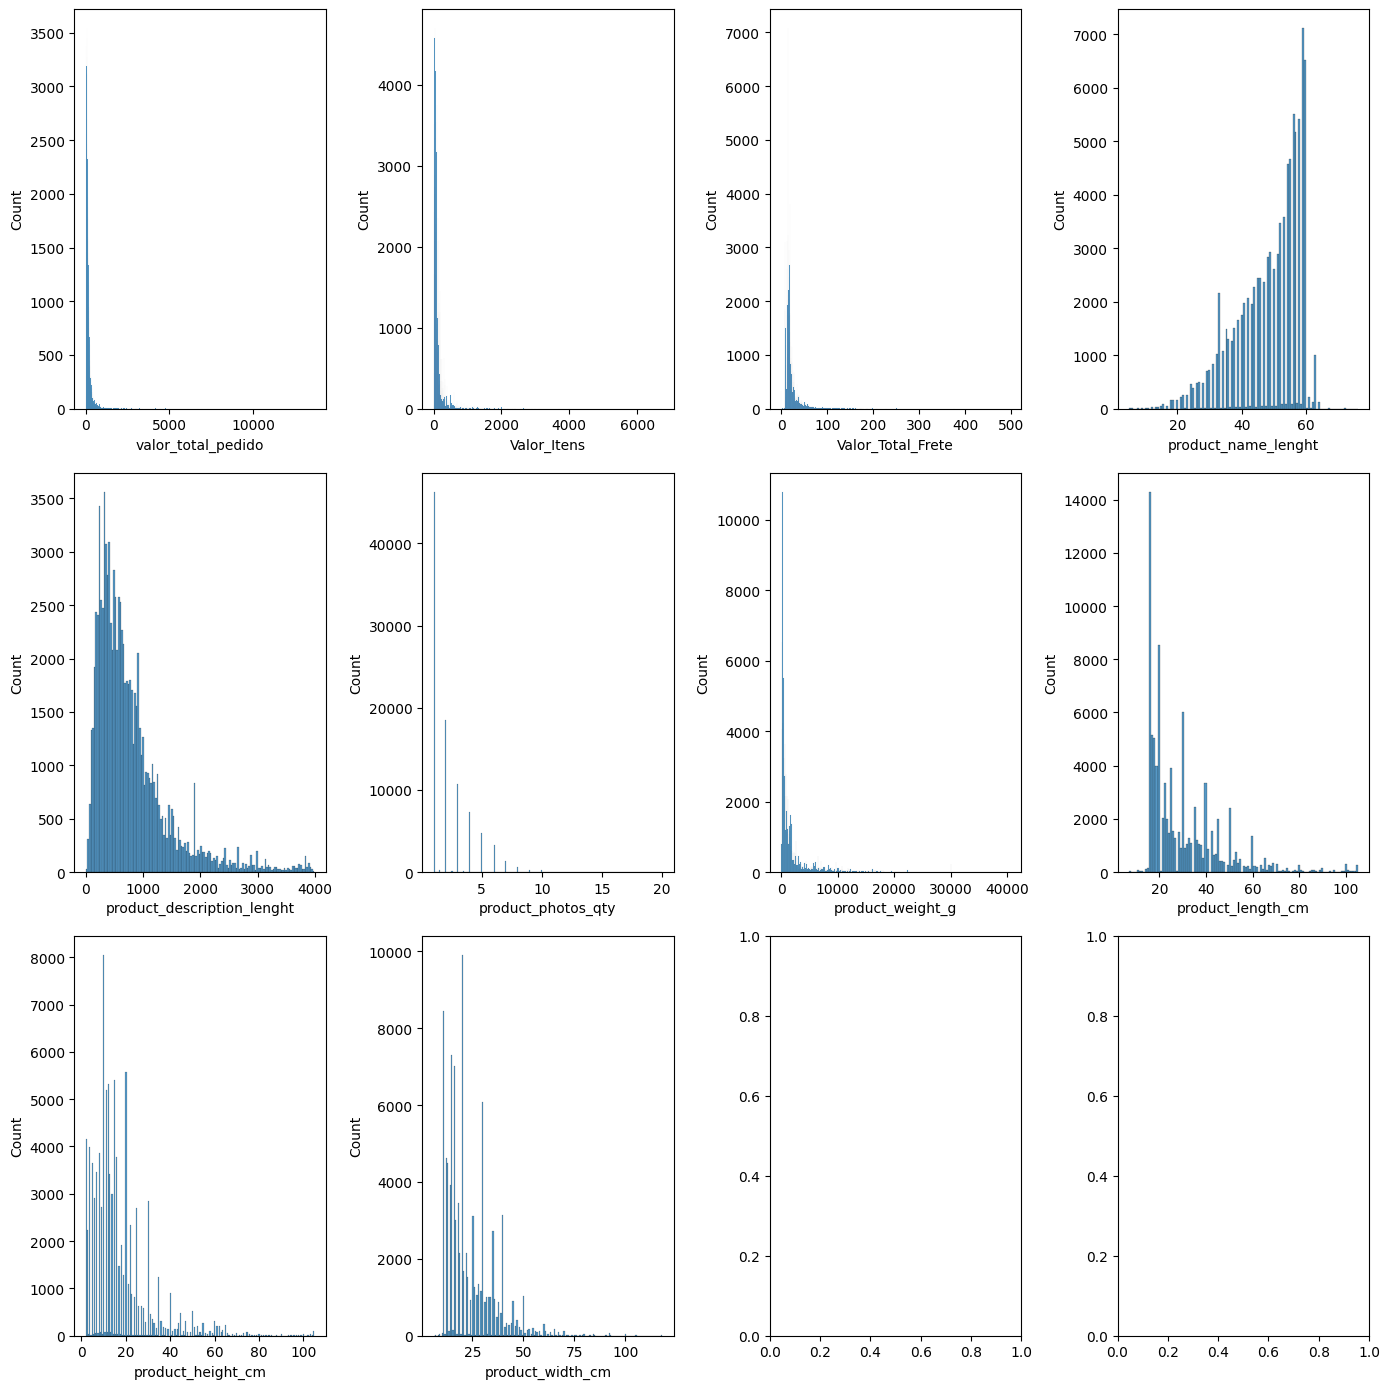

In [148]:
 # Criando os HISTOGRAMAS
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 4) #5 linhas e 5 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = tb_oficial_pedidos, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

#plt.show()

In [149]:
tb_pedidos_num = tb_oficial_pedidos[variaveis_numericas]

### Matriz de Correlação

In [150]:
# Criando a MATRIZ DE CORRELAÇÃO
matriz = tb_pedidos_num.corr()
matriz

valor_total_pedido  Valor_Itens  \
valor_total_pedido                    1.000000     0.921489   
Valor_Itens                           0.921489     1.000000   
Valor_Total_Frete                     0.462686     0.421595   
product_name_lenght                   0.013783     0.016622   
product_description_lenght            0.186483     0.197780   
product_photos_qty                    0.031890     0.046382   
product_weight_g                      0.366458     0.344309   
product_length_cm                     0.162325     0.145444   
product_height_cm                     0.249757     0.231821   
product_width_cm                      0.185643     0.175303   

                            Valor_Total_Frete  product_name_lenght  \
valor_total_pedido                   0.462686             0.013783   
Valor_Itens                          0.421595             0.016622   
Valor_Total_Frete                    1.000000             0.027491   
product_name_lenght                  0.027491             1.000000   
product_description_lenght           0.085778             0.093271   
product_photos_qty                   0.016339             0.148447   
product_weight_g                     0.597647             0.031159   
product_length_cm                    0.304293             0.060897   
product_height_cm                    0.378242            -0.015595   
product_width_cm                     0.321710             0.064363   

                            product_description_lenght  product_photos_qty  \
valor_total_pedido                            0.186483            0.031890   
Valor_Itens                                   0.197780            0.046382   
Valor_Total_Frete                             0.085778            0.016339   
product_name_lenght                           0.093271            0.148447   
product_description_lenght                    1.000000            0.120234   
product_photos_qty                            0.120234            1.000000   
product_weight_g                              0.057962            0.028897   
product_length_cm                            -0.000985            0.048980   
product_height_cm                             0.073826           -0.027118   
product_width_cm                             -0.062776            0.012255   

                            product_weight_g  product_length_cm  \
valor_total_pedido                  0.366458           0.162325   
Valor_Itens                         0.344309           0.145444   
Valor_Total_Frete                   0.597647           0.304293   
product_name_lenght                 0.031159           0.060897   
product_description_lenght          0.057962          -0.000985   
product_photos_qty                  0.028897           0.048980   
product_weight_g                    1.000000           0.465577   
product_length_cm                   0.465577           1.000000   
product_height_cm                   0.581544           0.193003   
product_width_cm                    0.513694           0.549358   

                            product_height_cm  product_width_cm  
valor_total_pedido                   0.249757          0.185643  
Valor_Itens                          0.231821          0.175303  
Valor_Total_Frete                    0.378242          0.321710  
product_name_lenght                 -0.015595          0.064363  
product_description_lenght           0.073826         -0.062776  
product_photos_qty                  -0.027118          0.012255  
product_weight_g                     0.581544          0.513694  
product_length_cm                    0.193003          0.549358  
product_height_cm                    1.000000          0.285440  
product_width_cm                     0.285440          1.000000

In [151]:
#matriz2 = pd.DataFrame(matriz)
#matriz2.to_excel('matriz_correlacao.xlsx')

In [152]:
# plot correlation matrix
#grafico = plt.figure()
#subgrafico = grafico.add_subplot(111)
#cax = subgrafico.matshow(matriz, vmin = -1, vmax = 1)
#grafico.colorbar(cax)
#ticks = np.arrange(0,9,1)
#subgrafico.set_xticks(ticks)
#subgrafico.set_yticks(ticks)
#titulos_abreviados = ['vlr_total_pedido', 'qtde_itens', 'qtde_produtos', 'Valor_Itens', 'Valor_Frete', 'Nome_Produto', 'Descrição', 'Qtde_Fotos', 'Peso', 'Comprimento', 'Altura', 'Largura']
#subgrafico.set_xticklabel(titulos_abreviados)
#subgrafico.set_yticklabel(titulos_abreviados)
#plt.show()

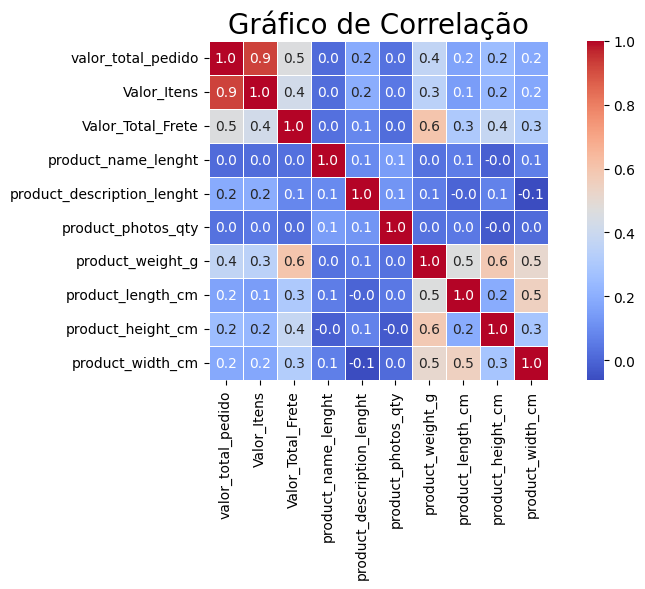

In [153]:
# Calcule a matriz de correlação
correlation_matrix = tb_pedidos_num.corr()

# Crie um gráfico de correlação com nomes das variáveis anotados
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".1f", square=True)

# Adicione o título
plt.title('Gráfico de Correlação')

# Salve a imagem do gráfico em um arquivo
plt.savefig('matriz_correlacao.png')

# Exiba o gráfico
plt.show()

In [154]:
# Removendo a variável que foi altamente correlacionada
variaveis_numericas.remove('Valor_Itens')

In [155]:
tb_oficial_pedidos = tb_oficial_pedidos.drop(columns=['Valor_Itens'])
tb_oficial_pedidos.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1

In [156]:
tb_pedidos_num = tb_pedidos_num.drop(columns=['Valor_Itens'])
tb_pedidos_num.head()

valor_total_pedido  Valor_Total_Frete  product_name_lenght  \
0           12.903333               8.72                 40.0   
1          141.460000              22.76                 29.0   
2          179.120000              19.22                 46.0   
3           72.200000              27.20                 59.0   
4           28.620000               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  
0               19.0                8.0              13.0  
1               19.0               13.0              19.0  
2               24.0               19.0              21.0  
3               30.0               10.0              20.0  
4               51.0               15.0              15.0

# **Tratamento de Outliers**

In [ ]:
# Criando uma cópia da base
tb02_oficial_pedidos = tb_oficial_pedidos.copy()

In [ ]:
tb02_oficial_pedidos.columns

Index(['order_id', 'valor_total_pedido', 'qtde_itens', 'Pagto_Credito',
       'Target', 'vendedor_estado_dif', 'qtde_produtos', 'Valor_Total_Frete',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'Flag_Atrasado',
       'alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor'],
      dtype='object')

In [ ]:
tb_pedidos_num.columns

Index(['valor_total_pedido', 'Valor_Total_Frete', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
import numpy as np
from scipy import stats

# Definindo um limite para outliers (por exemplo, usando Z-Score -> considero Outliers dados a 3 desvios padrão da média)
threshold = 3.0

# Loop para percorrer cada coluna
for col in tb_pedidos_num.columns:
  variavel = tb02_oficial_pedidos[col]
  mean = variavel.mean()
  std = variavel.std()

  # Identificando outliers usando Z-Score
  outliers = tb02_oficial_pedidos[(variavel - mean).abs() > threshold * std]

  # Calculando a mediana dos dados não outliers
  median = tb02_oficial_pedidos[~tb02_oficial_pedidos.index.isin(outliers.index)][col].median()

  # Substituindo outliers pela mediana
  tb02_oficial_pedidos.loc[outliers.index, col] = median

In [ ]:
tb02_oficial_pedidos.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94487.000000  94487.000000   94487.000000  94487.000000   
mean           135.779807      2.930255       0.770148      0.407919   
std            117.412270      2.714795       0.420740      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            101.245000      2.000000       1.000000      0.000000   
75%            167.620000      4.000000       1.000000      1.000000   
max            801.490000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos  Valor_Total_Frete  \
count         94487.000000   94487.000000       94487.000000   
mean              0.641506       1.038132          19.160698   
std               0.479561       0.226646          10.456632   
min               0.000000       1.000000           0.000000   
25%               0.000000       1.000000          13.440000   
50%               1.000000       1.000000          16.460000   
75%               1.000000       1.000000          21.190000   
max               1.000000       8.000000          70.240000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94487.000000                94487.000000        94487.000000   
mean             49.111558                  727.083036            2.137792   
std               9.575214                  512.483212            1.510475   
min              20.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  595.000000            1.500000   
75%              57.000000                  940.000000            3.000000   
max              76.000000                 2748.000000            7.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        1626.468234          28.795294          15.176547   
std         2404.241042          13.382155          10.285182   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          650.000000          24.000000          13.000000   
75%         1650.000000          36.000000          20.000000   
max        13325.000000          78.000000          56.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94487.000000     94487.000000   
mean          22.304625       0.079831         0.517627   
std           10.065205       0.271033         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max           58.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [ ]:
tb_oficial_pedidos.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94487.000000  94487.000000   94487.000000  94487.000000   
mean           157.148991      2.930255       0.770148      0.407919   
std            214.819228      2.714795       0.420740      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            103.020000      2.000000       1.000000      0.000000   
75%            174.730000      4.000000       1.000000      1.000000   
max          13664.080000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos  Valor_Total_Frete  \
count         94487.000000   94487.000000       94487.000000   
mean              0.641506       1.038132          20.722010   
std               0.479561       0.226646          16.506051   
min               0.000000       1.000000           0.000000   
25%               0.000000       1.000000          13.440000   
50%               1.000000       1.000000          16.610000   
75%               1.000000       1.000000          22.030000   
max               1.000000       8.000000         497.420000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94487.000000                94487.000000        94487.000000   
mean             48.875150                  793.479147            2.251333   
std               9.937562                  651.933718            1.741014   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        2101.188434          30.130187          16.465343   
std         3743.839920          16.070495          13.258656   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94487.000000     94487.000000   
mean          23.048300       0.079831         0.517627   
std           11.691941       0.271033         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max          118.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [ ]:
tb_pedidos_num.describe()

valor_total_pedido  Valor_Total_Frete  product_name_lenght  \
count        94487.000000       94487.000000         94487.000000   
mean           157.148991          20.722010            48.875150   
std            214.819228          16.506051             9.937562   
min              1.937895           0.000000             5.000000   
25%             60.100000          13.440000            43.000000   
50%            103.020000          16.610000            52.000000   
75%            174.730000          22.030000            57.000000   
max          13664.080000         497.420000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                94487.000000        94487.000000      94487.000000   
mean                   793.479147            2.251333       2101.188434   
std                    651.933718            1.741014       3743.839920   
min                      4.000000            1.000000          0.000000   
25%                    351.000000            1.000000        300.000000   
50%                    608.000000            2.000000        700.000000   
75%                    995.000000            3.000000       1813.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  
count       94487.000000       94487.000000      94487.000000  
mean           30.130187          16.465343         23.048300  
std            16.070495          13.258656         11.691941  
min             7.000000           2.000000          6.000000  
25%            18.000000           8.000000         15.000000  
50%            25.000000          13.000000         20.000000  
75%            38.000000          20.000000         30.000000  
max           105.000000         105.000000        118.000000

In [ ]:
tb02_oficial_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94487 non-null  object 
 1   valor_total_pedido          94487 non-null  float64
 2   qtde_itens                  94487 non-null  int64  
 3   Pagto_Credito               94487 non-null  int64  
 4   Target                      94487 non-null  int64  
 5   vendedor_estado_dif         94487 non-null  int64  
 6   qtde_produtos               94487 non-null  int64  
 7   Valor_Total_Frete           94487 non-null  float64
 8   product_name_lenght         94487 non-null  float64
 9   product_description_lenght  94487 non-null  float64
 10  product_photos_qty          94487 non-null  float64
 11  product_weight_g            94487 non-null  float64
 12  product_length_cm           94487 non-null  float64
 13  product_height_cm           944

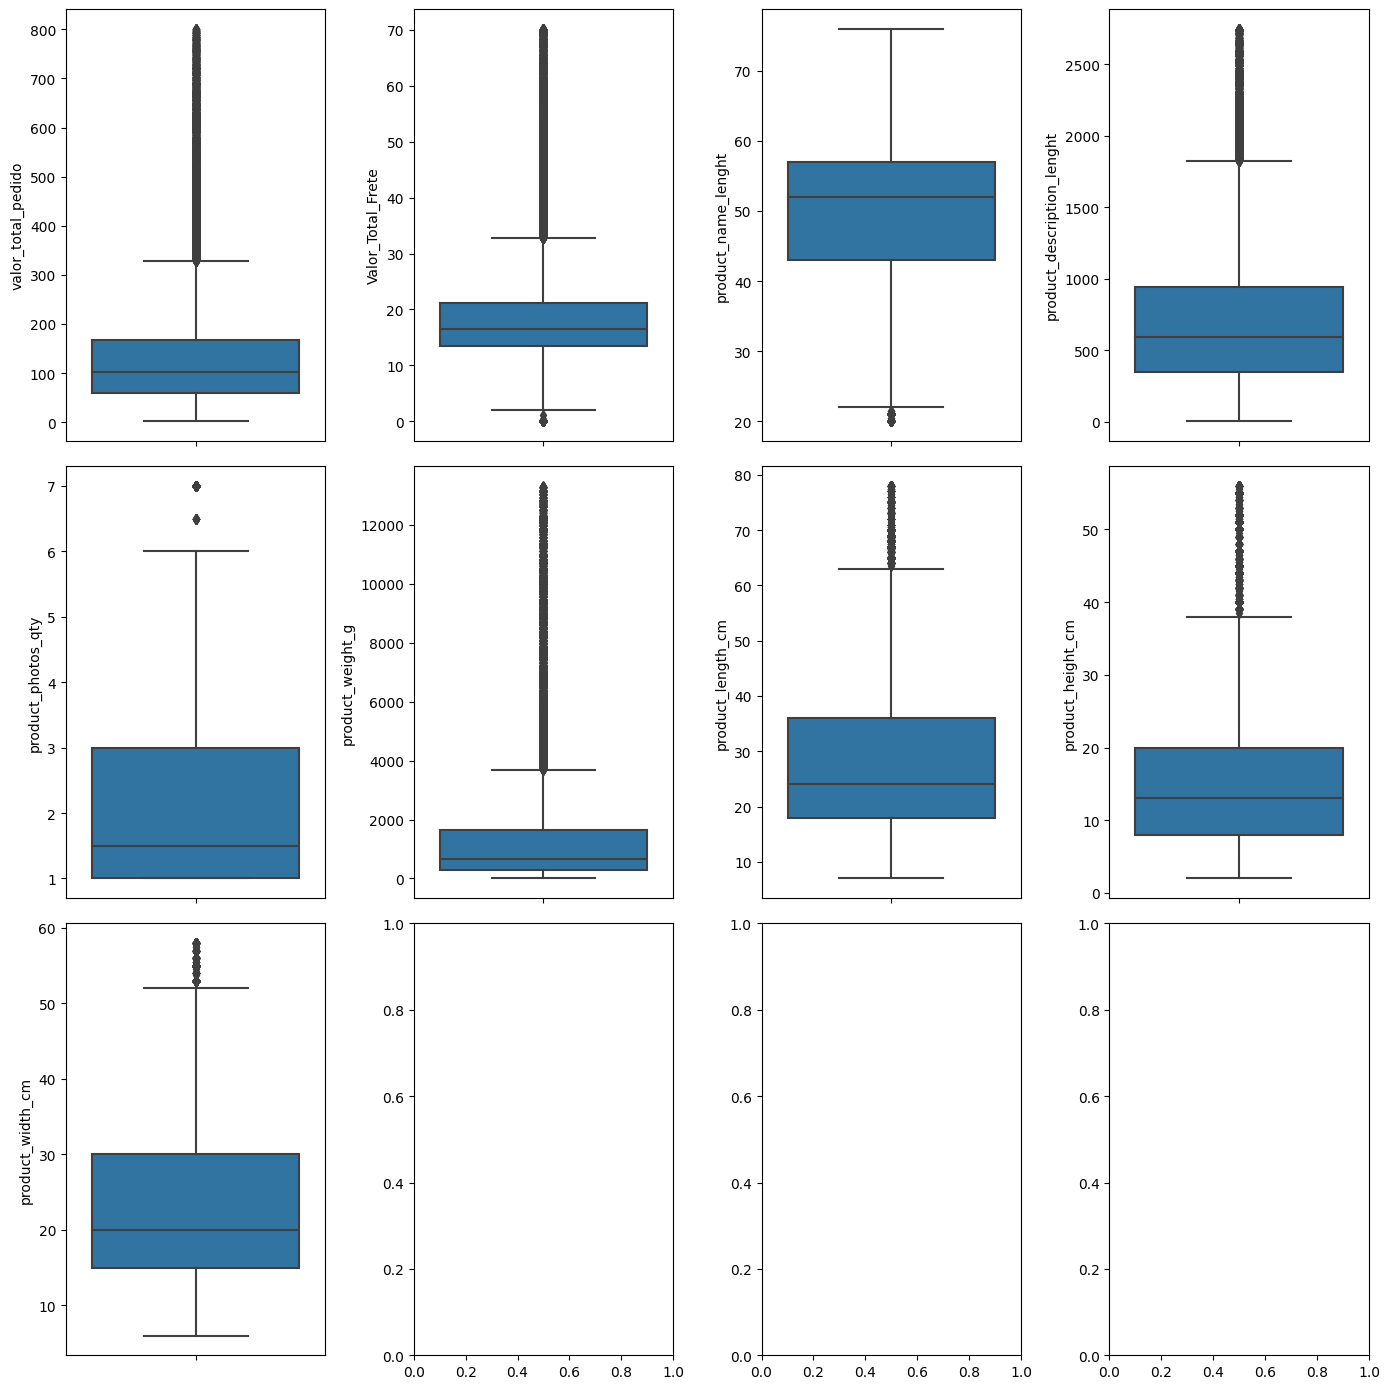

In [ ]:
# # Criando os BOXPLOTs
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3,4) #3 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = tb02_oficial_pedidos, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

# **Modelagem dos Dados**

In [ ]:
# Criando uma cópia da base
tb_pedidos_mod = tb02_oficial_pedidos.copy()

In [ ]:
tb_pedidos_mod.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1

In [ ]:
tb_pedidos_mod.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94487.000000  94487.000000   94487.000000  94487.000000   
mean           135.779807      2.930255       0.770148      0.407919   
std            117.412270      2.714795       0.420740      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            101.245000      2.000000       1.000000      0.000000   
75%            167.620000      4.000000       1.000000      1.000000   
max            801.490000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos  Valor_Total_Frete  \
count         94487.000000   94487.000000       94487.000000   
mean              0.641506       1.038132          19.160698   
std               0.479561       0.226646          10.456632   
min               0.000000       1.000000           0.000000   
25%               0.000000       1.000000          13.440000   
50%               1.000000       1.000000          16.460000   
75%               1.000000       1.000000          21.190000   
max               1.000000       8.000000          70.240000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94487.000000                94487.000000        94487.000000   
mean             49.111558                  727.083036            2.137792   
std               9.575214                  512.483212            1.510475   
min              20.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  595.000000            1.500000   
75%              57.000000                  940.000000            3.000000   
max              76.000000                 2748.000000            7.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        1626.468234          28.795294          15.176547   
std         2404.241042          13.382155          10.285182   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          650.000000          24.000000          13.000000   
75%         1650.000000          36.000000          20.000000   
max        13325.000000          78.000000          56.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94487.000000     94487.000000   
mean          22.304625       0.079831         0.517627   
std           10.065205       0.271033         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max           58.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [ ]:
# Pedido exemplo da flag de Estados
#tb_exemplo_estados2 = tb_pedidos_mod.query('order_id == "a98012aa8c697f2bcff9f8c2183e0f2b" ')
#tb_exemplo_estados2.to_excel('tb_exemplo_estados2.xlsx')

In [ ]:
#Excluindo único pedido que possui valores NA
filtro = tb_oficial_pedidos['order_id'] != "85f8ad45e067abd694b627859fa57453"
tb_pedidos_mod = tb_pedidos_mod[filtro]
tb_pedidos_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94487 non-null  object 
 1   valor_total_pedido          94487 non-null  float64
 2   qtde_itens                  94487 non-null  int64  
 3   Pagto_Credito               94487 non-null  int64  
 4   Target                      94487 non-null  int64  
 5   vendedor_estado_dif         94487 non-null  int64  
 6   qtde_produtos               94487 non-null  int64  
 7   Valor_Total_Frete           94487 non-null  float64
 8   product_name_lenght         94487 non-null  float64
 9   product_description_lenght  94487 non-null  float64
 10  product_photos_qty          94487 non-null  float64
 11  product_weight_g            94487 non-null  float64
 12  product_length_cm           94487 non-null  float64
 13  product_height_cm           944

In [ ]:
tb_pedidos_mod.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1

In [ ]:
explicativas = pd.DataFrame(tb_pedidos_mod)
explicativas.drop(['order_id', 'Target'], axis=1, inplace=True)
explicativas.head() ## (94487, 17)

valor_total_pedido  qtde_itens  Pagto_Credito  vendedor_estado_dif  \
0           12.903333           1              1                    0   
1          141.460000           1              0                    1   
2          179.120000           3              1                    1   
3           72.200000           1              1                    1   
4           28.620000           1              1                    0   

   qtde_produtos  Valor_Total_Frete  product_name_lenght  \
0              1               8.72                 40.0   
1              1              22.76                 29.0   
2              1              19.22                 46.0   
3              1              27.20                 59.0   
4              1               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
0               19.0                8.0              13.0              0   
1               19.0               13.0              19.0              0   
2               24.0               19.0              21.0              0   
3               30.0               10.0              20.0              0   
4               51.0               15.0              15.0              0   

   alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
0                0                        0                      1  
1                1                        0                      0  
2                0                        0                      1  
3                0                        0                      1  
4                0                        0                      1

In [ ]:
resposta = pd.DataFrame(tb_pedidos_mod)
resposta = resposta[['Target']]
resposta.head() ## (94488, 1)

Target
0       1
1       1
2       0
3       0
4       0

In [ ]:
explicativas.describe()

valor_total_pedido    qtde_itens  Pagto_Credito  vendedor_estado_dif  \
count        94487.000000  94487.000000   94487.000000         94487.000000   
mean           135.779807      2.930255       0.770148             0.641506   
std            117.412270      2.714795       0.420740             0.479561   
min              1.937895      0.000000       0.000000             0.000000   
25%             60.100000      1.000000       1.000000             0.000000   
50%            101.245000      2.000000       1.000000             1.000000   
75%            167.620000      4.000000       1.000000             1.000000   
max            801.490000     24.000000       1.000000             1.000000   

       qtde_produtos  Valor_Total_Frete  product_name_lenght  \
count   94487.000000       94487.000000         94487.000000   
mean        1.038132          19.160698            49.111558   
std         0.226646          10.456632             9.575214   
min         1.000000           0.000000            20.000000   
25%         1.000000          13.440000            43.000000   
50%         1.000000          16.460000            52.000000   
75%         1.000000          21.190000            57.000000   
max         8.000000          70.240000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                94487.000000        94487.000000      94487.000000   
mean                   727.083036            2.137792       1626.468234   
std                    512.483212            1.510475       2404.241042   
min                      4.000000            1.000000          0.000000   
25%                    351.000000            1.000000        300.000000   
50%                    595.000000            1.500000        650.000000   
75%                    940.000000            3.000000       1650.000000   
max                   2748.000000            7.000000      13325.000000   

       product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
count       94487.000000       94487.000000      94487.000000   94487.000000   
mean           28.795294          15.176547         22.304625       0.079831   
std            13.382155          10.285182         10.065205       0.271033   
min             7.000000           2.000000          6.000000       0.000000   
25%            18.000000           8.000000         15.000000       0.000000   
50%            24.000000          13.000000         20.000000       0.000000   
75%            36.000000          20.000000         30.000000       0.000000   
max            78.000000          56.000000         58.000000       1.000000   

       alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
count     94487.000000             94487.000000           94487.000000  
mean          0.517627                 0.027993               0.457100  
std           0.499692                 0.164954               0.498159  
min           0.000000                 0.000000               0.000000  
25%           0.000000                 0.000000               0.000000  
50%           1.000000                 0.000000               0.000000  
75%           1.000000                 0.000000               1.000000  
max           1.000000                 1.000000               1.000000

In [ ]:
col_explicativas = explicativas.columns.tolist()
col_target = resposta.columns.tolist()

In [ ]:
col_explicativas

['valor_total_pedido',
 'qtde_itens',
 'Pagto_Credito',
 'vendedor_estado_dif',
 'qtde_produtos',
 'Valor_Total_Frete',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'Flag_Atrasado',
 'alimentos_lazer',
 'moveis_eletrodomesticos',
 'eletroportateis_decor']

In [ ]:
col_target

['Target']

## Stepwise

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(explicativas, resposta, test_size=0.3, random_state = 415)

In [ ]:
# Número de features que você deseja selecionar
num_features_to_select = 10

# Crie o modelo de regressão
model = LogisticRegression()

# Use RFE (Recursive Feature Elimination) para realizar o Stepwise
rfe = RFE(model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Lista de variáveis selecionadas
selected_features = list(np.array(X_train.columns)[rfe.support_])

#print("Variáveis selecionadas:", selected_features)

#Variáveis selecionadas - 10 variáveis:
 #['qtde_itens', 'Pagto_Credito', 'vendedor_estado_dif', 'qtde_produtos', 'Valor_Total_Frete',
#'product_height_cm', 'Flag_Atrasado', 'alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor']

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model

In [ ]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Adiciona variáveis se melhorarem o modelo
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Adicionado {best_feature} com p-value {best_pval:.4f}')
        # Remove variáveis se p-value for maior que o threshold_out
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval >= threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Removido {worst_feature} com p-value {worst_pval:.4f}')
        if not changed:
            break
    return included

In [ ]:
# Chamando a função Stepwise
selected_features = stepwise_selection(X_train, y_train)

print("Variáveis selecionadas:", selected_features)
#Variáveis selecionadas - 7 variáveis:
#['Flag_Atrasado', 'qtde_produtos', 'vendedor_estado_dif', 'moveis_eletrodomesticos',
#'product_name_lenght', 'eletroportateis_decor', 'product_description_lenght']

<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado Flag_Atrasado com p-value 0.0000


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado qtde_produtos com p-value 0.0000


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado vendedor_estado_dif com p-value 0.0000


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado moveis_eletrodomesticos com p-value 0.0000


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado product_name_lenght com p-value 0.0000


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Adicionado product_description_lenght com p-value 0.0011


<ipython-input-180-77aad39501a0>:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Variáveis selecionadas: ['Flag_Atrasado', 'qtde_produtos', 'vendedor_estado_dif', 'moveis_eletrodomesticos', 'product_name_lenght', 'product_description_lenght']


In [ ]:
# Mantendo apenas as avariáveis selecionadas pelo STEPWISE
explicativas = explicativas[['Flag_Atrasado', 'vendedor_estado_dif', 'moveis_eletrodomesticos', 'product_name_lenght', 'eletroportateis_decor', 'product_description_lenght']]
explicativas.info()

## Regressão Logística

In [ ]:
# FORMA 1: Treinar o modelo
logistic_regression1 = LogisticRegression()
logistic_regression1.fit(X_train, y_train)
y_pred_logreg1 = logistic_regression1.predict(X_test)
print('Acurácia da Regressão Logística 1 é:', metrics.accuracy_score(y_test, y_pred_logreg1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
resposta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  94487 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [ ]:
explicativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   valor_total_pedido          94487 non-null  float64
 1   qtde_itens                  94487 non-null  int64  
 2   Pagto_Credito               94487 non-null  int64  
 3   vendedor_estado_dif         94487 non-null  int64  
 4   qtde_produtos               94487 non-null  int64  
 5   Valor_Total_Frete           94487 non-null  float64
 6   product_name_lenght         94487 non-null  float64
 7   product_description_lenght  94487 non-null  float64
 8   product_photos_qty          94487 non-null  float64
 9   product_weight_g            94487 non-null  float64
 10  product_length_cm           94487 non-null  float64
 11  product_height_cm           94487 non-null  float64
 12  product_width_cm            94487 non-null  float64
 13  Flag_Atrasado               944

In [ ]:
# FORMA 2: Treinando um modelo
logistic_regression2 = sm.GLM(resposta, explicativas, family = sm.families.Binomial())
res = logistic_regression2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                94487
Model:                            GLM   Df Residuals:                    94470
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61230.
Date:                Mon, 11 Sep 2023   Deviance:                   1.2246e+05
Time:                        02:51:23   Pearson chi2:                 9.46e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05459
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
valor_total_pedido  

In [ ]:
print(res.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               123275.2698 
Link Function:          Logit               BIC:               -959131.6194
Dependent Variable:     Target              Log-Likelihood:    -61632.     
Date:                   2023-09-10 12:58    LL-Null:           -63882.     
No. Observations:       94487               Deviance:          1.2326e+05  
Df Model:               5                   Pearson chi2:      9.45e+04    
Df Residuals:           94481               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Flag_Atrasado               1.7263   0.0286  60.2929 0.0000  1.6702  1.7824
vendedor_estado_dif         0.118

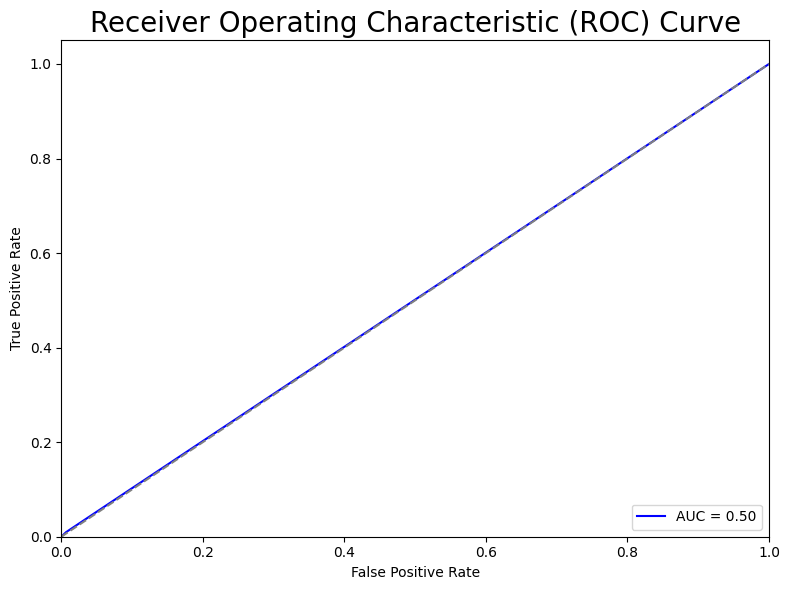

In [ ]:
# Calcula a taxa de falsos positivos (FPR) e a taxa de verdadeiros positivos (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg1)

# Calcula a área sob a curva ROC (AUC-ROC)
auc_logreg1 = roc_auc_score(y_test, y_pred_logreg1)

# Plot da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_logreg1:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

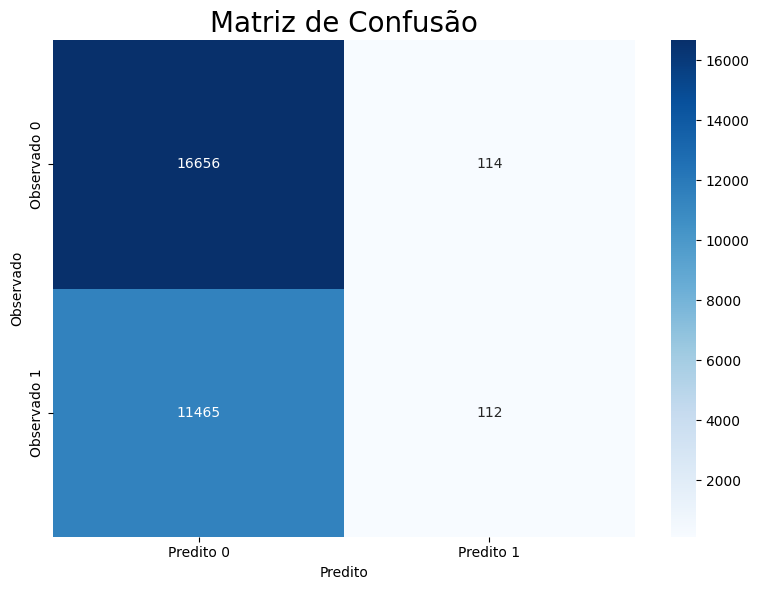

In [ ]:
# MATRIZ DE CONFUSÃO
conf_matrix_logreg1 = confusion_matrix(y_test, y_pred_logreg1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg1, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predito 0", "Predito 1"],
            yticklabels=["Observado 0", "Observado 1"])
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calcula os valores da matriz de confusão
TP = conf_matrix_logreg1[1, 1]
FP = conf_matrix_logreg1[0, 1]
TN = conf_matrix_logreg1[0, 0]
FN = conf_matrix_logreg1[1, 0]

# Calcula a sensibilidade (recall)
sensibilidade = TP / (TP + FN)

# Calcula a especificidade
especificidade = TN / (TN + FP)

# Acerto Geral
acerto_geral = (TP + TN)/(TP + TN + FP + FN)

print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acerto Geral: {acerto_geral:.2f}")

Sensibilidade (Recall): 0.01
Especificidade: 0.99
Acerto Geral: 0.59


## Árvore de Decisão

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(explicativas, resposta, test_size=0.3, random_state=420)

In [ ]:
model_decisiontree = DecisionTreeClassifier(random_state=420)
model_decisiontree.fit(X_train, y_train)
y_pred = model_decisiontree.predict(X_test)
accuracy_decisiontree = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy_decisiontree:.2f}")

DecisionTreeClassifier(random_state=420)

In [ ]:
y_pred = model_decisiontree.predict(X_test)
accuracy_decisiontree = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy_decisiontree:.2f}")

Acurácia do modelo: 0.59


In [ ]:
#plt.figure(figsize=(20,10))
#plot_tree(model_decisiontree,
          ##feature_names= col_explicativas,
          ##class_names= col_target,
          #filled=True, rounded=True)
##plt.show()

In [ ]:
# Realizar a poda (limitando a profundidade da árvore)
model_decisiontree2 = DecisionTreeClassifier(max_depth = 5, random_state=415)
model_decisiontree2.fit(X_train, y_train)

y_pred2 = model_decisiontree2.predict(X_test)
accuracy_decisiontree2 = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo após a 1ª poda: {accuracy_decisiontree2:.2f}")

Acurácia do modelo após a 1ª poda: 0.59


In [ ]:
# Realizar a 2ª poda (limitando a profundidade da árvore)
model_decisiontree3 = DecisionTreeClassifier(max_depth = 3, random_state=415)
model_decisiontree3.fit(X_train, y_train)

y_pred_dtree3 = model_decisiontree3.predict(X_test)
accuracy_decisiontree3 = accuracy_score(y_test, y_pred_dtree3)
print(f"Acurácia do modelo após a 2ª poda: {accuracy_decisiontree3:.2f}")

Acurácia do modelo após a 2ª poda: 0.64


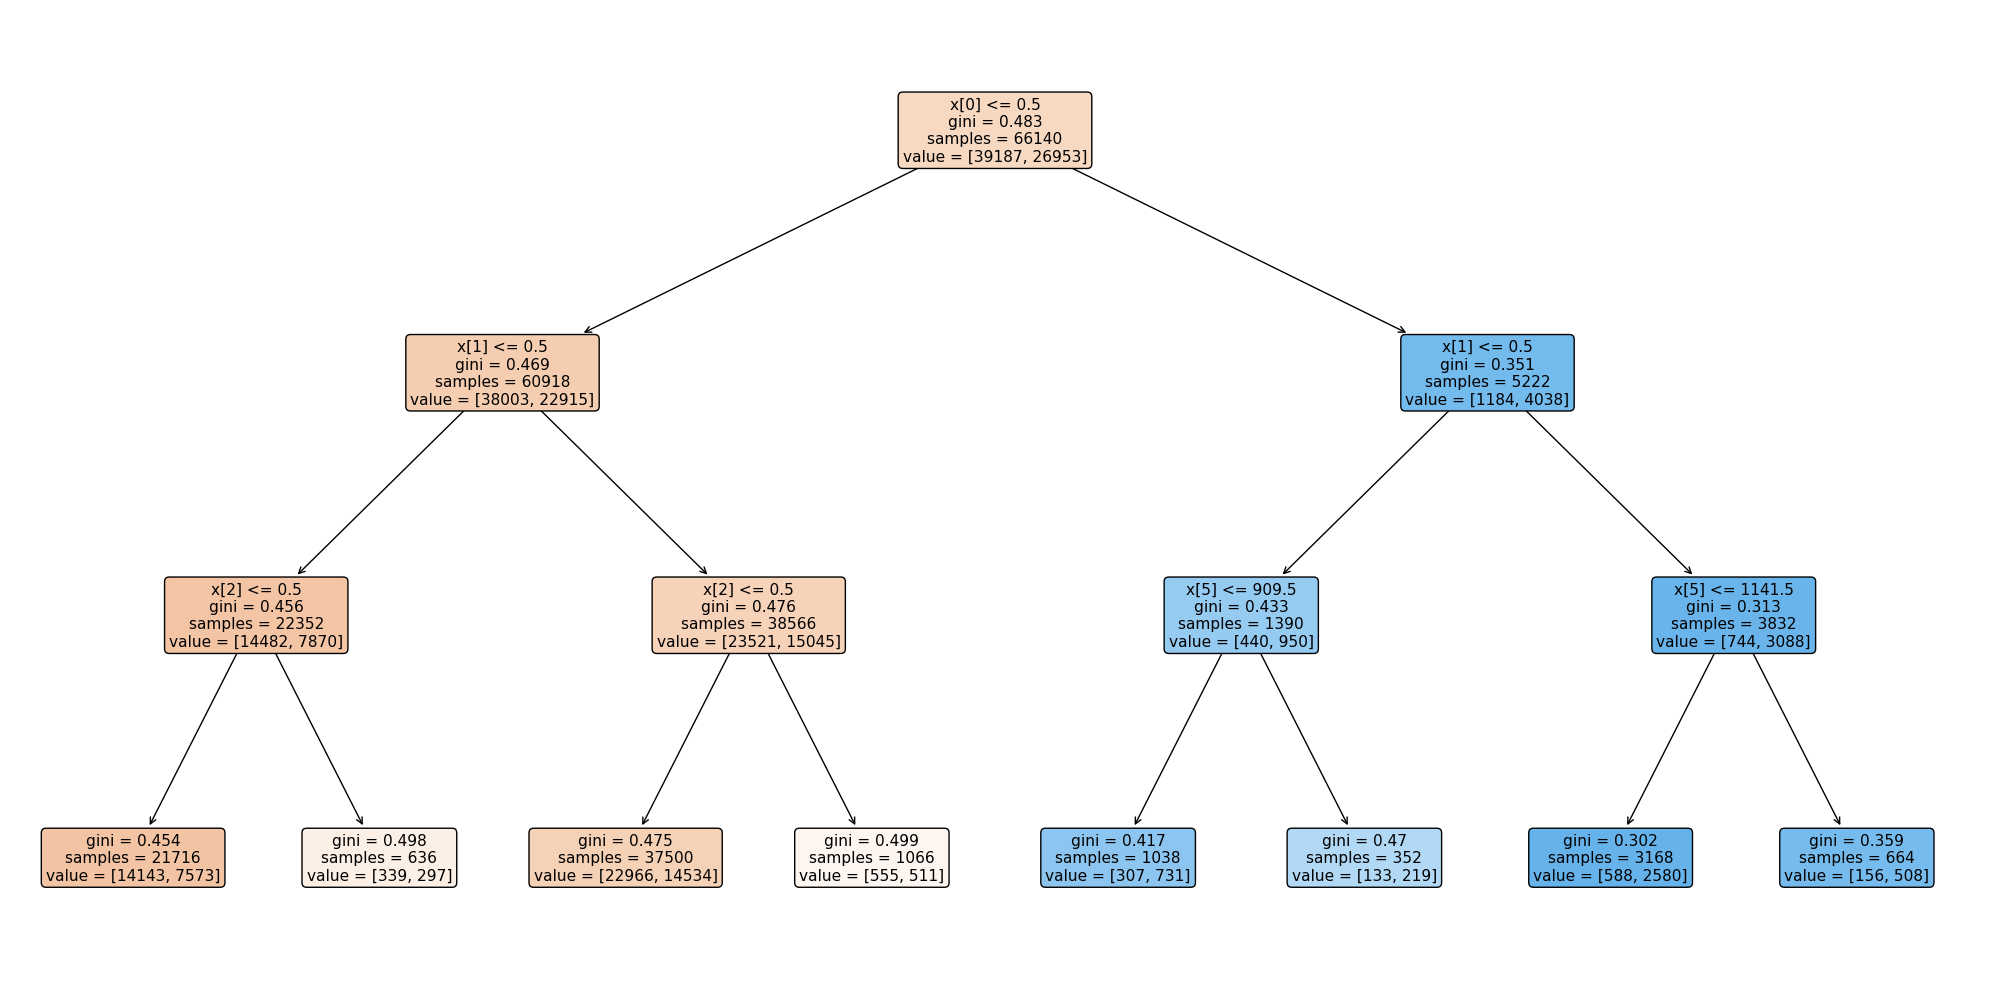

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_decisiontree3,
          ##feature_names= col_explicativas,
          ##class_names= col_target,
          filled=True, rounded=True)
plt.show()
#plt.savefig('arvore_decisao2.png', dpi=300)

In [ ]:
# MATRIZ DE CONFUSÃO
conf_matrix_decisiontree2 = confusion_matrix(y_test, y_pred_dtree3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decisiontree2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predito 0", "Predito 1"],
            yticklabels=["Observado 0", "Observado 1"])
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calcula os valores da matriz de confusão
TP = conf_matrix_decisiontree2[1, 1]
FP = conf_matrix_decisiontree2[0, 1]
TN = conf_matrix_decisiontree2[0, 0]
FN = conf_matrix_decisiontree2[1, 0]

# Calcula a sensibilidade (recall)
sensibilidade = TP / (TP + FN)

# Calcula a especificidade
especificidade = TN / (TN + FP)

# Acerto Geral
acerto_geral = (TP + TN)/(TP + TN + FP + FN)

print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acerto Geral: {acerto_geral:.2f}")

Sensibilidade (Recall): 0.16
Especificidade: 0.97
Acerto Geral: 0.64


## **Random Forest**

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(explicativas, resposta, test_size=0.3, random_state=415)

In [ ]:
randomforest1 = RandomForestClassifier(n_estimators=100, random_state=430)  # n_estimators é o número de árvores no conjunto
randomforest1.fit(X_train, y_train)

Y_pred_RF1 = randomforest1.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred_RF1)
print(f"Acurácia do modelo: {accuracy:.2f}")

<ipython-input-200-35919c807301>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=430)

In [ ]:
Y_pred_RF1 = randomforest1.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred_RF1)
print(f"Acurácia do modelo: {accuracy:.2f}")

##**Bagging**

In [ ]:
base_model = DecisionTreeClassifier()
bagging1 = BaggingClassifier(base_model, n_estimators=100, random_state=415)
bagging1.fit(X_train, y_train)

Y_pred_BAG1 = bagging1.predict(X_test)
accuracy_BAG1 = accuracy_score(y_test, Y_pred_BAG1)
print(f"Acurácia do modelo: {accuracy_BAG1:.2f}")

## **Boosting**

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)
boosting1 = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)
boosting1.fit(X_train, y_train)

Y_pred_BOST1 = bagging1.predict(X_test)
accuracy_BOST1 = accuracy_score(y_test, Y_pred_BAG1)
print(f"Acurácia do modelo: {accuracy_BOST1:.2f}")

## **Comparação dos Modelos**

In [ ]:
auc_logreg1 = 0.64
auc_decisiontree2= accuracy_score(y_test, y_pred_dtree3)
auc_randomforest = accuracy_score(y_test, Y_pred_RF1)
auc_bagging = accuracy_score(y_test, Y_pred_BAG1)
auc_boosting = accuracy_score(y_test,Y_pred_BOST1)

In [ ]:
# Plotar um gráfico comparativo
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies = [auc_logreg1, auc_decisiontree2, auc_randomforest,auc_bagging, auc_boosting]

plt.bar(labels, accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# **Cross Validation**

In [ ]:
kfold = KFold(n_splits=5)
X_train,X_test,y_train,y_test = train_test_split(explicativas, resposta, test_size=0.3, random_state = 450)

## Regressão Logística

In [ ]:
logistic_regression4 = LogisticRegression()
scores_lg4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_lg4 = scores_lg4.mean()
std_lg4 = scores_lg4.std()

print(f"Mean: {mean_lg4}")
print(f"Std : {std_lg4}")

##Árvore de Decisão

In [ ]:
#model_decisiontree2 = DecisionTreeClassifier(max_depth = 5, random_state=415)
scores_dt2 = cross_val_score(model_decisiontree2, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_dt2 = scores_dt2.mean()
std_dt2 = scores_dt2.std()

print(f"Mean: {mean_dt2}")
print(f"Std: {std_dt2}")

## Random Forest

In [ ]:
scores_rf1 = cross_val_score(randomforest1, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_rf1 = scores_rf1.mean()
std_rf1 = scores_rf1.std()

print(f"Mean: {mean_rf1}")
print(f"Std: {std_rf1}")

## Bagging

In [ ]:
scores_bagg1 = cross_val_score(bagging1, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_bagg1 = scores_bagg1.mean()
std_bagg1 = scores_bagg1.std()

print(f"Mean: {mean_bagg1}")
print(f"Std: {std_bagg1}")

## Boosting


In [ ]:
scores_boost1 = cross_val_score(boosting1, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_boost1 = scores_boost1.mean()
std_boost1 = scores_boost1.std()

print(f"Mean: {mean_boost1}")
print(f"Std: {std_boost1}")

## Comparação Modelos

In [ ]:
# Plotar um gráfico comparativo
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies2 = [mean_lg4, mean_dt2, mean_rf1, mean_bagg1, mean_boost1 ]

plt.bar(labels, accuracies2)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Teste outra forma


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(explicativas, resposta, test_size= 0.20, random_state= 7 )

In [ ]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [ ]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver= 'newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
np.random.seed(7) # definindo uma semente global

# Avaliação dos modelos
results = []
names = []
for name, model in models:
  kfold2 = KFold(n_splits= num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Teste Modelos : Com Outliers**

In [ ]:
#Excluindo único pedido que possui valores NA
filtro = tb_oficial_pedidos['order_id'] != "85f8ad45e067abd694b627859fa57453"
tb_pedidos_mod = tb_pedidos_mod[filtro]
tb_pedidos_mod.info()

In [ ]:
tb_oficial_pedidos.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        94487.000000  94487.000000   94487.000000  94487.000000   
mean           157.148991      2.930255       0.770148      0.407919   
std            214.819228      2.714795       0.420740      0.491450   
min              1.937895      0.000000       0.000000      0.000000   
25%             60.100000      1.000000       1.000000      0.000000   
50%            103.020000      2.000000       1.000000      0.000000   
75%            174.730000      4.000000       1.000000      1.000000   
max          13664.080000     24.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos  Valor_Total_Frete  \
count         94487.000000   94487.000000       94487.000000   
mean              0.641506       1.038132          20.722010   
std               0.479561       0.226646          16.506051   
min               0.000000       1.000000           0.000000   
25%               0.000000       1.000000          13.440000   
50%               1.000000       1.000000          16.610000   
75%               1.000000       1.000000          22.030000   
max               1.000000       8.000000         497.420000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94487.000000                94487.000000        94487.000000   
mean             48.875150                  793.479147            2.251333   
std               9.937562                  651.933718            1.741014   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      94487.000000       94487.000000       94487.000000   
mean        2101.188434          30.130187          16.465343   
std         3743.839920          16.070495          13.258656   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  Flag_Atrasado  alimentos_lazer  \
count      94487.000000   94487.000000     94487.000000   
mean          23.048300       0.079831         0.517627   
std           11.691941       0.271033         0.499692   
min            6.000000       0.000000         0.000000   
25%           15.000000       0.000000         0.000000   
50%           20.000000       0.000000         1.000000   
75%           30.000000       0.000000         1.000000   
max          118.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [ ]:
explicativas_comout = pd.DataFrame(tb_oficial_pedidos)
explicativas_comout.drop(['order_id', 'Target'], axis=1, inplace=True)
explicativas_comout.head() ## (94487, 17)

valor_total_pedido  qtde_itens  Pagto_Credito  vendedor_estado_dif  \
0           12.903333           1              1                    0   
1          141.460000           1              0                    1   
2          179.120000           3              1                    1   
3           72.200000           1              1                    1   
4           28.620000           1              1                    0   

   qtde_produtos  Valor_Total_Frete  product_name_lenght  \
0              1               8.72                 40.0   
1              1              22.76                 29.0   
2              1              19.22                 46.0   
3              1              27.20                 59.0   
4              1               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
0               19.0                8.0              13.0              0   
1               19.0               13.0              19.0              0   
2               24.0               19.0              21.0              0   
3               30.0               10.0              20.0              0   
4               51.0               15.0              15.0              0   

   alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
0                0                        0                      1  
1                1                        0                      0  
2                0                        0                      1  
3                0                        0                      1  
4                0                        0                      1

In [ ]:
resposta_comout = pd.DataFrame(tb_oficial_pedidos)
resposta_comout = resposta_comout[['Target']]
resposta_comout.head() ## (94488, 1)

Target
0       1
1       1
2       0
3       0
4       0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(explicativas_comout, resposta_comout, test_size= 0.20, random_state= 7 )

In [ ]:
# FORMA 1: Treinar o modelo
logistic_regression1 = LogisticRegression()
logistic_regression1.fit(X_train, Y_train)
y_pred_logreg1 = logistic_regression1.predict(X_test)
print('Acurácia da Regressão Logística 1 é:', metrics.accuracy_score(Y_test, y_pred_logreg1))

In [ ]:
tb_oficial_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94487 entries, 0 to 94487
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94487 non-null  object 
 1   valor_total_pedido          94487 non-null  float64
 2   qtde_itens                  94487 non-null  int64  
 3   Pagto_Credito               94487 non-null  int64  
 4   Target                      94487 non-null  int64  
 5   vendedor_estado_dif         94487 non-null  int64  
 6   qtde_produtos               94487 non-null  int64  
 7   Valor_Total_Frete           94487 non-null  float64
 8   product_name_lenght         94487 non-null  float64
 9   product_description_lenght  94487 non-null  float64
 10  product_photos_qty          94487 non-null  float64
 11  product_weight_g            94487 non-null  float64
 12  product_length_cm           94487 non-null  float64
 13  product_height_cm           944

# Nuvem de Palavras - Reviews


In [ ]:
reviews.head()

In [ ]:
reviews.info()

In [ ]:
reviews_df = reviews.copy()

In [ ]:
# Contar o número de NaN na coluna "coluna1"
count_nan = reviews_df["review_comment_message"].isna().sum()

print(f"Número de NaN na coluna 'review_comment_message': {count_nan}")

Número de NaN na coluna 'review_comment_message': 58247


In [ ]:
reviews_df = reviews_df.dropna(subset=["review_comment_message"])
reviews_df.head()

review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                  NaN   
4              5                  NaN   
9              4            recomendo   
12             4                  NaN   
15             5      Super recomendo   

                               review_comment_message review_creation_date  \
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
9   aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n  2018-02-16 00:00:00   
15  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   

   review_answer_timestamp  Target  
3      2017-04-21 22:02:06       0  
4      2018-03-02 10:26:53       0  
9      2018-05-23 16:45:47       1  
12     2018-02-20 10:52:22       1  
15     2018-05-24 03:00:01       0

In [ ]:
import re

# Função para remover caracteres especiais de uma string
def remove_special_characters(text):
    clean_text = re.sub(r'[^\w\s]', '', text)
    return clean_text


In [ ]:
# Aplicar a função à coluna "texto" do DataFrame
reviews_df["comentarios_limpos"] = reviews_df["review_comment_message"].apply(remove_special_characters)
reviews_df.head()

review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                  NaN   
4              5                  NaN   
9              4            recomendo   
12             4                  NaN   
15             5      Super recomendo   

                               review_comment_message review_creation_date  \
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
9   aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n  2018-02-16 00:00:00   
15  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   

   review_answer_timestamp  Target  \
3      2017-04-21 22:02:06       0   
4      2018-03-02 10:26:53       0   
9      2018-05-23 16:45:47       1   
12     2018-02-20 10:52:22       1   
15     2018-05-24 03:00:01       0   

                                   comentarios_limpos  
3                Recebi bem antes do prazo estipulado  
4   Parabéns lojas lannister adorei comprar pela I...  
9   aparelho eficiente no site a marca do aparelho...  
12         Mas um pouco travandopelo valor ta Boa\r\n  
15  Vendedor confiável produto ok e entrega antes ...

In [ ]:
import nltk
from nltk.corpus import stopwords

# Baixar os recursos do NLTK (artigos e preposições)
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Carregar as palavras de parada (stop words) da língua portuguesa
stop_words = set(stopwords.words("portuguese"))

# Função para remover artigos e preposições
def remove_articles_prepositions(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Aplicar a função à coluna "frase" do DataFrame
reviews_df["comentarios_limpos2"] = reviews_df["comentarios_limpos"].apply(remove_articles_prepositions)
reviews_df.head()


review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                  NaN   
4              5                  NaN   
9              4            recomendo   
12             4                  NaN   
15             5      Super recomendo   

                               review_comment_message review_creation_date  \
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
9   aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n  2018-02-16 00:00:00   
15  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   

   review_answer_timestamp  Target  \
3      2017-04-21 22:02:06       0   
4      2018-03-02 10:26:53       0   
9      2018-05-23 16:45:47       1   
12     2018-02-20 10:52:22       1   
15     2018-05-24 03:00:01       0   

                                   comentarios_limpos  \
3                Recebi bem antes do prazo estipulado   
4   Parabéns lojas lannister adorei comprar pela I...   
9   aparelho eficiente no site a marca do aparelho...   
12         Mas um pouco travandopelo valor ta Boa\r\n   
15  Vendedor confiável produto ok e entrega antes ...   

                                  comentarios_limpos2  
3                   Recebi bem antes prazo estipulado  
4   Parabéns lojas lannister adorei comprar Intern...  
9   aparelho eficiente site marca aparelho impress...  
12                    pouco travandopelo valor ta Boa  
15  Vendedor confiável produto ok entrega antes prazo

In [ ]:
# Função para remover a palavra "produto" dos comentários
word_to_remove = "produto"

# Função para remover a palavra específica
def remove_specific_word(text, word):
    return " ".join([word for word in text.split() if word.lower() != word_to_remove.lower()])

# Aplicar a função à coluna "frase" do DataFrame
reviews_df["comentarios_limpos3"] = reviews_df["comentarios_limpos2"].apply(lambda x: remove_specific_word(x, word_to_remove))

In [ ]:
# Concatenar todos os textos em uma única string
all_text = " ".join(text for text in reviews_df["comentarios_limpos3"])

In [ ]:
from wordcloud import WordCloud

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)

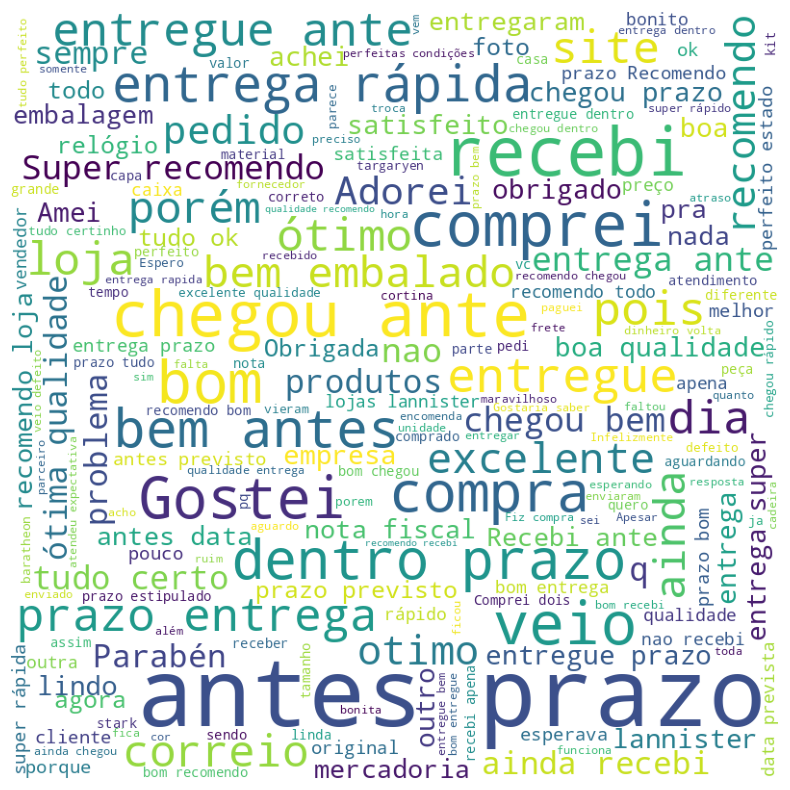

In [ ]:
# Exibir a nuvem de palavras usando o Matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Salve a imagem do gráfico em um arquivo
plt.savefig('nuvem_palavras.png')
plt.show()

# **Normalização dos Dados**

In [158]:
# Removendo NA (missing values)
filtro = tb_oficial_pedidos['order_id'] != "85f8ad45e067abd694b627859fa57453"
tb_oficial_pedidos = tb_oficial_pedidos[filtro]

In [159]:
# Variáveis Explicativas
vars_explicativas = pd.DataFrame(tb_oficial_pedidos)
vars_explicativas.drop(['order_id', 'Target'], axis=1, inplace=True)
vars_explicativas.head()

valor_total_pedido  qtde_itens  Pagto_Credito  vendedor_estado_dif  \
0           12.903333           1              1                    0   
1          141.460000           1              0                    1   
2          179.120000           3              1                    1   
3           72.200000           1              1                    1   
4           28.620000           1              1                    0   

   qtde_produtos  Valor_Total_Frete  product_name_lenght  \
0              1               8.72                 40.0   
1              1              22.76                 29.0   
2              1              19.22                 46.0   
3              1              27.20                 59.0   
4              1               8.72                 38.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       268.0                 4.0             500.0   
1                       178.0                 1.0             400.0   
2                       232.0                 1.0             420.0   
3                       468.0                 3.0             450.0   
4                       316.0                 4.0             250.0   

   product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
0               19.0                8.0              13.0              0   
1               19.0               13.0              19.0              0   
2               24.0               19.0              21.0              0   
3               30.0               10.0              20.0              0   
4               51.0               15.0              15.0              0   

   alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
0                0                        0                      1  
1                1                        0                      0  
2                0                        0                      1  
3                0                        0                      1  
4                0                        0                      1

In [160]:
# Variável Resposta
var_resposta = pd.DataFrame(tb_oficial_pedidos)
var_resposta = var_resposta[['Target']]
var_resposta.head()

Target
0       1
1       1
2       0
3       0
4       0

In [161]:
vars_explicativas.describe()

valor_total_pedido    qtde_itens  Pagto_Credito  vendedor_estado_dif  \
count        94487.000000  94487.000000   94487.000000         94487.000000   
mean           157.148991      2.930255       0.770148             0.641506   
std            214.819228      2.714795       0.420740             0.479561   
min              1.937895      0.000000       0.000000             0.000000   
25%             60.100000      1.000000       1.000000             0.000000   
50%            103.020000      2.000000       1.000000             1.000000   
75%            174.730000      4.000000       1.000000             1.000000   
max          13664.080000     24.000000       1.000000             1.000000   

       qtde_produtos  Valor_Total_Frete  product_name_lenght  \
count   94487.000000       94487.000000         94487.000000   
mean        1.038132          20.722010            48.875150   
std         0.226646          16.506051             9.937562   
min         1.000000           0.000000             5.000000   
25%         1.000000          13.440000            43.000000   
50%         1.000000          16.610000            52.000000   
75%         1.000000          22.030000            57.000000   
max         8.000000         497.420000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                94487.000000        94487.000000      94487.000000   
mean                   793.479147            2.251333       2101.188434   
std                    651.933718            1.741014       3743.839920   
min                      4.000000            1.000000          0.000000   
25%                    351.000000            1.000000        300.000000   
50%                    608.000000            2.000000        700.000000   
75%                    995.000000            3.000000       1813.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
count       94487.000000       94487.000000      94487.000000   94487.000000   
mean           30.130187          16.465343         23.048300       0.079831   
std            16.070495          13.258656         11.691941       0.271033   
min             7.000000           2.000000          6.000000       0.000000   
25%            18.000000           8.000000         15.000000       0.000000   
50%            25.000000          13.000000         20.000000       0.000000   
75%            38.000000          20.000000         30.000000       0.000000   
max           105.000000         105.000000        118.000000       1.000000   

       alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
count     94487.000000             94487.000000           94487.000000  
mean          0.517627                 0.027993               0.457100  
std           0.499692                 0.164954               0.498159  
min           0.000000                 0.000000               0.000000  
25%           0.000000                 0.000000               0.000000  
50%           1.000000                 0.000000               0.000000  
75%           1.000000                 0.000000               1.000000  
max           1.000000                 1.000000               1.000000

In [162]:
# Inicializar o normalizador
scaler = MinMaxScaler()

# Ajustar e transformar os dados
vars_explicativas_n = scaler.fit_transform(vars_explicativas)

# Criar um novo DataFrame com os dados normalizados
vars_explicativas_n = pd.DataFrame(vars_explicativas_n, columns= vars_explicativas.columns)
vars_explicativas_n.describe()

valor_total_pedido    qtde_itens  Pagto_Credito  vendedor_estado_dif  \
count        94487.000000  94487.000000   94487.000000         94487.000000   
mean             0.011361      0.122094       0.770148             0.641506   
std              0.015724      0.113116       0.420740             0.479561   
min              0.000000      0.000000       0.000000             0.000000   
25%              0.004257      0.041667       1.000000             0.000000   
50%              0.007399      0.083333       1.000000             1.000000   
75%              0.012648      0.166667       1.000000             1.000000   
max              1.000000      1.000000       1.000000             1.000000   

       qtde_produtos  Valor_Total_Frete  product_name_lenght  \
count   94487.000000       94487.000000         94487.000000   
mean        0.005447           0.041659             0.617960   
std         0.032378           0.033183             0.139966   
min         0.000000           0.000000             0.000000   
25%         0.000000           0.027019             0.535211   
50%         0.000000           0.033392             0.661972   
75%         0.000000           0.044289             0.732394   
max         1.000000           1.000000             1.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                94487.000000        94487.000000      94487.000000   
mean                     0.197964            0.065860          0.051977   
std                      0.163474            0.091632          0.092612   
min                      0.000000            0.000000          0.000000   
25%                      0.087011            0.000000          0.007421   
50%                      0.151454            0.052632          0.017316   
75%                      0.248495            0.105263          0.044848   
max                      1.000000            1.000000          1.000000   

       product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  \
count       94487.000000       94487.000000      94487.000000   94487.000000   
mean            0.236022           0.140440          0.152217       0.079831   
std             0.163985           0.128725          0.104392       0.271033   
min             0.000000           0.000000          0.000000       0.000000   
25%             0.112245           0.058252          0.080357       0.000000   
50%             0.183673           0.106796          0.125000       0.000000   
75%             0.316327           0.174757          0.214286       0.000000   
max             1.000000           1.000000          1.000000       1.000000   

       alimentos_lazer  moveis_eletrodomesticos  eletroportateis_decor  
count     94487.000000             94487.000000           94487.000000  
mean          0.517627                 0.027993               0.457100  
std           0.499692                 0.164954               0.498159  
min           0.000000                 0.000000               0.000000  
25%           0.000000                 0.000000               0.000000  
50%           1.000000                 0.000000               0.000000  
75%           1.000000                 0.000000               1.000000  
max           1.000000                 1.000000               1.000000

In [163]:
vars_explicativas_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   valor_total_pedido          94487 non-null  float64
 1   qtde_itens                  94487 non-null  float64
 2   Pagto_Credito               94487 non-null  float64
 3   vendedor_estado_dif         94487 non-null  float64
 4   qtde_produtos               94487 non-null  float64
 5   Valor_Total_Frete           94487 non-null  float64
 6   product_name_lenght         94487 non-null  float64
 7   product_description_lenght  94487 non-null  float64
 8   product_photos_qty          94487 non-null  float64
 9   product_weight_g            94487 non-null  float64
 10  product_length_cm           94487 non-null  float64
 11  product_height_cm           94487 non-null  float64
 12  product_width_cm            94487 non-null  float64
 13  Flag_Atrasado               944

In [164]:
# Ajustar e transformar os dados
var_resposta_n = scaler.fit_transform(var_resposta)

# Criar um novo DataFrame com os dados normalizados
var_resposta_n = pd.DataFrame(var_resposta_n, columns= var_resposta.columns)
var_resposta_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  94487 non-null  float64
dtypes: float64(1)
memory usage: 738.3 KB


In [165]:
# Remover a variável de COMPRIMENTO DO NOME DO PRODUTO
vars_explicativas_n = vars_explicativas_n.drop(columns=['product_name_lenght'])
vars_explicativas_n.describe()

valor_total_pedido    qtde_itens  Pagto_Credito  vendedor_estado_dif  \
count        94487.000000  94487.000000   94487.000000         94487.000000   
mean             0.011361      0.122094       0.770148             0.641506   
std              0.015724      0.113116       0.420740             0.479561   
min              0.000000      0.000000       0.000000             0.000000   
25%              0.004257      0.041667       1.000000             0.000000   
50%              0.007399      0.083333       1.000000             1.000000   
75%              0.012648      0.166667       1.000000             1.000000   
max              1.000000      1.000000       1.000000             1.000000   

       qtde_produtos  Valor_Total_Frete  product_description_lenght  \
count   94487.000000       94487.000000                94487.000000   
mean        0.005447           0.041659                    0.197964   
std         0.032378           0.033183                    0.163474   
min         0.000000           0.000000                    0.000000   
25%         0.000000           0.027019                    0.087011   
50%         0.000000           0.033392                    0.151454   
75%         0.000000           0.044289                    0.248495   
max         1.000000           1.000000                    1.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count        94487.000000      94487.000000       94487.000000   
mean             0.065860          0.051977           0.236022   
std              0.091632          0.092612           0.163985   
min              0.000000          0.000000           0.000000   
25%              0.000000          0.007421           0.112245   
50%              0.052632          0.017316           0.183673   
75%              0.105263          0.044848           0.316327   
max              1.000000          1.000000           1.000000   

       product_height_cm  product_width_cm  Flag_Atrasado  alimentos_lazer  \
count       94487.000000      94487.000000   94487.000000     94487.000000   
mean            0.140440          0.152217       0.079831         0.517627   
std             0.128725          0.104392       0.271033         0.499692   
min             0.000000          0.000000       0.000000         0.000000   
25%             0.058252          0.080357       0.000000         0.000000   
50%             0.106796          0.125000       0.000000         1.000000   
75%             0.174757          0.214286       0.000000         1.000000   
max             1.000000          1.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

# **Modelos com Dados Normalizados!!!**

In [166]:
# Renomeando as colunas da base
vars_explicativas_n.rename(columns={'Pagto_Credito': 'pagto_credito',
                                    'Valor_Total_Frete': 'valor_frete',
                                    'product_description_lenght' : 'compr_descr_prod',
                                    'product_photos_qty': 'qtde_fotos',
                                    'product_weight_g': 'peso_produto',
                                    'product_length_cm': 'compr_produto',
                                    'product_height_cm': 'altura_produto',
                                    'product_width_cm': 'largura_produto',
                                    'Flag_Atrasado': 'flag_atrasado'
}, inplace=True)

In [167]:
X_train,X_test,y_train,y_test = train_test_split(vars_explicativas_n, var_resposta_n, test_size=0.3, random_state = 450)

## Stepwise

In [ ]:
# Número de features que você deseja selecionar
num_features_to_select = 10

# Crie o modelo de regressão
model = LogisticRegression()

# Use RFE (Recursive Feature Elimination) para realizar o Stepwise
rfe = RFE(model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Lista de variáveis selecionadas
selected_features = list(np.array(X_train.columns)[rfe.support_])

#print("Variáveis selecionadas:", selected_features)

#Variáveis selecionadas - 10 variáveis:
 #['vendedor_estado_dif', 'qtde_produtos', 'Valor_Total_Frete', 'product_weight_g',
 #'product_height_cm', 'product_width_cm', 'Flag_Atrasado', 'alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/valida

In [168]:
explicativas_finais = vars_explicativas_n[['vendedor_estado_dif', 'qtde_produtos', 'valor_frete', 'peso_produto','altura_produto', 'largura_produto', 'flag_atrasado','alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor']]
explicativas_finais.describe()

vendedor_estado_dif  qtde_produtos   valor_frete  peso_produto  \
count         94487.000000   94487.000000  94487.000000  94487.000000   
mean              0.641506       0.005447      0.041659      0.051977   
std               0.479561       0.032378      0.033183      0.092612   
min               0.000000       0.000000      0.000000      0.000000   
25%               0.000000       0.000000      0.027019      0.007421   
50%               1.000000       0.000000      0.033392      0.017316   
75%               1.000000       0.000000      0.044289      0.044848   
max               1.000000       1.000000      1.000000      1.000000   

       altura_produto  largura_produto  flag_atrasado  alimentos_lazer  \
count    94487.000000     94487.000000   94487.000000     94487.000000   
mean         0.140440         0.152217       0.079831         0.517627   
std          0.128725         0.104392       0.271033         0.499692   
min          0.000000         0.000000       0.000000         0.000000   
25%          0.058252         0.080357       0.000000         0.000000   
50%          0.106796         0.125000       0.000000         1.000000   
75%          0.174757         0.214286       0.000000         1.000000   
max          1.000000         1.000000       1.000000         1.000000   

       moveis_eletrodomesticos  eletroportateis_decor  
count             94487.000000           94487.000000  
mean                  0.027993               0.457100  
std                   0.164954               0.498159  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                   0.000000               1.000000  
max                   1.000000               1.000000

In [169]:
col_explicativas = explicativas_finais.columns.tolist()
col_target = var_resposta.columns.tolist()

In [170]:
kfold = KFold(n_splits=10)

In [171]:
X_train,X_test,y_train,y_test = train_test_split(explicativas_finais, var_resposta_n, test_size=0.3, random_state = 450)

In [ ]:
explicativas_finais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vendedor_estado_dif      94487 non-null  float64
 1   qtde_produtos            94487 non-null  float64
 2   valor_frete              94487 non-null  float64
 3   peso_produto             94487 non-null  float64
 4   altura_produto           94487 non-null  float64
 5   largura_produto          94487 non-null  float64
 6   flag_atrasado            94487 non-null  float64
 7   alimentos_lazer          94487 non-null  float64
 8   moveis_eletrodomesticos  94487 non-null  float64
 9   eletroportateis_decor    94487 non-null  float64
dtypes: float64(10)
memory usage: 7.2 MB


In [172]:
var_resposta_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  94487 non-null  float64
dtypes: float64(1)
memory usage: 738.3 KB


## Regressão Logística

In [173]:
# Sem Cross-Validation
logistic_regression1 = LogisticRegression()
logistic_regression1.fit(X_train, y_train)
y_pred_logreg1 = logistic_regression1.predict(X_test)
print('Acurácia da Regressão Logística é:', metrics.accuracy_score(y_test, y_pred_logreg1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acurácia da Regressão Logística é: 0.6438776590115356


In [174]:
# Com Cross-Validation
logistic_regression2 = LogisticRegression()
scores_lg2 = cross_val_score(logistic_regression2, X_train, y_train, cv=kfold, scoring='accuracy')

mean_lg2 = scores_lg2.mean()
std_lg2 = scores_lg2.std()

print(f"Mean: {mean_lg2}")
print(f"Std : {std_lg2}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

Mean: 0.6400362866646507
Std : 0.00692094079270394


In [ ]:
# FORMA 2: Treinando um modelo
X = sm.add_constant(explicativas_finais)

logistic_regression3 = sm.GLM(var_resposta_n, X, family = sm.families.Binomial())
result_logreg3 = logistic_regression3.fit()
print(result_logreg3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                94487
Model:                            GLM   Df Residuals:                    94476
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61174.
Date:                Thu, 14 Sep 2023   Deviance:                   1.2235e+05
Time:                        23:13:40   Pearson chi2:                 9.46e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05571
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Previsões e Acurácia
y_pred_reglog3 = result_logreg3.predict(X)

# Arredonde as previsões para 0 ou 1, dependendo do limiar de decisão
y_pred_binary_reglog3 = (y_pred_reglog3 >= 0.5).astype(int)

# Avalie a acurácia comparando as previsões com os rótulos verdadeiros
accuracy_reglog3 = accuracy_score(var_resposta_n, y_pred_binary_reglog3)
print(f"Acurácia: {accuracy_reglog3}")

Acurácia: 0.6413157365563517


In [ ]:
# Remover as variáveis com P-VALOR ALTO
X2 = X.drop(columns=['valor_frete', 'largura_produto'])

logistic_regression4 = sm.GLM(var_resposta_n, X2, family = sm.families.Binomial())
result_logreg4 = logistic_regression4.fit()
print(result_logreg4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                94487
Model:                            GLM   Df Residuals:                    94478
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61175.
Date:                Thu, 14 Sep 2023   Deviance:                   1.2235e+05
Time:                        23:13:40   Pearson chi2:                 9.45e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05568
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Previsões e Acurácia
y_pred_reglog4 = result_logreg4.predict(X2)

# Arredonde as previsões para 0 ou 1, dependendo do limiar de decisão
y_pred_binary_reglog4 = (y_pred_reglog4 >= 0.5).astype(int)

# Avalie a acurácia comparando as previsões com os rótulos verdadeiros
accuracy_reglog4 = accuracy_score(var_resposta_n, y_pred_binary_reglog4)
print(f"Acurácia: {accuracy_reglog4}")

Acurácia: 0.6412734026903172


In [175]:
explicativas_finais2 = explicativas_finais.drop(columns=['valor_frete', 'largura_produto'])

In [ ]:
explicativas_finais2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vendedor_estado_dif      94487 non-null  float64
 1   qtde_produtos            94487 non-null  float64
 2   peso_produto             94487 non-null  float64
 3   altura_produto           94487 non-null  float64
 4   flag_atrasado            94487 non-null  float64
 5   alimentos_lazer          94487 non-null  float64
 6   moveis_eletrodomesticos  94487 non-null  float64
 7   eletroportateis_decor    94487 non-null  float64
dtypes: float64(8)
memory usage: 5.8 MB


In [ ]:
var_resposta_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94487 entries, 0 to 94486
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  94487 non-null  float64
dtypes: float64(1)
memory usage: 738.3 KB


In [176]:
X_train,X_test,y_train,y_test = train_test_split(explicativas_finais2, var_resposta_n, test_size=0.3, random_state = 450)

In [177]:
# Sem Cross-Validation
logistic_regression6 = LogisticRegression()
logistic_regression6.fit(X_train, y_train)
y_pred_logreg6 = logistic_regression6.predict(X_test)
accuracy_logreg6 = metrics.accuracy_score(y_test, y_pred_logreg6)

y_pred2_logreg6 = logistic_regression6.predict(X_train)
accuracy2_logreg6 = metrics.accuracy_score(y_train, y_pred2_logreg6)

print('Acurácia da Regressão Logística (Teste) é:', metrics.accuracy_score(y_test, y_pred_logreg6))
print('Acurácia da Regressão Logística (Treino) é:', metrics.accuracy_score(y_train, y_pred2_logreg6))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acurácia da Regressão Logística (Teste) é: 0.6440540445197023
Acurácia da Regressão Logística (Treino) é: 0.6399606894466283


In [179]:
# Com Cross-Validation
logistic_regression5 = LogisticRegression()
scores_lg5 = cross_val_score(logistic_regression5, X_train, y_train, cv=kfold, scoring='accuracy')

mean_lg5 = scores_lg5.mean()
std_lg5 = scores_lg5.std()

print(f"Mean: {mean_lg5}")
print(f"Std : {std_lg5}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

Mean: 0.639945570003024
Std : 0.006824281086733069


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [180]:
col_explicativas = explicativas_finais2.columns.tolist()
col_target = var_resposta_n.columns.tolist()

In [181]:
col_explicativas2 = X_train.columns.tolist()
col_target2 = y_train.columns.tolist()

## Decision Tree

In [182]:
X_train,X_test,y_train,y_test = train_test_split(explicativas_finais2, var_resposta_n, test_size=0.3, random_state = 450)

In [183]:
# SEM Cross Validation
model_decisiontree1 = DecisionTreeClassifier(max_depth = 3, random_state=420)
model_decisiontree1.fit(X_train, y_train)
y_pred_decisiontree1 = model_decisiontree1.predict(X_test)
accuracy_decisiontree1 = accuracy_score(y_test, y_pred_decisiontree1)
print(f"Acurácia do modelo: {accuracy_decisiontree1:.6f}")


Acurácia do modelo: 0.643454


In [184]:
model_decisiontree2 = DecisionTreeClassifier(max_depth = 3, random_state=415)
scores_dt2 = cross_val_score(model_decisiontree2, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_dt2 = scores_dt2.mean()
std_dt2 = scores_dt2.std()

print(f"Mean: {mean_dt2}")
print(f"Std: {std_dt2}")

Mean: 0.6394315089204718
Std: 0.00684455057776129


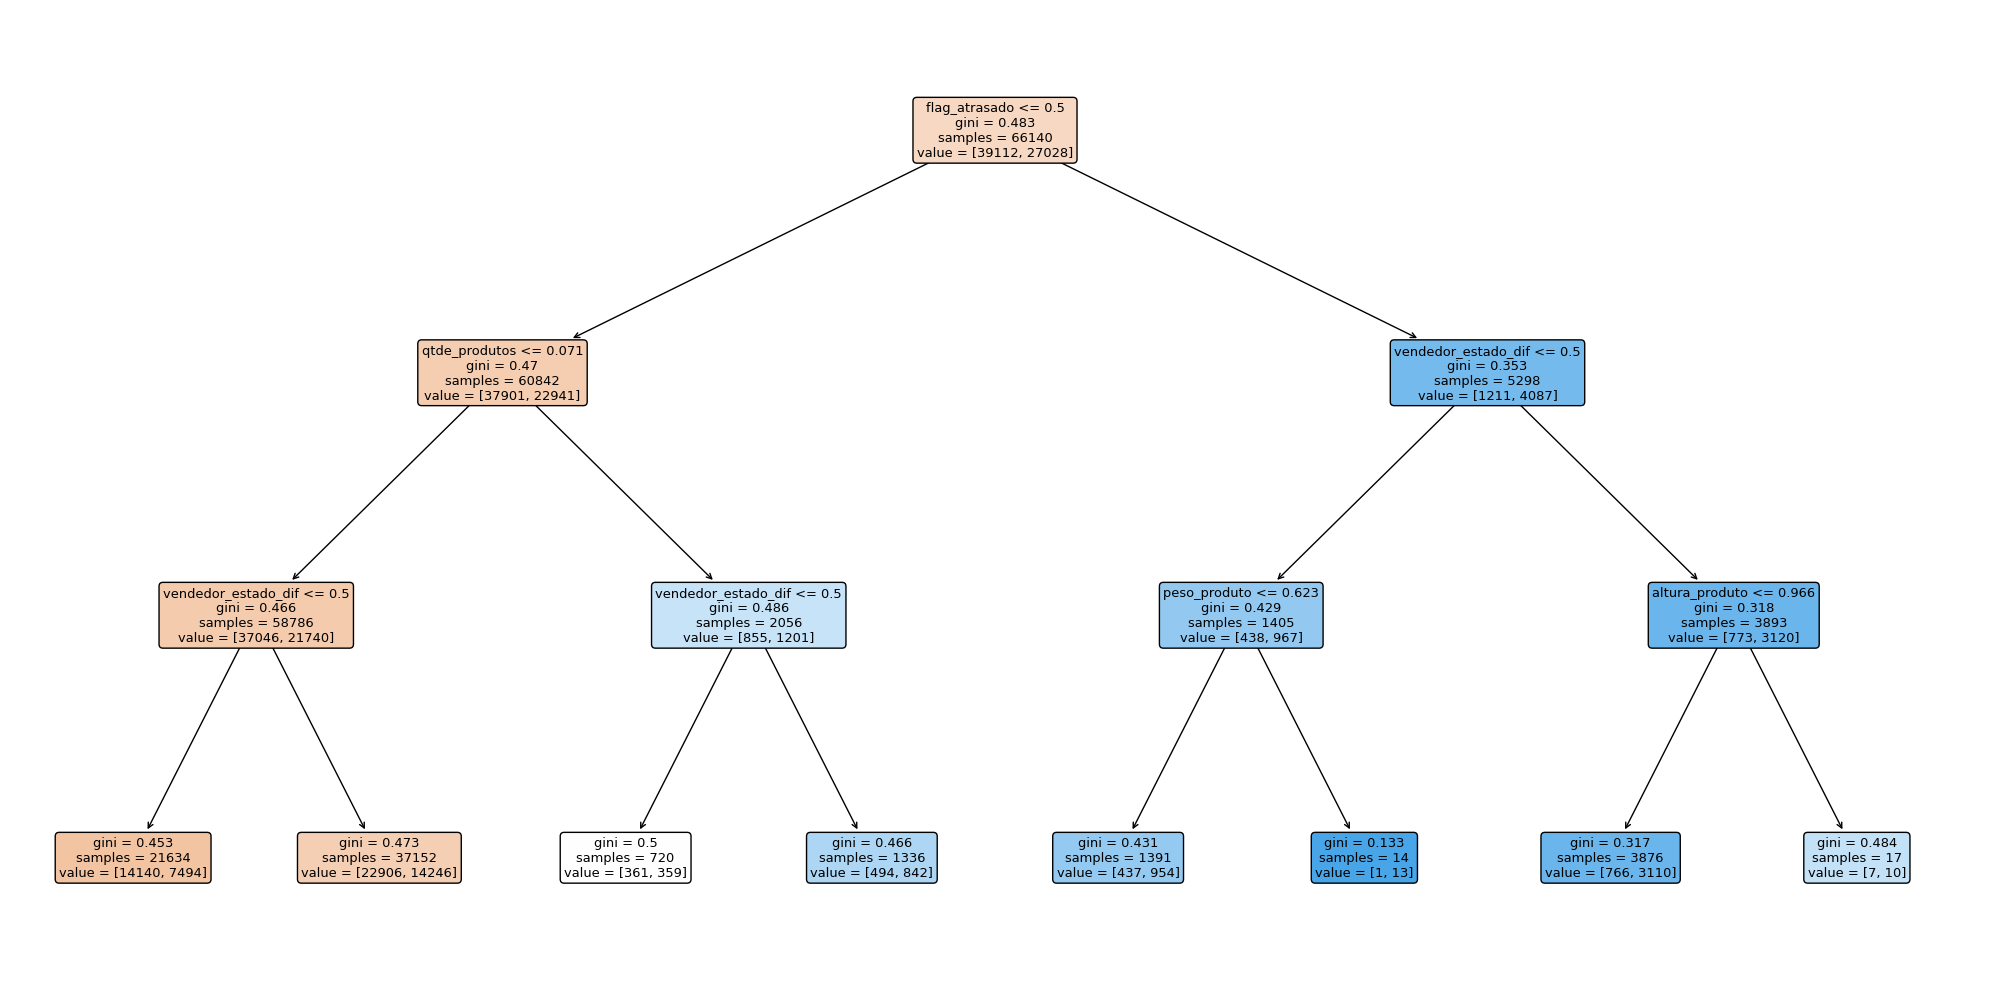

In [185]:
plt.figure(figsize=(20,10))
plot_tree(model_decisiontree1,
          feature_names= col_explicativas2,
          #class_names= col_target2,
          filled=True, rounded=True)

# Salve a imagem do gráfico em um arquivo
plt.savefig('arvore_decisao.png')

plt.show()

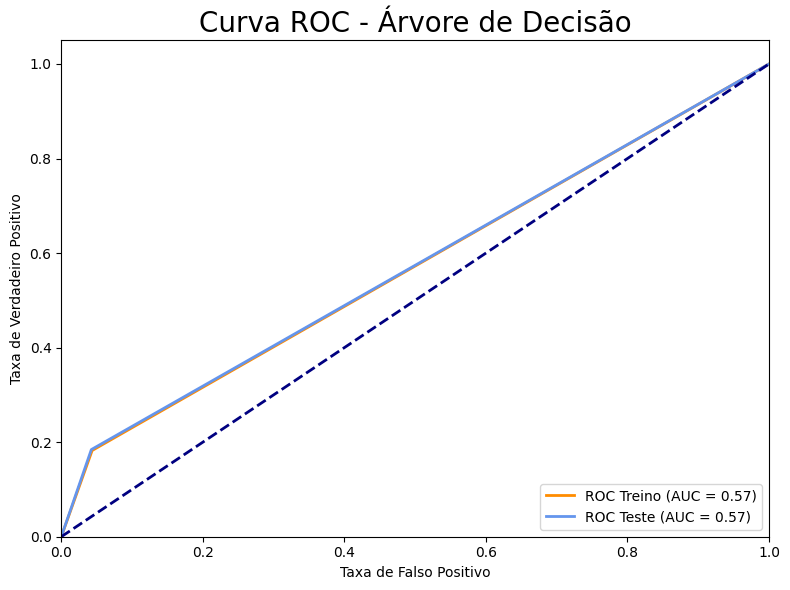

In [186]:
from sklearn.metrics import roc_curve, auc

y_pred2_decisiontree1 = model_decisiontree1.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred2_decisiontree1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_decisiontree1)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_decisiontree.png')
plt.show()

## Random Forest

In [187]:
X_train,X_test,y_train,y_test = train_test_split(explicativas_finais2, var_resposta_n, test_size=0.3, random_state = 450)

In [188]:
randomforest1 = RandomForestClassifier(n_estimators=100, random_state=430)  # n_estimators é o número de árvores no conjunto
randomforest1.fit(X_train, y_train)

Y_pred_RF1 = randomforest1.predict(X_test)
accuracy_RF1 = accuracy_score(y_test, Y_pred_RF1)
print(f"Acurácia de teste do modelo: {accuracy_RF1:.6f}")

<ipython-input-188-0f5816843c88>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Acurácia de teste do modelo: 0.606978


In [189]:
Y_pred2_RF1 = randomforest1.predict(X_train)
accuracy2_RF1 = accuracy_score(y_train, Y_pred2_RF1)
print(f"Acurácia de teste do modelo: {accuracy2_RF1:.6f}")

Acurácia de teste do modelo: 0.730027


In [190]:
randomforest2 = RandomForestClassifier(n_estimators=100, random_state=430)  # n_estimators é o número de árvores no conjunto
scores_rf2 = cross_val_score(randomforest2, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_rf2 = scores_rf2.mean()
std_rf2 = scores_rf2.std()

print(f"Mean: {mean_rf2}")
print(f"Std: {std_rf2}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packa

Mean: 0.6026005442999696
Std: 0.0056313382052282646


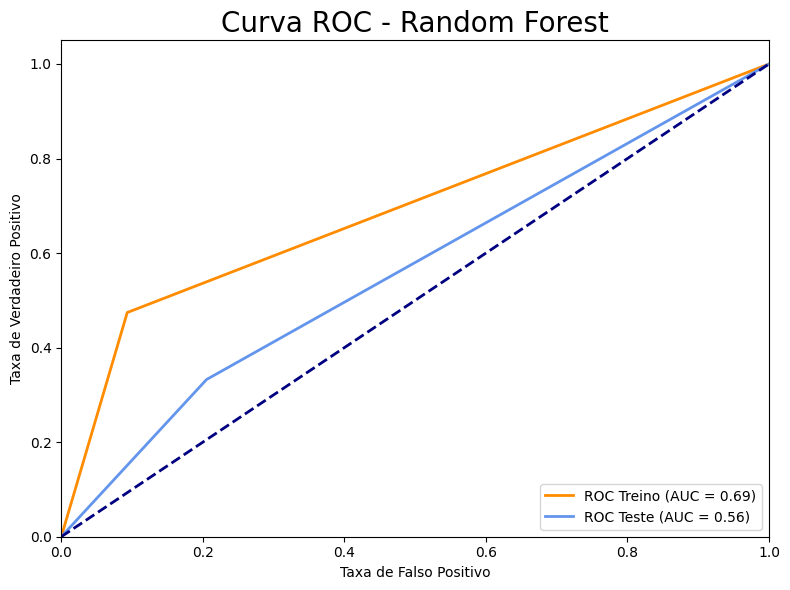

In [191]:
from sklearn.metrics import roc_curve, auc

Y_pred2_RF1 = randomforest1.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, Y_pred2_RF1)
fpr_test, tpr_test, _ = roc_curve(y_test, Y_pred_RF1)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_randomforest.png')
plt.show()

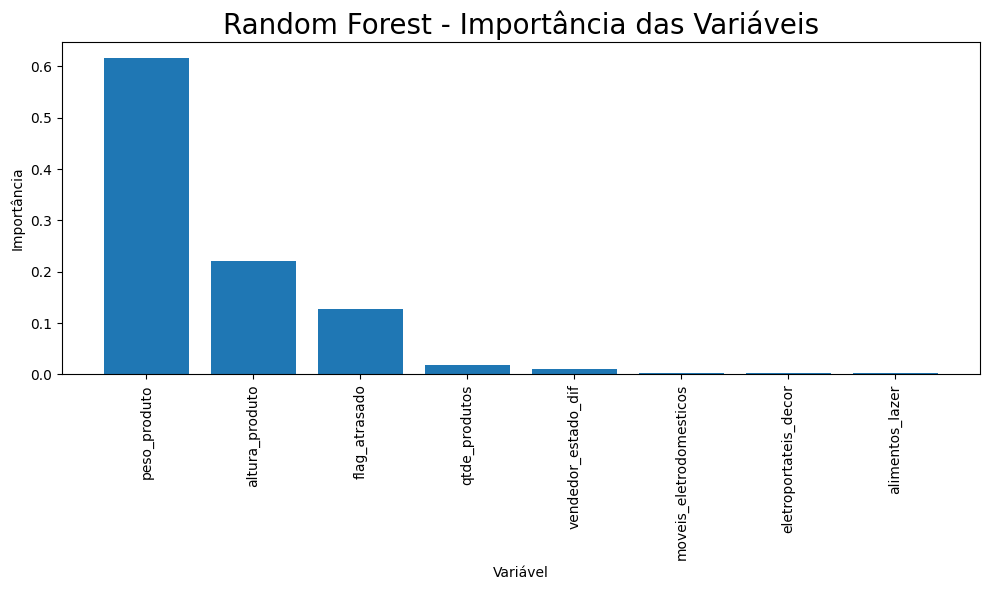

In [192]:
feature_importance = randomforest1.feature_importances_
feature_names = explicativas_finais2.columns

# Ordene as importâncias das variáveis em ordem decrescente
sorted_idx = feature_importance.argsort()[::-1]
feature_importance_sorted = feature_importance[sorted_idx]
feature_names_sorted = feature_names[sorted_idx]

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance_sorted)
plt.xlabel('Variável')
plt.ylabel('Importância')
plt.title('Random Forest - Importância das Variáveis')
plt.xticks(range(len(feature_importance)), feature_names_sorted, rotation=90)
plt.tight_layout()
plt.savefig('feature_import_randomforest.png')
plt.show()

## Bagging

In [193]:
base_model = DecisionTreeClassifier()
bagging1 = BaggingClassifier(base_model, n_estimators=100, random_state=415)
bagging1.fit(X_train, y_train)

Y_pred_BAG1 = bagging1.predict(X_test)
accuracy_BAG1 = accuracy_score(y_test, Y_pred_BAG1)
print(f"Acurácia do modelo: {accuracy_BAG1:.6f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acurácia do modelo: 0.606519


In [194]:
bagging2 = BaggingClassifier(base_model, n_estimators=100, random_state=415)
scores_bagg2 = cross_val_score(bagging2, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_bagg2 = scores_bagg2.mean()
std_bagg2= scores_bagg2.std()

print(f"Mean: {mean_bagg2}")
print(f"Std: {std_bagg2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802

Mean: 0.6015119443604475
Std: 0.006628871716913106


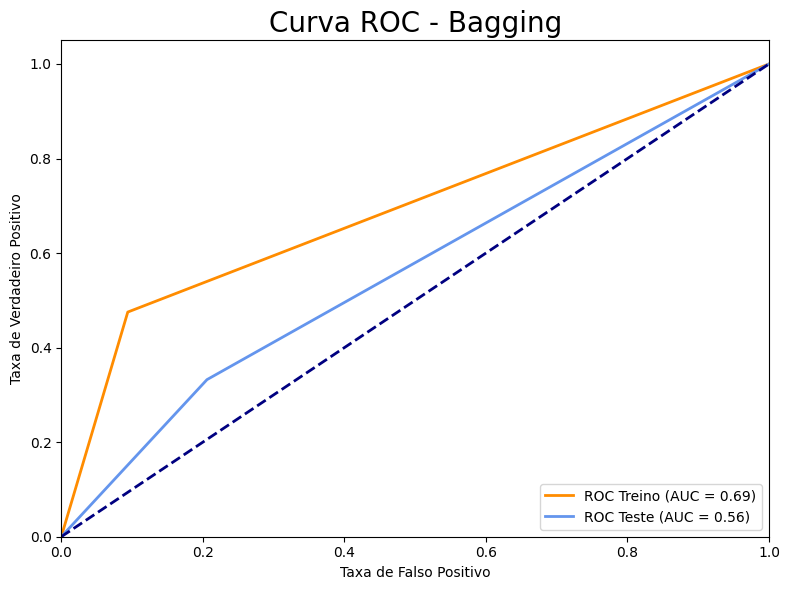

In [195]:
from sklearn.metrics import roc_curve, auc

Y_pred2_BAG1 = bagging1.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, Y_pred2_BAG1)
fpr_test, tpr_test, _ = roc_curve(y_test, Y_pred_BAG1)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Bagging')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_bagging.png')
plt.show()

## Boosting

In [196]:
base_model = DecisionTreeClassifier(max_depth=3)
boosting1 = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)
boosting1.fit(X_train, y_train)

Y_pred_BOST1 = boosting1.predict(X_test)
accuracy_BOST1 = accuracy_score(y_test, Y_pred_BOST1)
print(f"Acurácia do modelo: {accuracy_BOST1:.6f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acurácia do modelo: 0.641620


In [197]:
boosting2 = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)
scores_boost2 = cross_val_score(boosting2, X_train, y_train, cv=kfold, scoring='accuracy')

# Calcule a média e o desvio padrão das pontuações do erro quadrático médio
mean_boost2 = scores_boost2.mean()
std_boost2 = scores_boost2.std()

print(f"Mean: {mean_boost2}")
print(f"Std: {std_boost2}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

Mean: 0.6356818869065618
Std: 0.007409206167257435


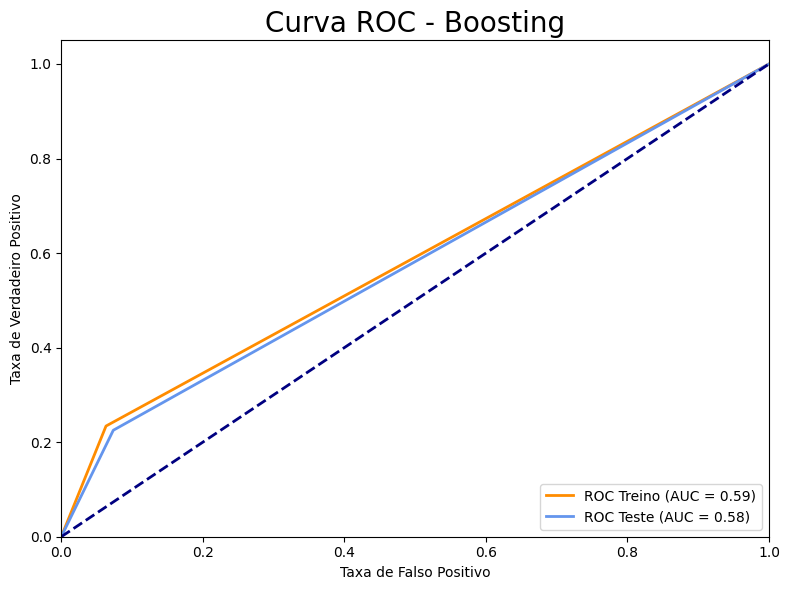

In [198]:
from sklearn.metrics import roc_curve, auc

Y_pred2_BOST1 = boosting1.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, Y_pred2_BOST1)
fpr_test, tpr_test, _ = roc_curve(y_test, Y_pred_BOST1)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Boosting')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_boosting.png')
plt.show()

## XGBoosting

In [199]:
from xgboost import XGBClassifier
xgboost1 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgboost1.fit(X_train, y_train)

# Supondo que você já tenha treinado o modelo e feito previsões nos dados de teste
y_pred_xgboost1 = xgboost1.predict(X_test)
acc_xgboost1 = accuracy_score(y_test, y_pred_xgboost1)

# Exiba a acurácia
print(f'Acurácia: {acc_xgboost1:.6f}')

Acurácia: 0.644266


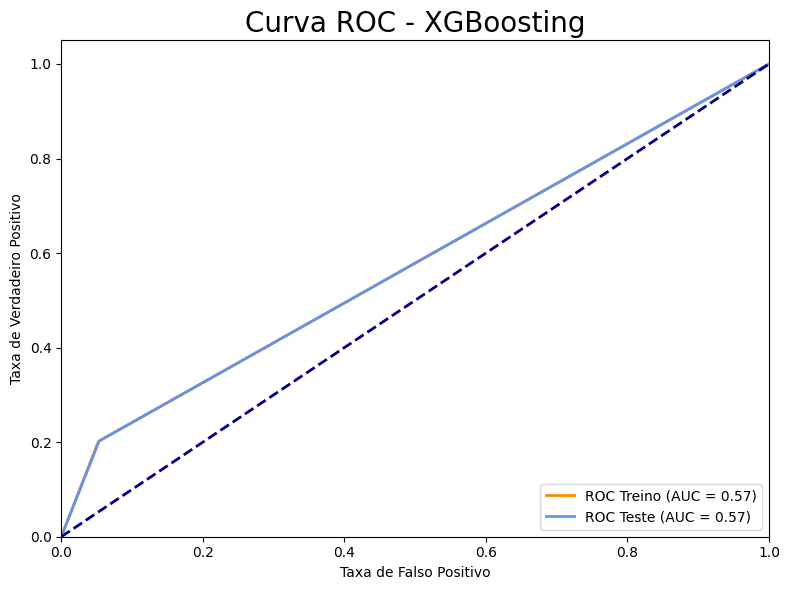

In [200]:
from sklearn.metrics import roc_curve, auc

y_pred2_xgboost1 = xgboost1.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred2_xgboost1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_xgboost1)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - XGBoosting')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_xgboosting.png')
plt.show()

## Comparação Treino e Teste


In [203]:
#Regressão Logística
y_logreg_predtrain = logistic_regression6.predict(X_train)
y_logreg_predtest = logistic_regression6.predict(X_test)

actrain_reglog = accuracy_score(y_train, y_logreg_predtrain)
actest_reglog = accuracy_score(y_test, y_logreg_predtest)

print('Acurácia da Regressão Logística - Treino é:', actrain_reglog)
print('Acurácia da Regressão Logística - Teste é:', actest_reglog)

Acurácia da Regressão Logística - Treino é: 0.6399606894466283
Acurácia da Regressão Logística - Teste é: 0.6440540445197023


In [205]:
# Árvore de Decisão
y_dectree_predtrain = model_decisiontree1.predict(X_train)
y_dectree_predtest = model_decisiontree1.predict(X_test)

actrain_dectree = accuracy_score(y_train, y_dectree_predtrain)
actest_dectree = accuracy_score(y_test, y_dectree_predtest)

print('Acurácia da Árvore de Decisão - Treino é:', actrain_dectree)
print('Acurácia da Árvore de Decisão- Teste é:', actest_dectree)

Acurácia da Árvore de Decisão - Treino é: 0.6400967644390686
Acurácia da Árvore de Decisão- Teste é: 0.6434543337919356


In [206]:
# Random Forest
y_randforest_predtrain = randomforest1.predict(X_train)
y_randforest_predtest = randomforest1.predict(X_test)

actrain_randforest = accuracy_score(y_train, y_randforest_predtrain)
actest_randforest = accuracy_score(y_test, y_randforest_predtest)

print('Acurácia da Random Forest - Treino é:', actrain_randforest)
print('Acurácia da Random Forest- Teste é:', actest_randforest)

Acurácia da Random Forest - Treino é: 0.7300272149984881
Acurácia da Random Forest- Teste é: 0.6069778107030727


In [207]:
# Bagging
y_bagg_predtrain = bagging1.predict(X_train)
y_bagg_predtest = bagging1.predict(X_test)

actrain_bagg = accuracy_score(y_train, y_bagg_predtrain)
actest_bagg = accuracy_score(y_test, y_bagg_predtest)

print('Acurácia da Bagging - Treino é:', actrain_bagg)
print('Acurácia da Bagging - Teste é:', actest_bagg)

Acurácia da Bagging - Treino é: 0.7299818566676747
Acurácia da Bagging - Teste é: 0.6065192083818394


In [208]:
# Boosting
y_boost_predtrain = boosting1.predict(X_train)
y_boost_predtest = boosting1.predict(X_test)

actrain_boost = accuracy_score(y_train, y_boost_predtrain)
actest_boost = accuracy_score(y_test, y_boost_predtest)

print('Acurácia da Bagging - Treino é:', actrain_boost)
print('Acurácia da Bagging - Teste é:', actest_boost)

Acurácia da Bagging - Treino é: 0.6496371333534926
Acurácia da Bagging - Teste é: 0.6416199245070026


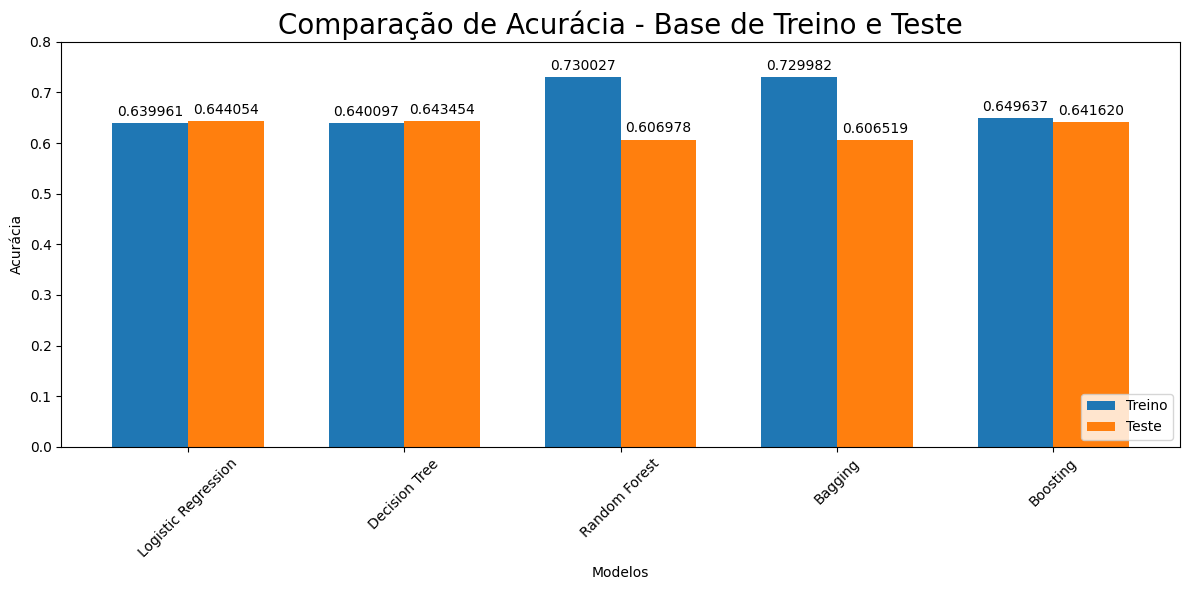

In [219]:
# Inicialize listas para armazenar as acurácias
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies_TRAIN = [actrain_reglog, actrain_dectree, actrain_randforest, actrain_bagg, actrain_boost]
accuracies_TEST = [actest_reglog, actest_dectree, actest_randforest, actest_bagg , actest_boost]


# Crie um gráfico de barras para comparar as acurácias
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracies_TRAIN, width, label='Treino')
bars2 = ax.bar(x + width/2, accuracies_TEST, width, label='Teste')

ax.set_ylim(0, 0.8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
ax.set_title('Comparação de Acurácia - Base de Treino e Teste')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend(loc='lower right')

# Anote os valores das acurácias acima das barras
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.savefig('comparacao_train_test.png')
plt.show()

## Comparação: Com e Sem Cross Validation


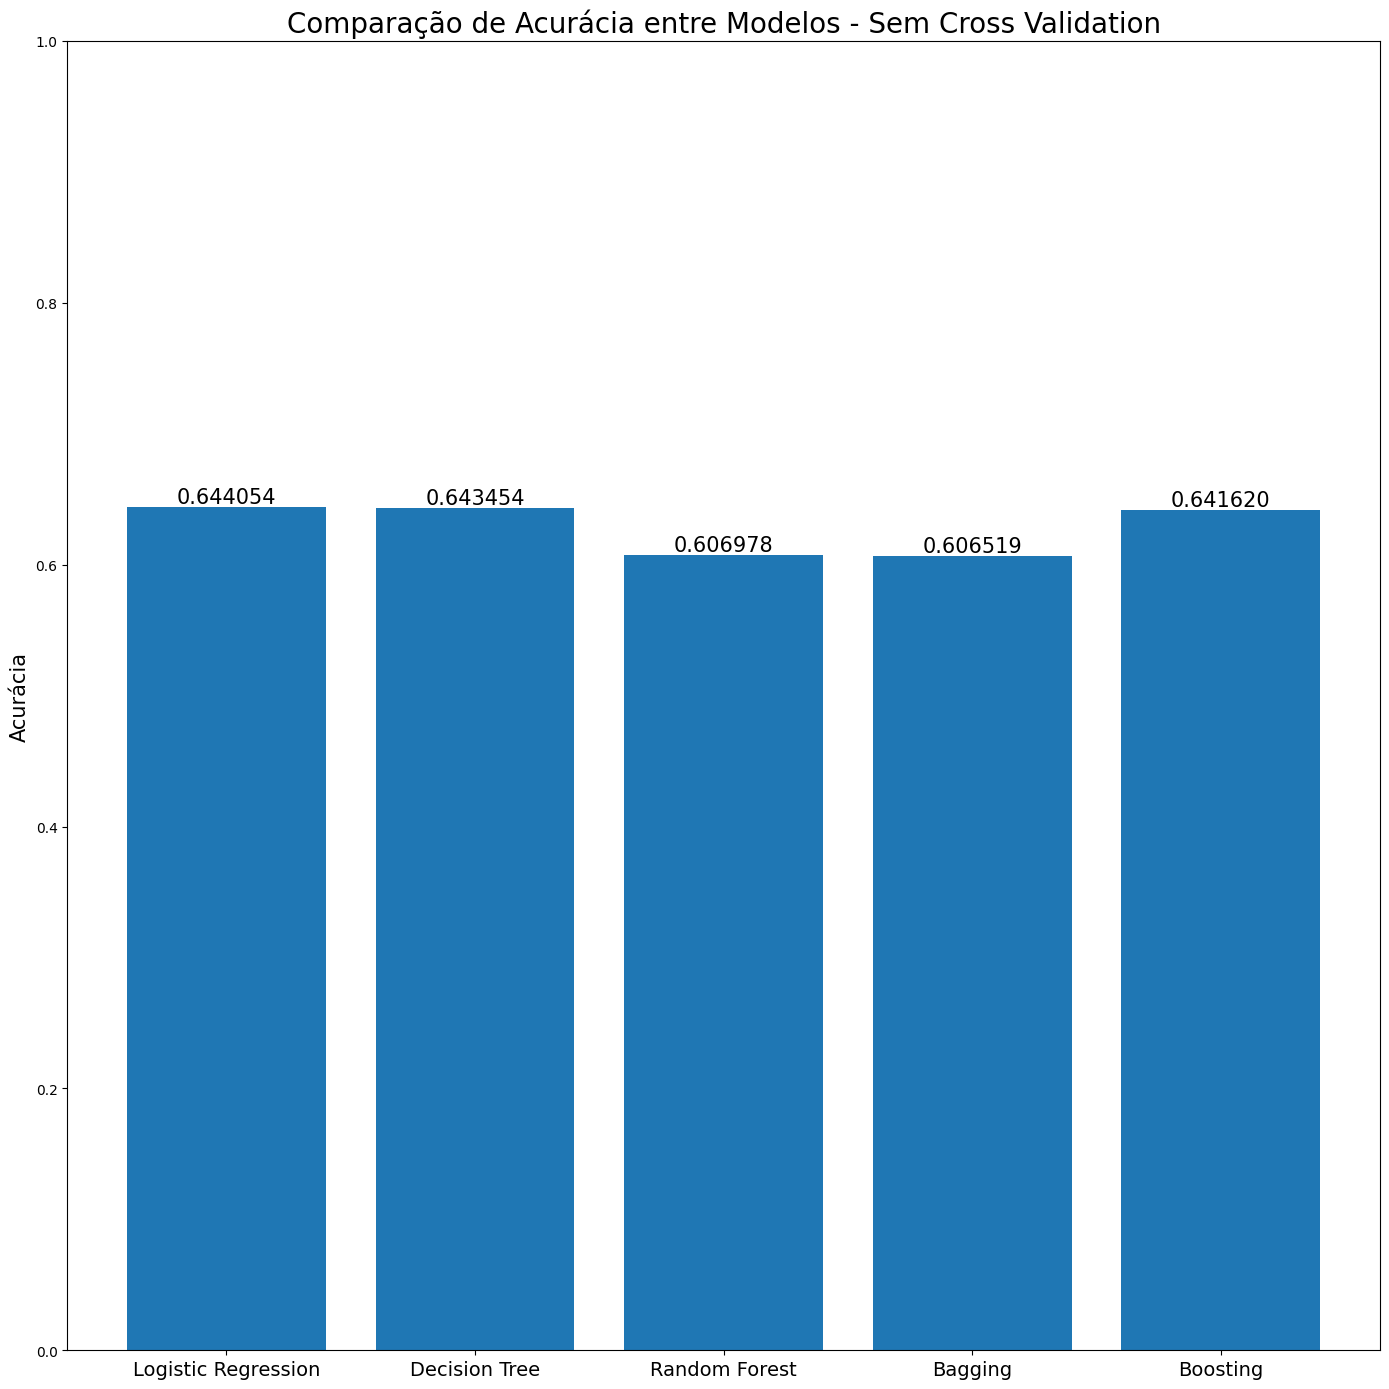

In [209]:
#  SEM CROSS VALIDATION -> Plotar um gráfico comparativo
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies_semCV = [accuracy_logreg6, accuracy_decisiontree1, accuracy_RF1, accuracy_BAG1, accuracy_BOST1 ]

plt.bar(labels, accuracies_semCV)
plt.ylim(0, 1)
plt.ylabel('Acurácia', fontsize=15)
plt.title('Comparação de Acurácia entre Modelos - Sem Cross Validation', fontsize=20)
# Aumente o tamanho da fonte do eixo X
plt.tick_params(axis='x', labelsize=14)

# Adicione os valores da acurácia nas barras
for i, accuracy in enumerate(accuracies_semCV):
    plt.text(i, accuracy, f'{accuracy:.6f}', ha='center', va='bottom', fontsize=15)

# Salve a imagem do gráfico em um arquivo
plt.savefig('comparacao_modelos_semCV.png')

# Exiba o gráfico
plt.show()

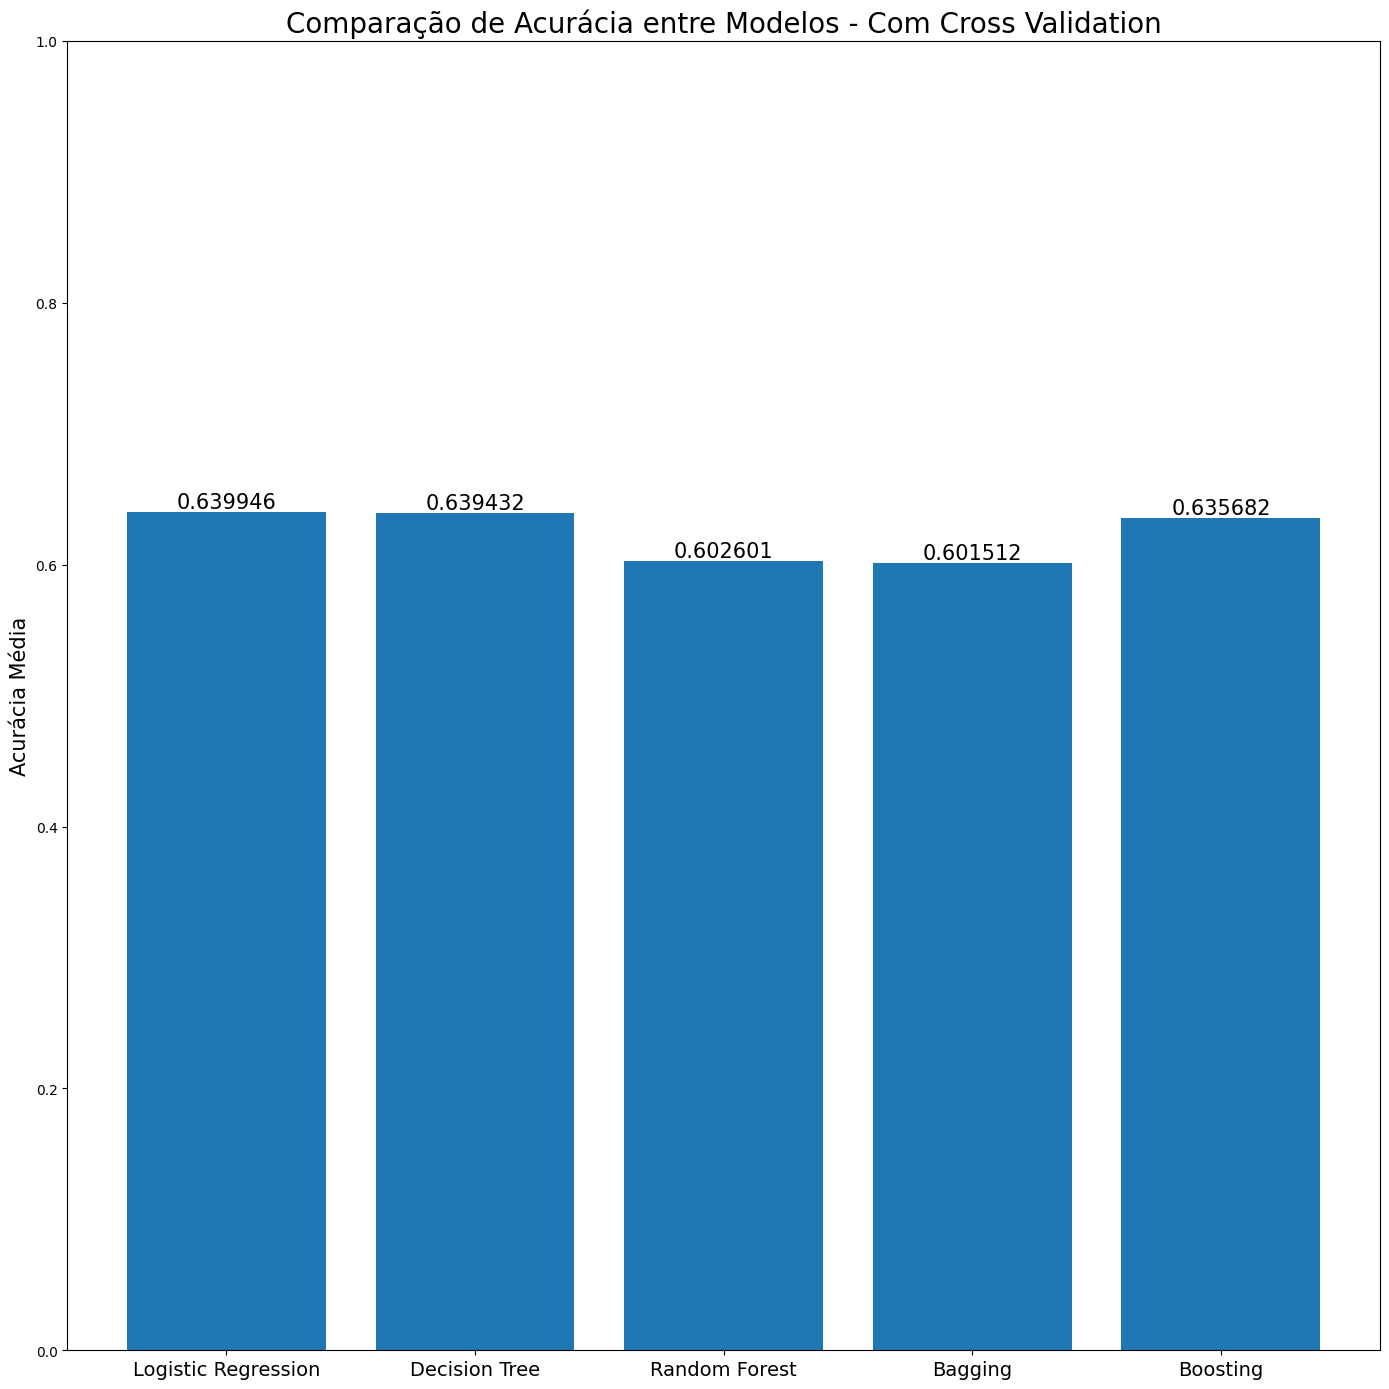

In [210]:
#  COM CROSS VALIDATION -> Plotar um gráfico comparativo
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies_comCV = [mean_lg5, mean_dt2, mean_rf2, mean_bagg2, mean_boost2 ]

plt.bar(labels, accuracies_comCV)
plt.ylim(0, 1)
plt.ylabel('Acurácia Média', fontsize=15)
plt.title('Comparação de Acurácia entre Modelos - Com Cross Validation', fontsize=20)
# Aumente o tamanho da fonte do eixo X
plt.tick_params(axis='x', labelsize=14)

# Adicione os valores da acurácia nas barras
for i, accuracy in enumerate(accuracies_comCV):
    plt.text(i, accuracy, f'{accuracy:.6f}', ha='center', va='bottom', fontsize=15)

# Salve a imagem do gráfico em um arquivo
plt.savefig('comparacao_modelos_comCV.png')

# Exiba o gráfico
plt.show()

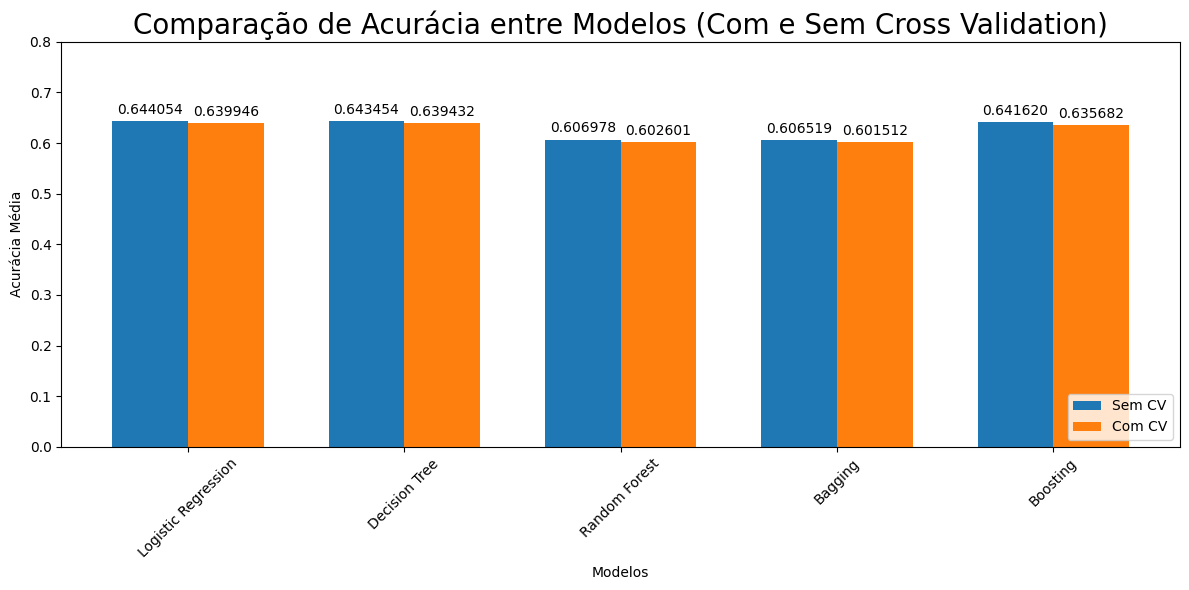

In [216]:
# Inicialize listas para armazenar as acurácias
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies_semCV = [accuracy_logreg6, accuracy_decisiontree1, accuracy_RF1, accuracy_BAG1, accuracy_BOST1 ]
accuracies_comCV = [mean_lg5, mean_dt2, mean_rf2, mean_bagg2, mean_boost2 ]


# Crie um gráfico de barras para comparar as acurácias
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracies_semCV, width, label='Sem CV')
bars2 = ax.bar(x + width/2, accuracies_comCV, width, label='Com CV')

ax.set_ylim(0, 0.8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia Média')
ax.set_title('Comparação de Acurácia entre Modelos (Com e Sem Cross Validation)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend(loc='lower right')

# Anote os valores das acurácias acima das barras
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.savefig('comparacao_modelos_totais.png')
plt.show()

## Métricas da Regressão Logística


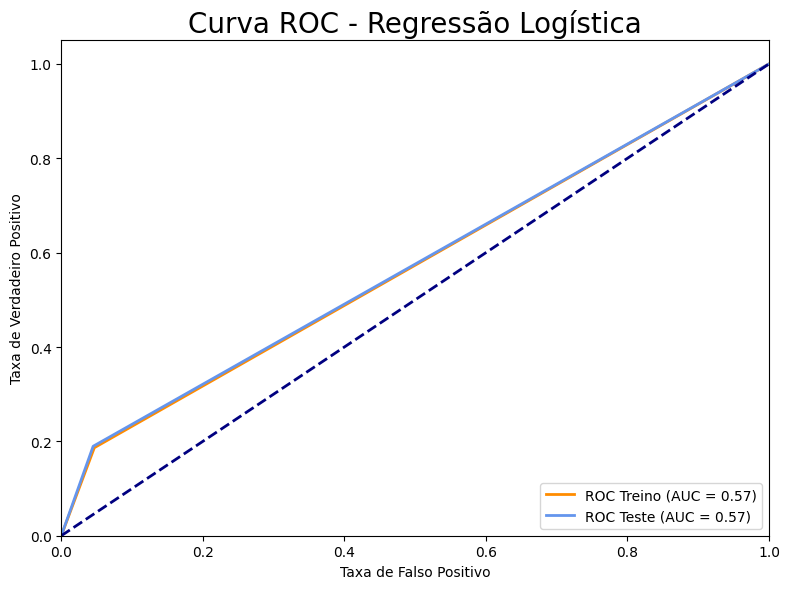

In [220]:
from sklearn.metrics import roc_curve, auc

y_pred2_logreg6 = logistic_regression6.predict(X_train)

# Calcular as curvas ROC para treino e teste
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred2_logreg6)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_logreg6)

# Calcular a área sob a curva (AUC) para treino e teste
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC Treino (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='ROC Teste (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
# Salve a imagem do gráfico em um arquivo
plt.savefig('curva_roc_regressaologistica.png')
plt.show()

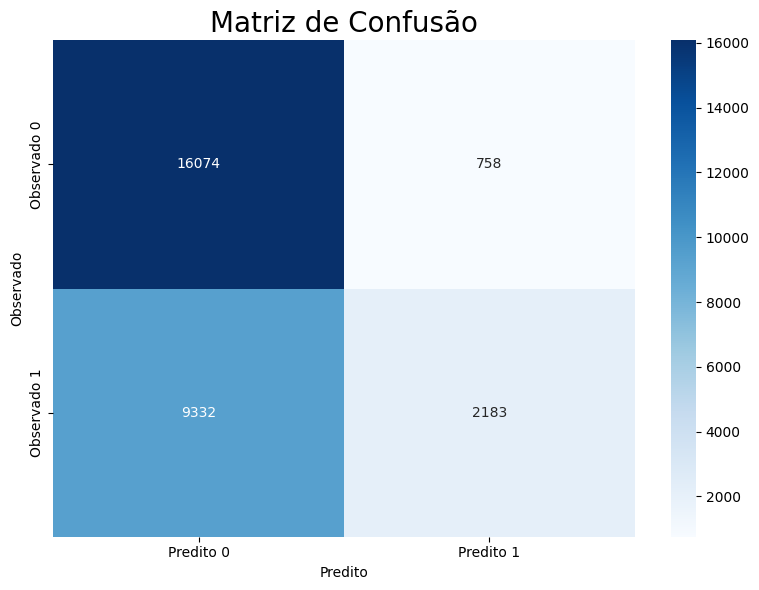

In [221]:
# MATRIZ DE CONFUSÃO
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg6)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predito 0", "Predito 1"],
            yticklabels=["Observado 0", "Observado 1"])
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [222]:
# Calcula os valores da matriz de confusão
TP = conf_matrix_logreg[1, 1]
FP = conf_matrix_logreg[0, 1]
TN = conf_matrix_logreg[0, 0]
FN = conf_matrix_logreg[1, 0]

# Calcula a sensibilidade (recall)
sensibilidade = TP / (TP + FN)

# Calcula a especificidade
especificidade = TN / (TN + FP)

# Acerto Geral
acerto_geral = (TP + TN)/(TP + TN + FP + FN)

print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acerto Geral: {acerto_geral:.2f}")

Sensibilidade (Recall): 0.19
Especificidade: 0.95
Acerto Geral: 0.64


#  Regressão por Categoria de Produto

In [223]:
tb_oficial_pedidos.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1

In [224]:
base_itens_pedido2.head()
base_itens_pedido3 = base_itens_pedido2.loc[: , ['order_id', 'product_category_name']]
base_itens_pedido3.head()

order_id product_category_name
0  00e7ee1b050b8499577073aeb2a297a1     moveis_escritorio
1  c1d2b34febe9cd269e378117d6681172     moveis_escritorio
2  b1a5d5365d330d10485e0203d54ab9e8     moveis_escritorio
3  2e604b3614664aa66867856dba7e61b7     moveis_escritorio
4  574fe1739f65af76badd0999db300b4f     moveis_escritorio

In [225]:
tb_pedidos_segment = tb_oficial_pedidos.merge(right = base_itens_pedido3, on = 'order_id')
tb_pedidos_segment.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  \
0               8.72                 40.0                       268.0   
1              22.76                 29.0                       178.0   
2              19.22                 46.0                       232.0   
3              27.20                 59.0                       468.0   
4               8.72                 38.0                       316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              13.0              0                0                        0   
1              19.0              0                1                        0   
2              21.0              0                0                        0   
3              20.0              0                0                        0   
4              15.0              0                0                        0   

   eletroportateis_decor  product_category_name  
0                      1  utilidades_domesticas  
1                      0             perfumaria  
2                      1             automotivo  
3                      1               pet_shop  
4                      1              papelaria

In [226]:
# Defina a função que aplica a lógica if-else
def agrup_categorias(categoria):
    if categoria in ['alimentos', 'alimentos_bebidas', 'bebidas']:
        return 'alimentos_bebidas'
    elif categoria in ['artes', 'artes_e_artesanato', 'artigos_de_festas','artigos_de_natal','flores'] :
        return 'artes_decoracao'
    elif categoria in ['beleza_saude', 'perfumaria'] :
        return 'beleza_saude'
    elif categoria in ['eletrodomesticos', 'eletrodomesticos_2'] :
        return 'eletrodomesticos'
    elif categoria in ['eletronicos', 'eletroportateis'] :
        return 'eletronicos'
    elif categoria in ['automotivo', 'casa_construcao', 'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca', 'ferramentas_jardim'] :
        return 'ferramentas'
    elif categoria in ['bebes', 'brinquedos', 'fraldas_higiene', 'pet_shop'] :
        return 'infantil_pet'
    elif categoria in ['cine_foto', 'esporte_lazer', 'instrumentos_musicais', 'musica'] :
        return 'lazer'
    elif categoria in ['livros_importados', 'livros_interesse_geral', 'livros_tecnicos', 'papelaria'] :
        return 'livraria_papelaria'
    elif categoria in ['moveis_colchao_e_estofado', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio' , 'moveis_quarto' , 'moveis_sala'] :
        return 'moveis'
    elif categoria in ['agro_industria_e_comercio', 'climatizacao', 'cool_stuff','industria_comercio_e_negocios','market_place', 'seguros_e_servicos', 'sinalizacao_e_seguranca'] :
        return 'servico'
    elif categoria in ['audio', 'cds_dvds_musicais','consoles_games','dvds_blu_ray','informatica_acessorios','pcs','tablets_impressao_imagem','telefonia', 'telefonia_fixa'] :
        return 'tecnologia_games'
    elif categoria in ['cama_mesa_banho','casa_conforto','casa_conforto_2', 'la_cuisine','portateis_casa_forno_e_cafe','utilidades_domesticas'] :
        return 'utilidades_domesticas'
    elif categoria in ['fashion_bolsas_e_acessorios','fashion_calcados','fashion_esporte','fashion_roupa_feminina','fashion_roupa_infanto_juvenil','fashion_roupa_masculina','fashion_underwear_e_moda_praia','malas_acessorios','relogios_presentes'] :
        return 'vestuario_acessorios'
    else:
        return 'outros'

# Aplicar a função usando apply() e criar uma nova coluna
tb_pedidos_segment['agrup_categ'] = tb_pedidos_segment['product_category_name'].apply(lambda x: agrup_categorias(x))
tb_pedidos_segment.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_name_lenght  product_description_lenght  ...  \
0               8.72                 40.0                       268.0  ...   
1              22.76                 29.0                       178.0  ...   
2              19.22                 46.0                       232.0  ...   
3              27.20                 59.0                       468.0  ...   
4               8.72                 38.0                       316.0  ...   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             400.0               19.0               13.0              19.0   
2             420.0               24.0               19.0              21.0   
3             450.0               30.0               10.0              20.0   
4             250.0               51.0               15.0              15.0   

   Flag_Atrasado  alimentos_lazer  moveis_eletrodomesticos  \
0              0                0                        0   
1              0                1                        0   
2              0                0                        0   
3              0                0                        0   
4              0                0                        0   

   eletroportateis_decor  product_category_name            agrup_categ  
0                      1  utilidades_domesticas  utilidades_domesticas  
1                      0             perfumaria           beleza_saude  
2                      1             automotivo            ferramentas  
3                      1               pet_shop           infantil_pet  
4                      1              papelaria     livraria_papelaria  

[5 rows x 21 columns]

In [227]:
tb_pedidos_segment.agrup_categ.value_counts()

utilidades_domesticas    16250
tecnologia_games         12745
beleza_saude             11935
ferramentas               9358
vestuario_acessorios      9133
moveis                    8639
infantil_pet              8465
lazer                     8335
servico                   4630
livraria_papelaria        3144
eletronicos               3119
eletrodomesticos           970
alimentos_bebidas          959
artes_decoracao            408
Name: agrup_categ, dtype: int64

In [228]:
tb_pedidos_segment2 = tb_pedidos_segment.drop(columns=['alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor', 'product_name_lenght', 'product_category_name'])
tb_pedidos_segment2.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7           12.903333           1   
1  53cdb2fc8bc7dce0b6741e2150273451          141.460000           1   
2  47770eb9100c2d0c44946d9cf07ec65d          179.120000           3   
3  949d5b44dbf5de918fe9c16f97b45f8a           72.200000           1   
4  ad21c59c0840e6cb83a9ceb5573f8159           28.620000           1   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0              1       1                    0              1   
1              0       1                    1              1   
2              1       0                    1              1   
3              1       0                    1              1   
4              1       0                    0              1   

   Valor_Total_Frete  product_description_lenght  product_photos_qty  \
0               8.72                       268.0                 4.0   
1              22.76                       178.0                 1.0   
2              19.22                       232.0                 1.0   
3              27.20                       468.0                 3.0   
4               8.72                       316.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             400.0               19.0               13.0              19.0   
2             420.0               24.0               19.0              21.0   
3             450.0               30.0               10.0              20.0   
4             250.0               51.0               15.0              15.0   

   Flag_Atrasado            agrup_categ  
0              0  utilidades_domesticas  
1              0           beleza_saude  
2              0            ferramentas  
3              0           infantil_pet  
4              0     livraria_papelaria

In [229]:
# Separar colunas numéricas e categóricas
numeric_cols = tb_pedidos_segment2.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = tb_pedidos_segment2.select_dtypes(include=['object']).columns

# Normalizar as colunas numéricas
scaler = MinMaxScaler()
tb_pedidos_segment2[numeric_cols] = scaler.fit_transform(tb_pedidos_segment2[numeric_cols])
tb_pedidos_segment2.head()

order_id  valor_total_pedido  qtde_itens  \
0  e481f51cbdc54678b7cc49136f2d6af7            0.000803    0.041667   
1  53cdb2fc8bc7dce0b6741e2150273451            0.010212    0.041667   
2  47770eb9100c2d0c44946d9cf07ec65d            0.012969    0.125000   
3  949d5b44dbf5de918fe9c16f97b45f8a            0.005143    0.041667   
4  ad21c59c0840e6cb83a9ceb5573f8159            0.001953    0.041667   

   Pagto_Credito  Target  vendedor_estado_dif  qtde_produtos  \
0            1.0     1.0                  0.0            0.0   
1            0.0     1.0                  1.0            0.0   
2            1.0     0.0                  1.0            0.0   
3            1.0     0.0                  1.0            0.0   
4            1.0     0.0                  0.0            0.0   

   Valor_Total_Frete  product_description_lenght  product_photos_qty  \
0           0.017530                    0.066199            0.157895   
1           0.045756                    0.043631            0.000000   
2           0.038639                    0.057172            0.000000   
3           0.054682                    0.116349            0.105263   
4           0.017530                    0.078235            0.157895   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0          0.012369           0.122449           0.058252          0.062500   
1          0.009895           0.122449           0.106796          0.116071   
2          0.010390           0.173469           0.165049          0.133929   
3          0.011132           0.234694           0.077670          0.125000   
4          0.006184           0.448980           0.126214          0.080357   

   Flag_Atrasado            agrup_categ  
0            0.0  utilidades_domesticas  
1            0.0           beleza_saude  
2            0.0            ferramentas  
3            0.0           infantil_pet  
4            0.0     livraria_papelaria

In [230]:
tb_pedidos_segment3 = tb_pedidos_segment2.drop(columns=['order_id'])
tb_pedidos_segment3.head()

valor_total_pedido  qtde_itens  Pagto_Credito  Target  vendedor_estado_dif  \
0            0.000803    0.041667            1.0     1.0                  0.0   
1            0.010212    0.041667            0.0     1.0                  1.0   
2            0.012969    0.125000            1.0     0.0                  1.0   
3            0.005143    0.041667            1.0     0.0                  1.0   
4            0.001953    0.041667            1.0     0.0                  0.0   

   qtde_produtos  Valor_Total_Frete  product_description_lenght  \
0            0.0           0.017530                    0.066199   
1            0.0           0.045756                    0.043631   
2            0.0           0.038639                    0.057172   
3            0.0           0.054682                    0.116349   
4            0.0           0.017530                    0.078235   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0            0.157895          0.012369           0.122449           0.058252   
1            0.000000          0.009895           0.122449           0.106796   
2            0.000000          0.010390           0.173469           0.165049   
3            0.105263          0.011132           0.234694           0.077670   
4            0.157895          0.006184           0.448980           0.126214   

   product_width_cm  Flag_Atrasado            agrup_categ  
0          0.062500            0.0  utilidades_domesticas  
1          0.116071            0.0           beleza_saude  
2          0.133929            0.0            ferramentas  
3          0.125000            0.0           infantil_pet  
4          0.080357            0.0     livraria_papelaria

In [231]:
# Lista de valores únicos na coluna 'agrup_categ'
segment_values = tb_pedidos_segment3['agrup_categ'].unique()
segment_values

array(['utilidades_domesticas', 'beleza_saude', 'ferramentas',
       'infantil_pet', 'livraria_papelaria', 'moveis', 'tecnologia_games',
       'eletronicos', 'servico', 'vestuario_acessorios', 'lazer',
       'alimentos_bebidas', 'eletrodomesticos', 'artes_decoracao'],
      dtype=object)

## Regressão Logística

In [232]:
# Loop para treinar modelos segmentados - REGRESSÃO LOGÍSTICA
segmented_models_logist = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']
    X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treina um modelo de regressão logística para o segmento atual
    model_seg_logist = LogisticRegression()
    model_seg_logist.fit(X_trains, y_trains)

    # Faz previsões no conjunto de teste
    y_preds = model_seg_logist.predict(X_tests)

    # Avalia o modelo
    accuracy_seg_logist = accuracy_score(y_tests, y_preds)

    segmented_models_logist[segment] = {'model': model_seg_logist, 'accuracy': accuracy_seg_logist}

In [233]:
# Mostra os modelos treinados e suas acurácias
for segment, model_info in segmented_models_logist.items():
    print(f"Categoria: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia: {model_info['accuracy']}")
    print()


Categoria: utilidades_domesticas
Modelo: LogisticRegression()
Acurácia: 0.6313846153846154

Categoria: beleza_saude
Modelo: LogisticRegression()
Acurácia: 0.6723921240050272

Categoria: ferramentas
Modelo: LogisticRegression()
Acurácia: 0.6431623931623932

Categoria: infantil_pet
Modelo: LogisticRegression()
Acurácia: 0.6609568812758417

Categoria: livraria_papelaria
Modelo: LogisticRegression()
Acurácia: 0.7233704292527822

Categoria: moveis
Modelo: LogisticRegression()
Acurácia: 0.6041666666666666

Categoria: tecnologia_games
Modelo: LogisticRegression()
Acurácia: 0.6092585327579443

Categoria: eletronicos
Modelo: LogisticRegression()
Acurácia: 0.6073717948717948

Categoria: servico
Modelo: LogisticRegression()
Acurácia: 0.6706263498920086

Categoria: vestuario_acessorios
Modelo: LogisticRegression()
Acurácia: 0.6513409961685823

Categoria: lazer
Modelo: LogisticRegression()
Acurácia: 0.6844631073785243

Categoria: alimentos_bebidas
Modelo: LogisticRegression()
Acurácia: 0.6666666666

## Decision Tree

In [234]:
# Loop para treinar modelos segmentados - DECISION TREE
segmented_models_decistree = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treina um modelo de regressão logística para o segmento atual
    model = DecisionTreeClassifier(max_depth = 5, random_state=415)
    model.fit(X_train, y_train)

    # Faz previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avalia o modelo
    accuracy = accuracy_score(y_test, y_pred)
    segmented_models_decistree[segment] = {'model': model, 'accuracy': accuracy}

In [235]:
# Mostra os modelos treinados e suas acurácias
for segment, model_info in segmented_models_decistree.items():
    print(f"Categoria: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia: {model_info['accuracy']}")
    print()

Categoria: utilidades_domesticas
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6356923076923077

Categoria: beleza_saude
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6790950984499372

Categoria: ferramentas
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6415598290598291

Categoria: infantil_pet
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6709982279976373

Categoria: livraria_papelaria
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.7201907790143084

Categoria: moveis
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6151620370370371

Categoria: tecnologia_games
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6108277755982738

Categoria: eletronicos
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia: 0.6266025641025641

Categoria: servico
Modelo: DecisionTreeClassifier(max_depth=5

## Random Forest

In [236]:
# Loop para treinar modelos segmentados - RANDOM FOREST
segmented_models_ranforest = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treina um modelo de regressão logística para o segmento atual
    model = RandomForestClassifier(n_estimators=100, random_state=430)
    model.fit(X_train, y_train)

    # Faz previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avalia o modelo
    accuracy = accuracy_score(y_test, y_pred)
    segmented_models_ranforest[segment] = {'model': model, 'accuracy': accuracy}

In [237]:
# Mostra os modelos treinados e suas acurácias
for segment, model_info in segmented_models_ranforest.items():
    print(f"Categoria: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia: {model_info['accuracy']}")
    print()

Categoria: utilidades_domesticas
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.6273846153846154

Categoria: beleza_saude
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.6455802262253875

Categoria: ferramentas
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.6068376068376068

Categoria: infantil_pet
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.6627288836385116

Categoria: livraria_papelaria
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.699523052464229

Categoria: moveis
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.6255787037037037

Categoria: tecnologia_games
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.5841506473126716

Categoria: eletronicos
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.5817307692307693

Categoria: servico
Modelo: RandomForestClassifier(random_state=430)
Acurácia: 0.603671706263499

Categoria: vestuario_acessorios
Modelo: RandomForestClassifier(random

In [238]:
segmented_models_ranforest

{'utilidades_domesticas': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.6273846153846154},
 'beleza_saude': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.6455802262253875},
 'ferramentas': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.6068376068376068},
 'infantil_pet': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.6627288836385116},
 'livraria_papelaria': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.699523052464229},
 'moveis': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.6255787037037037},
 'tecnologia_games': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.5841506473126716},
 'eletronicos': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.5817307692307693},
 'servico': {'model': RandomForestClassifier(random_state=430),
  'accuracy': 0.603671706263499},
 'vestuario_acessorios': {'model': RandomForestClassifier(ra

In [239]:
tb_segmented_models_ranforest = pd.DataFrame(segmented_models_ranforest)
tb_segmented_models_ranforest.to_excel('tb_segmented_models_ranforest.xlsx')

# Regressão por Categoria + Cross Validation


In [240]:
tb_pedidos_segment3.describe()

valor_total_pedido    qtde_itens  Pagto_Credito        Target  \
count        98090.000000  98090.000000   98090.000000  98090.000000   
mean             0.011640      0.123922       0.771098      0.414436   
std              0.015939      0.114713       0.420128      0.492627   
min              0.000000      0.000000       0.000000      0.000000   
25%              0.004366      0.041667       1.000000      0.000000   
50%              0.007582      0.083333       1.000000      0.000000   
75%              0.012995      0.166667       1.000000      1.000000   
max              1.000000      1.000000       1.000000      1.000000   

       vendedor_estado_dif  qtde_produtos  Valor_Total_Frete  \
count         98090.000000   98090.000000       98090.000000   
mean              0.642043       0.012516           0.042837   
std               0.479402       0.053500           0.035054   
min               0.000000       0.000000           0.000000   
25%               0.000000       0.000000           0.027220   
50%               1.000000       0.000000           0.033754   
75%               1.000000       0.000000           0.045937   
max               1.000000       1.000000           1.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                98090.000000        98090.000000      98090.000000   
mean                     0.196249            0.065319          0.051663   
std                      0.162113            0.091128          0.091924   
min                      0.000000            0.000000          0.000000   
25%                      0.086510            0.000000          0.007421   
50%                      0.150201            0.052632          0.017316   
75%                      0.245988            0.105263          0.044527   
max                      1.000000            1.000000          1.000000   

       product_length_cm  product_height_cm  product_width_cm  Flag_Atrasado  
count       98090.000000       98090.000000      98090.000000   98090.000000  
mean            0.235883           0.139707          0.152361       0.078418  
std             0.163154           0.128182          0.104095       0.268829  
min             0.000000           0.000000          0.000000       0.000000  
25%             0.112245           0.058252          0.080357       0.000000  
50%             0.183673           0.106796          0.125000       0.000000  
75%             0.316327           0.174757          0.214286       0.000000  
max             1.000000           1.000000          1.000000       1.000000

## Regressão Logística

In [241]:
# Loop para treinar modelos segmentados - REGRESSÃO LOGÍSTICA
segmented_models_logist2 = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']
    model_seg_logist = LogisticRegression()

    # Aplica cross_val_score para calcular as acurácias da validação cruzada
    accuracies = cross_val_score(model_seg_logist, X, y, cv=5, scoring='accuracy')

    # Calcula a média das acurácias de validação cruzada
    avg_accuracy = accuracies.mean()

    # Armazena o modelo e a média das acurácias no dicionário de modelos segmentados
    segmented_models_logist2[segment] = {'model': model_seg_logist, 'avg_accuracy': avg_accuracy}

In [242]:
# Mostra os modelos treinados e suas médias de acurácia
for segment, model_info in segmented_models_logist2.items():
    print(f"Segmento: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia Média: {model_info['avg_accuracy']}")
    print()

Segmento: utilidades_domesticas
Modelo: LogisticRegression()
Acurácia Média: 0.6190769230769231

Segmento: beleza_saude
Modelo: LogisticRegression()
Acurácia Média: 0.6725596983661499

Segmento: ferramentas
Modelo: LogisticRegression()
Acurácia Média: 0.6334673514323435

Segmento: infantil_pet
Modelo: LogisticRegression()
Acurácia Média: 0.6572947430596574

Segmento: livraria_papelaria
Modelo: LogisticRegression()
Acurácia Média: 0.6968861705467175

Segmento: moveis
Modelo: LogisticRegression()
Acurácia Média: 0.6081722881683073

Segmento: tecnologia_games
Modelo: LogisticRegression()
Acurácia Média: 0.6124754805806198

Segmento: eletronicos
Modelo: LogisticRegression()
Acurácia Média: 0.6232775651314978

Segmento: servico
Modelo: LogisticRegression()
Acurácia Média: 0.6375809935205183

Segmento: vestuario_acessorios
Modelo: LogisticRegression()
Acurácia Média: 0.6411907669489721

Segmento: lazer
Modelo: LogisticRegression()
Acurácia Média: 0.6623875224955008

Segmento: alimentos_bebid

## Decision Tree


In [243]:
# Loop para treinar modelos segmentados - DECISION TREE
segmented_models_decistree2 = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']

    # Treina um modelo de regressão logística para o segmento atual
    model = DecisionTreeClassifier(max_depth = 5, random_state=415)

    # Aplica cross_val_score para calcular as acurácias da validação cruzada
    accuracies = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calcula a média das acurácias de validação cruzada
    avg_accuracy = accuracies.mean()

    # Armazena o modelo e a média das acurácias no dicionário de modelos segmentados
    segmented_models_decistree2[segment] = {'model': model, 'avg_accuracy': avg_accuracy}

In [244]:
# Mostra os modelos treinados e suas médias de acurácia
for segment, model_info in segmented_models_decistree2.items():
    print(f"Segmento: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia Média: {model_info['avg_accuracy']}")
    print()

Segmento: utilidades_domesticas
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6183384615384615

Segmento: beleza_saude
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6677000418935902

Segmento: ferramentas
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6295140173681061

Segmento: infantil_pet
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6593030124040166

Segmento: livraria_papelaria
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6723881806122345

Segmento: moveis
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.611412492762015

Segmento: tecnologia_games
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6096508434680267

Segmento: eletronicos
Modelo: DecisionTreeClassifier(max_depth=5, random_state=415)
Acurácia Média: 0.6248832160349014

Segmento: servico
Mode

## Random Forest

In [245]:
# Loop para treinar modelos segmentados - RANDOM FOREST
segmented_models_ranforest2 = {}
for segment in segment_values:
    # Filtra os dados para o segmento atual
    segment_data = tb_pedidos_segment3[tb_pedidos_segment3['agrup_categ'] == segment]

    # Divide os dados em conjunto de treinamento e teste
    X = segment_data.drop(columns=['Target', 'agrup_categ'])
    y = segment_data['Target']

    # Treina um modelo de regressão logística para o segmento atual
    model = RandomForestClassifier(n_estimators=100, random_state=430)

   # Aplica cross_val_score para calcular as acurácias da validação cruzada
    accuracies = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calcula a média das acurácias de validação cruzada
    avg_accuracy = accuracies.mean()

    # Armazena o modelo e a média das acurácias no dicionário de modelos segmentados
    segmented_models_ranforest2[segment] = {'model': model, 'avg_accuracy': avg_accuracy}

In [246]:
# Mostra os modelos treinados e suas médias de acurácia
for segment, model_info in segmented_models_ranforest2.items():
    print(f"Segmento: {segment}")
    print(f"Modelo: {model_info['model']}")
    print(f"Acurácia Média: {model_info['avg_accuracy']}")
    print()

Segmento: utilidades_domesticas
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.5820923076923077

Segmento: beleza_saude
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.624214495182237

Segmento: ferramentas
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.5849547410544205

Segmento: infantil_pet
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.6313053750738334

Segmento: livraria_papelaria
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.642805788178587

Segmento: moveis
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.582009921400845

Segmento: tecnologia_games
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.5824244801883092

Segmento: eletronicos
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.5838339095361567

Segmento: servico
Modelo: RandomForestClassifier(random_state=430)
Acurácia Média: 0.5868250539956803

Segmento: vestuario_acess

In [247]:
tb_segmented_models_ranforest2 = pd.DataFrame(segmented_models_ranforest2)
tb_segmented_models_ranforest2.to_excel('tb_segmented_models_ranforest2.xlsx')